# Churn Prediction

### **Background**


Di industri telekomunikasi, retensi pelanggan adalah salah satu faktor kunci kesuksesan. Churn, atau pergantian pelanggan, merujuk pada kehilangan pelanggan yang beralih ke layanan dari penyedia lain. Fenomena ini memiliki dampak finansial yang signifikan bagi perusahaan, karena biaya memperoleh pelanggan baru seringkali lebih tinggi daripada mempertahankan pelanggan yang sudah ada.

Tujuan dari proyek ini adalah untuk membangun model klasifikasi yang dapat memprediksi pelanggan mana yang memiliki kemungkinan besar untuk churn. Dengan memanfaatkan data historis yang mencakup berbagai variabel seperti durasi layanan, tingkat kepuasan, pola penggunaan, dan lain-lain, model ini dapat mengidentifikasi pola-pola yang mengarah pada perilaku churn.


**Datasource** : https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset

# Import Library

In [1]:
!pip install lazypredict

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyClassifier
import warnings
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
data.describe()

account length  area code  number vmail messages  total day minutes  \
count         3333.00    3333.00                3333.00            3333.00   
mean           101.06     437.18                   8.10             179.78   
std             39.82      42.37                  13.69              54.47   
min              1.00     408.00                   0.00               0.00   
25%             74.00     408.00                   0.00             143.70   
50%            101.00     415.00                   0.00             179.40   
75%            127.00     510.00                  20.00             216.40   
max            243.00     510.00                  51.00             350.80   

       total day calls  total day charge  total eve minutes  total eve calls  \
count          3333.00           3333.00            3333.00          3333.00   
mean            100.44             30.56             200.98           100.11   
std              20.07              9.26              50.71            19.92   
min               0.00              0.00               0.00             0.00   
25%              87.00             24.43             166.60            87.00   
50%             101.00             30.50             201.40           100.00   
75%             114.00             36.79             235.30           114.00   
max             165.00             59.64             363.70           170.00   

       total eve charge  total night minutes  total night calls  \
count           3333.00              3333.00            3333.00   
mean              17.08               200.87             100.11   
std                4.31                50.57              19.57   
min                0.00                23.20              33.00   
25%               14.16               167.00              87.00   
50%               17.12               201.20             100.00   
75%               20.00               235.30             113.00   
max               30.91               395.00             175.00   

       total night charge  total intl minutes  total intl calls  \
count             3333.00             3333.00           3333.00   
mean                 9.04               10.24              4.48   
std                  2.28                2.79              2.46   
min                  1.04                0.00              0.00   
25%                  7.52                8.50              3.00   
50%                  9.05               10.30              4.00   
75%                 10.59               12.10              6.00   
max                 17.77               20.00             20.00   

       total intl charge  customer service calls  
count            3333.00                 3333.00  
mean                2.76                    1.56  
std                 0.75                    1.32  
min                 0.00                    0.00  
25%                 2.30                    1.00  
50%                 2.78                    1.00  
75%                 3.27                    2.00  
max                 5.40                    9.00

In [ ]:
data["churn"] = data['churn'].astype(int)

In [ ]:
data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25             265.10              110   
1             yes                     26             161.60              123   
2              no                      0             243.40              114   
3              no                      0             299.40               71   
4              no                      0             166.70              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0               244.70                 91               11.01   
1               254.40                103               11.45   
2               162.60                104                7.32   
3               196.90                 89                8.86   
4               186.90                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0               10.00                 3               2.70   
1               13.70                 3               3.70   
2               12.20                 5               3.29   
3                6.60                 7               1.78   
4               10.10                 3               2.73   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0  

[5 rows x 21 columns]

In [ ]:
data.drop(['account length' , 'phone number' , 'state'] , axis='columns' , inplace=True)

In [ ]:
num = data.select_dtypes([int,float])
cat = data.select_dtypes(object)

In [ ]:
num.head()

area code  number vmail messages  total day minutes  total day calls  \
0        415                     25             265.10              110   
1        415                     26             161.60              123   
2        415                      0             243.40              114   
3        408                      0             299.40               71   
4        415                      0             166.70              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07             197.40               99             16.78   
1             27.47             195.50              103             16.62   
2             41.38             121.20              110             10.30   
3             50.90              61.90               88              5.26   
4             28.34             148.30              122             12.61   

   total night minutes  total night calls  total night charge  \
0               244.70                 91               11.01   
1               254.40                103               11.45   
2               162.60                104                7.32   
3               196.90                 89                8.86   
4               186.90                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0               10.00                 3               2.70   
1               13.70                 3               3.70   
2               12.20                 5               3.29   
3                6.60                 7               1.78   
4               10.10                 3               2.73   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [ ]:
cat.head()

international plan voice mail plan
0                 no             yes
1                 no             yes
2                 no              no
3                yes              no
4                yes              no


# EDA


### Analysis Data Univariate

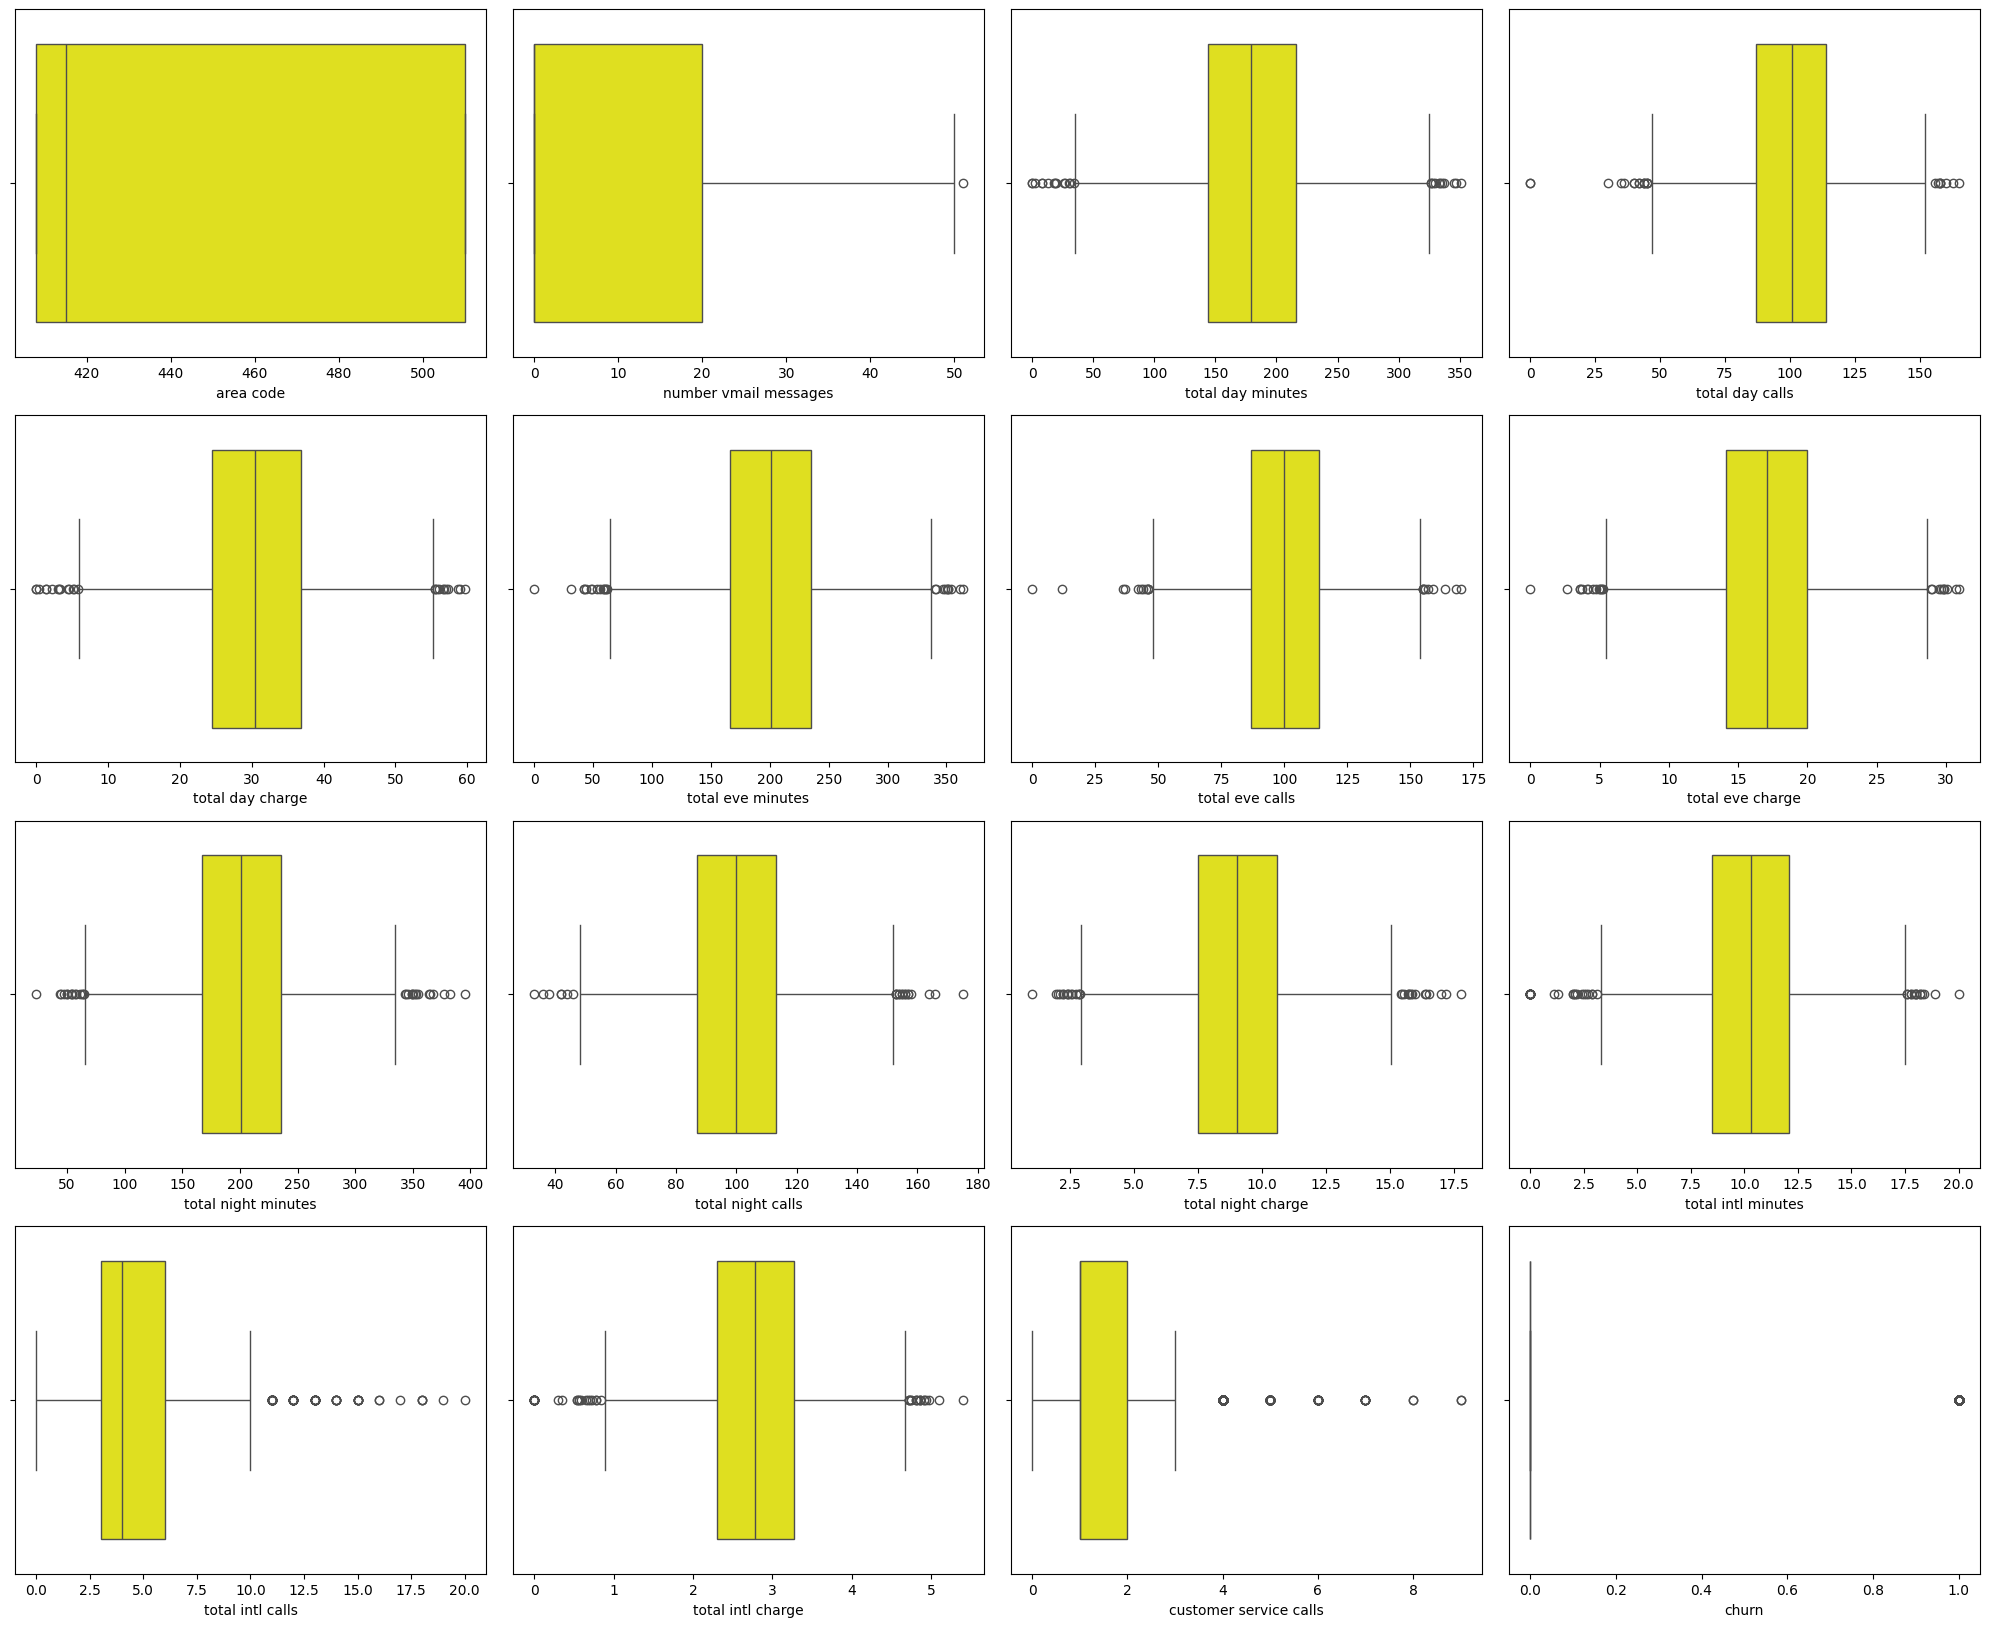

In [ ]:
plt.figure(figsize=(20,20))
feature = num.columns

for i in range(0 , len(feature)):

    plt.subplot(5,4 , i + 1)
    sns.boxplot(data=num , x=feature[i] , color="yellow" , orient='red')
    plt.tight_layout()

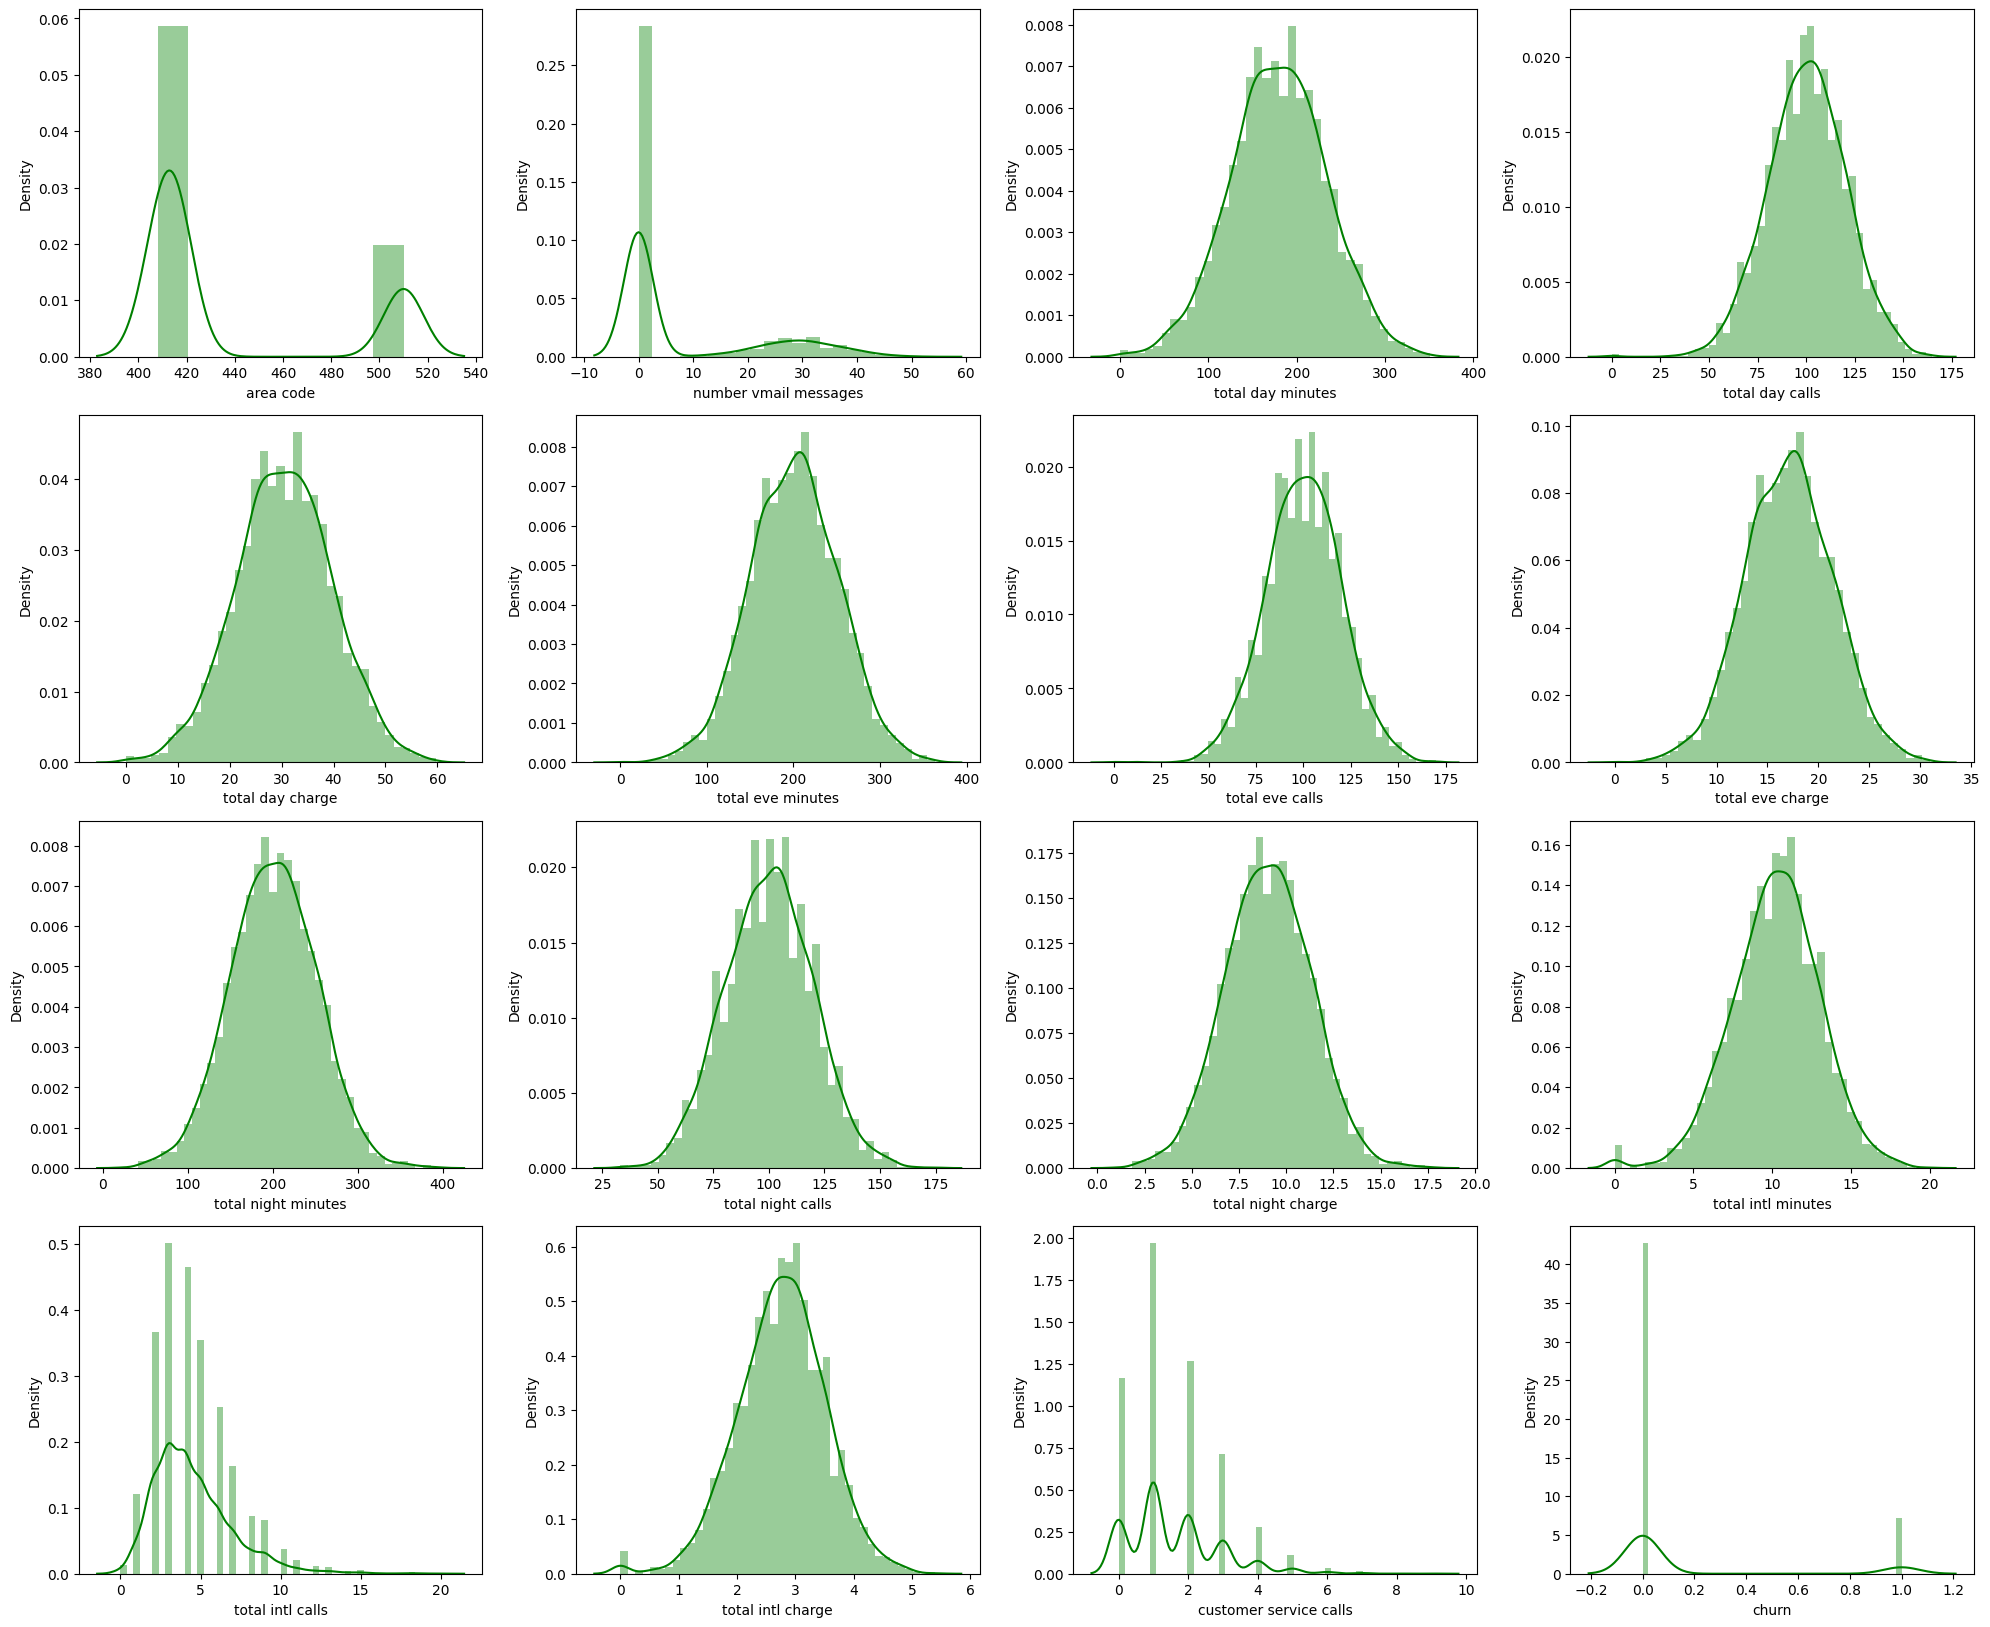

In [ ]:
plt.figure(figsize=(20,20))
feature = num.columns

for i in range(0 , len(feature)):

    plt.subplot(5,4 , i + 1)
    sns.distplot(num[feature[i]] , color="green")
    plt.tight_layout()

dari distribusi setiap variable dapat dilihat kalau mayoritas berdistribusi normal , dan ada beberapa yang skew positif


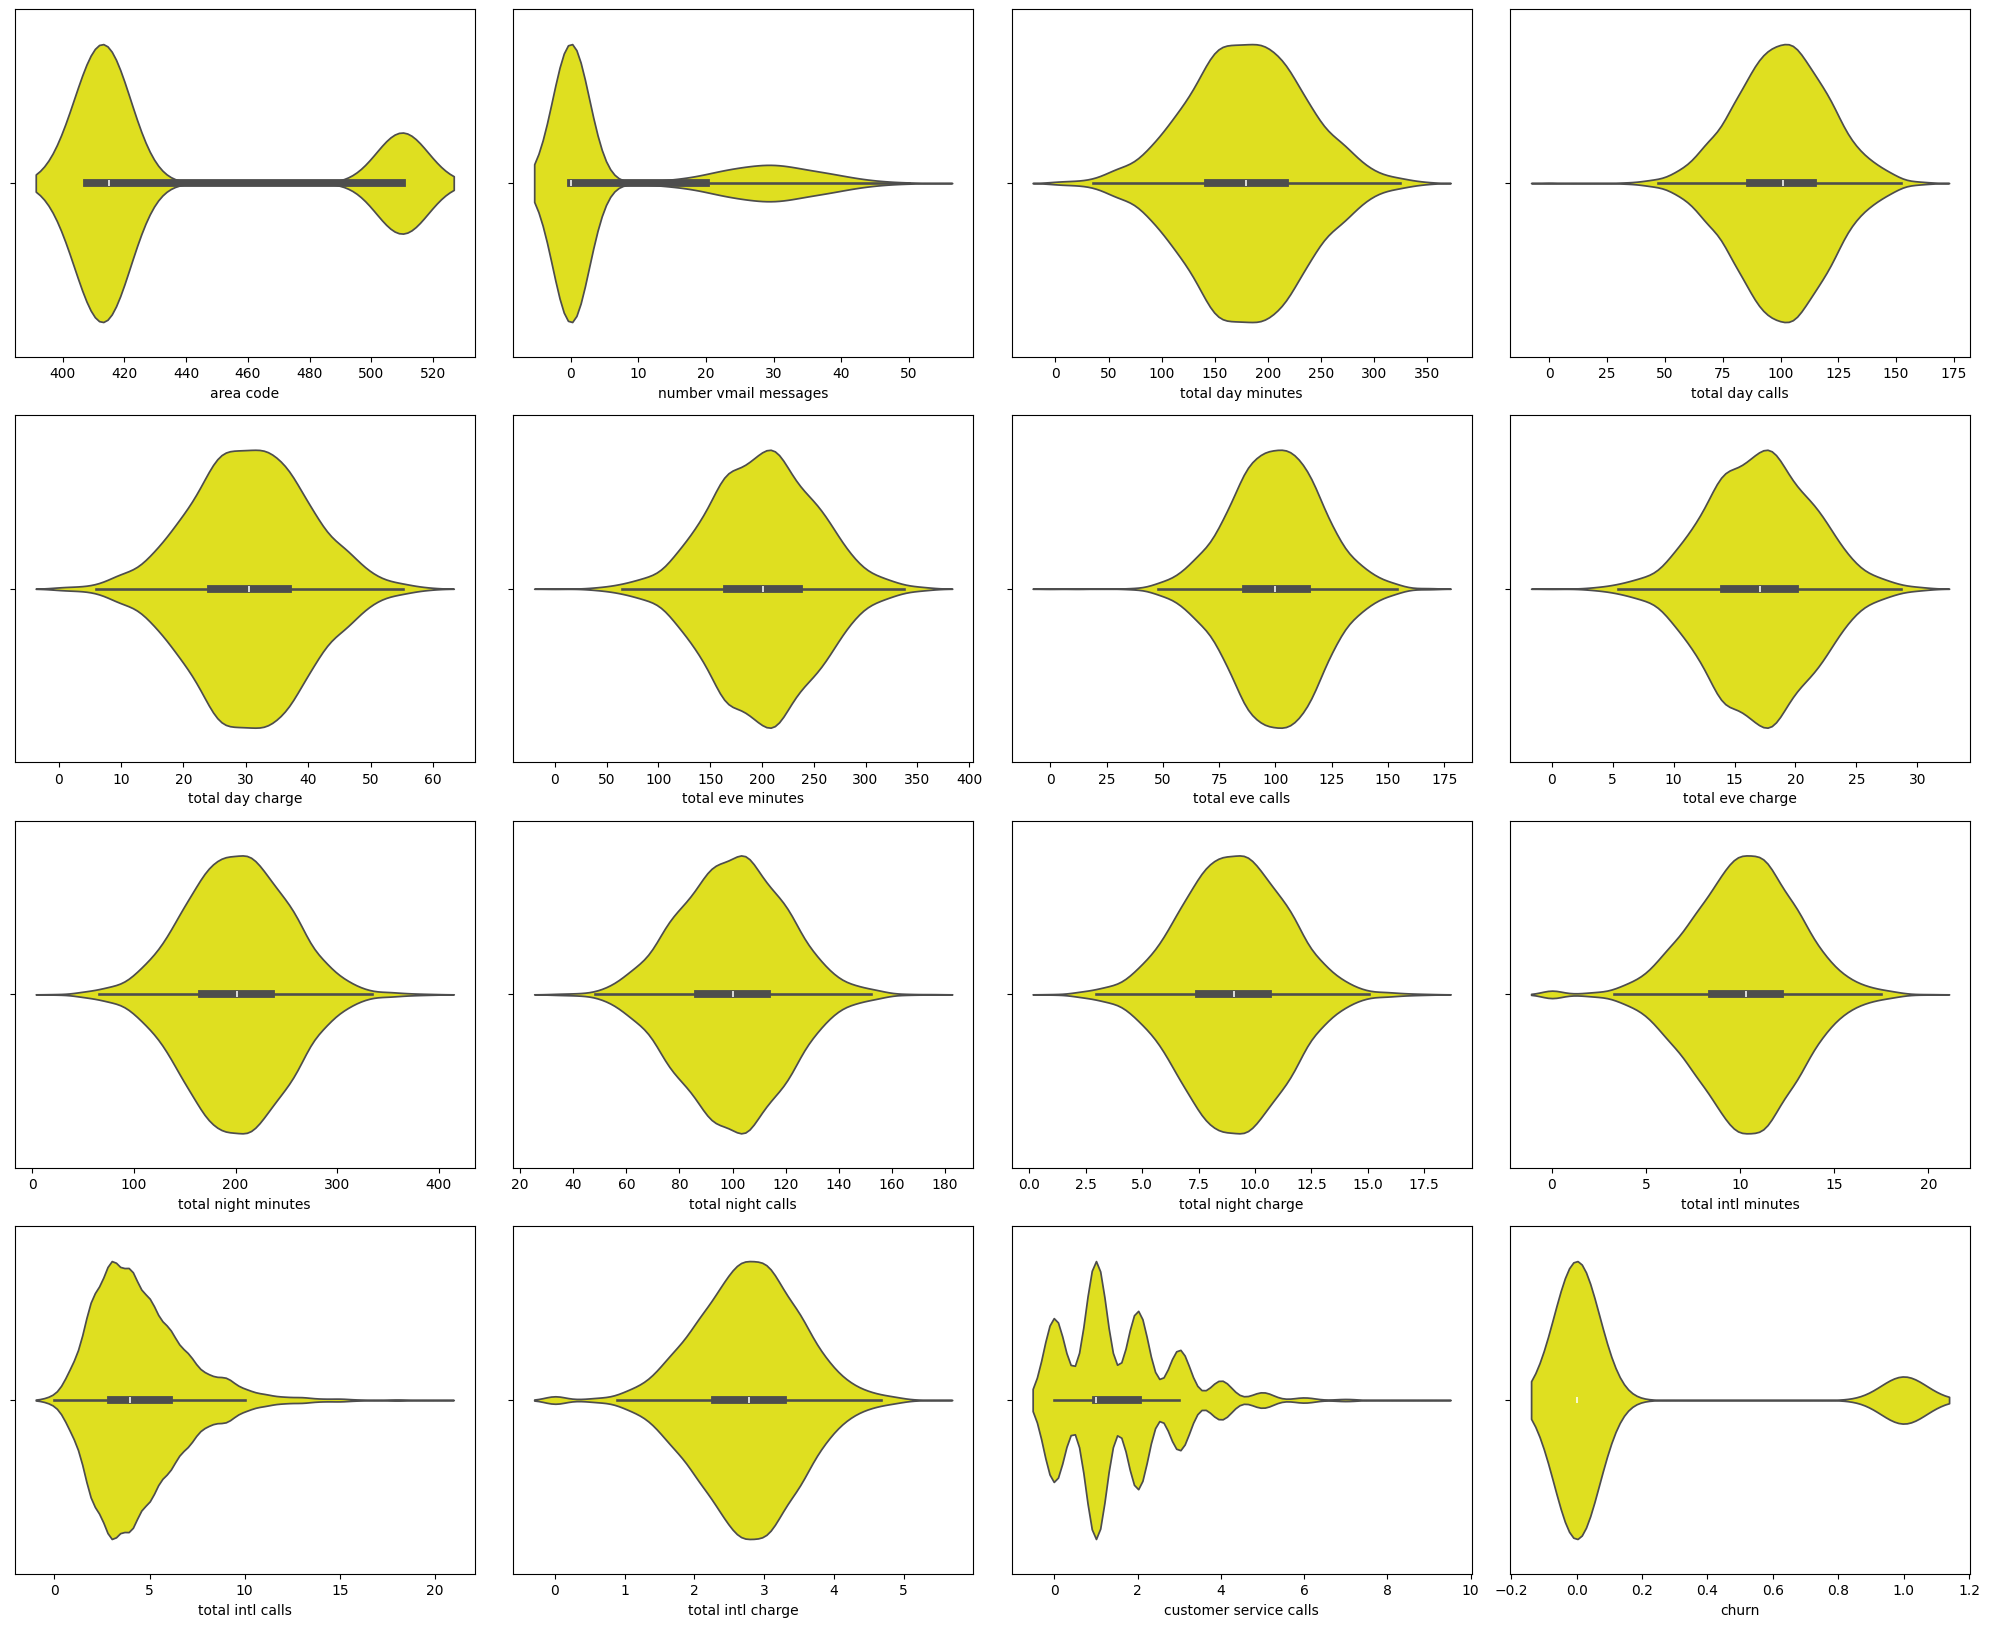

In [ ]:
plt.figure(figsize=(20,20))
feature = num.columns

for i in range(0 , len(feature)):

    plt.subplot(5,4 , i + 1)
    sns.violinplot(data=num , x=feature[i] , color="yellow")
    plt.tight_layout()

In [ ]:
cat["churn"] = data["churn"]
cat["area code"] = data["area code"]

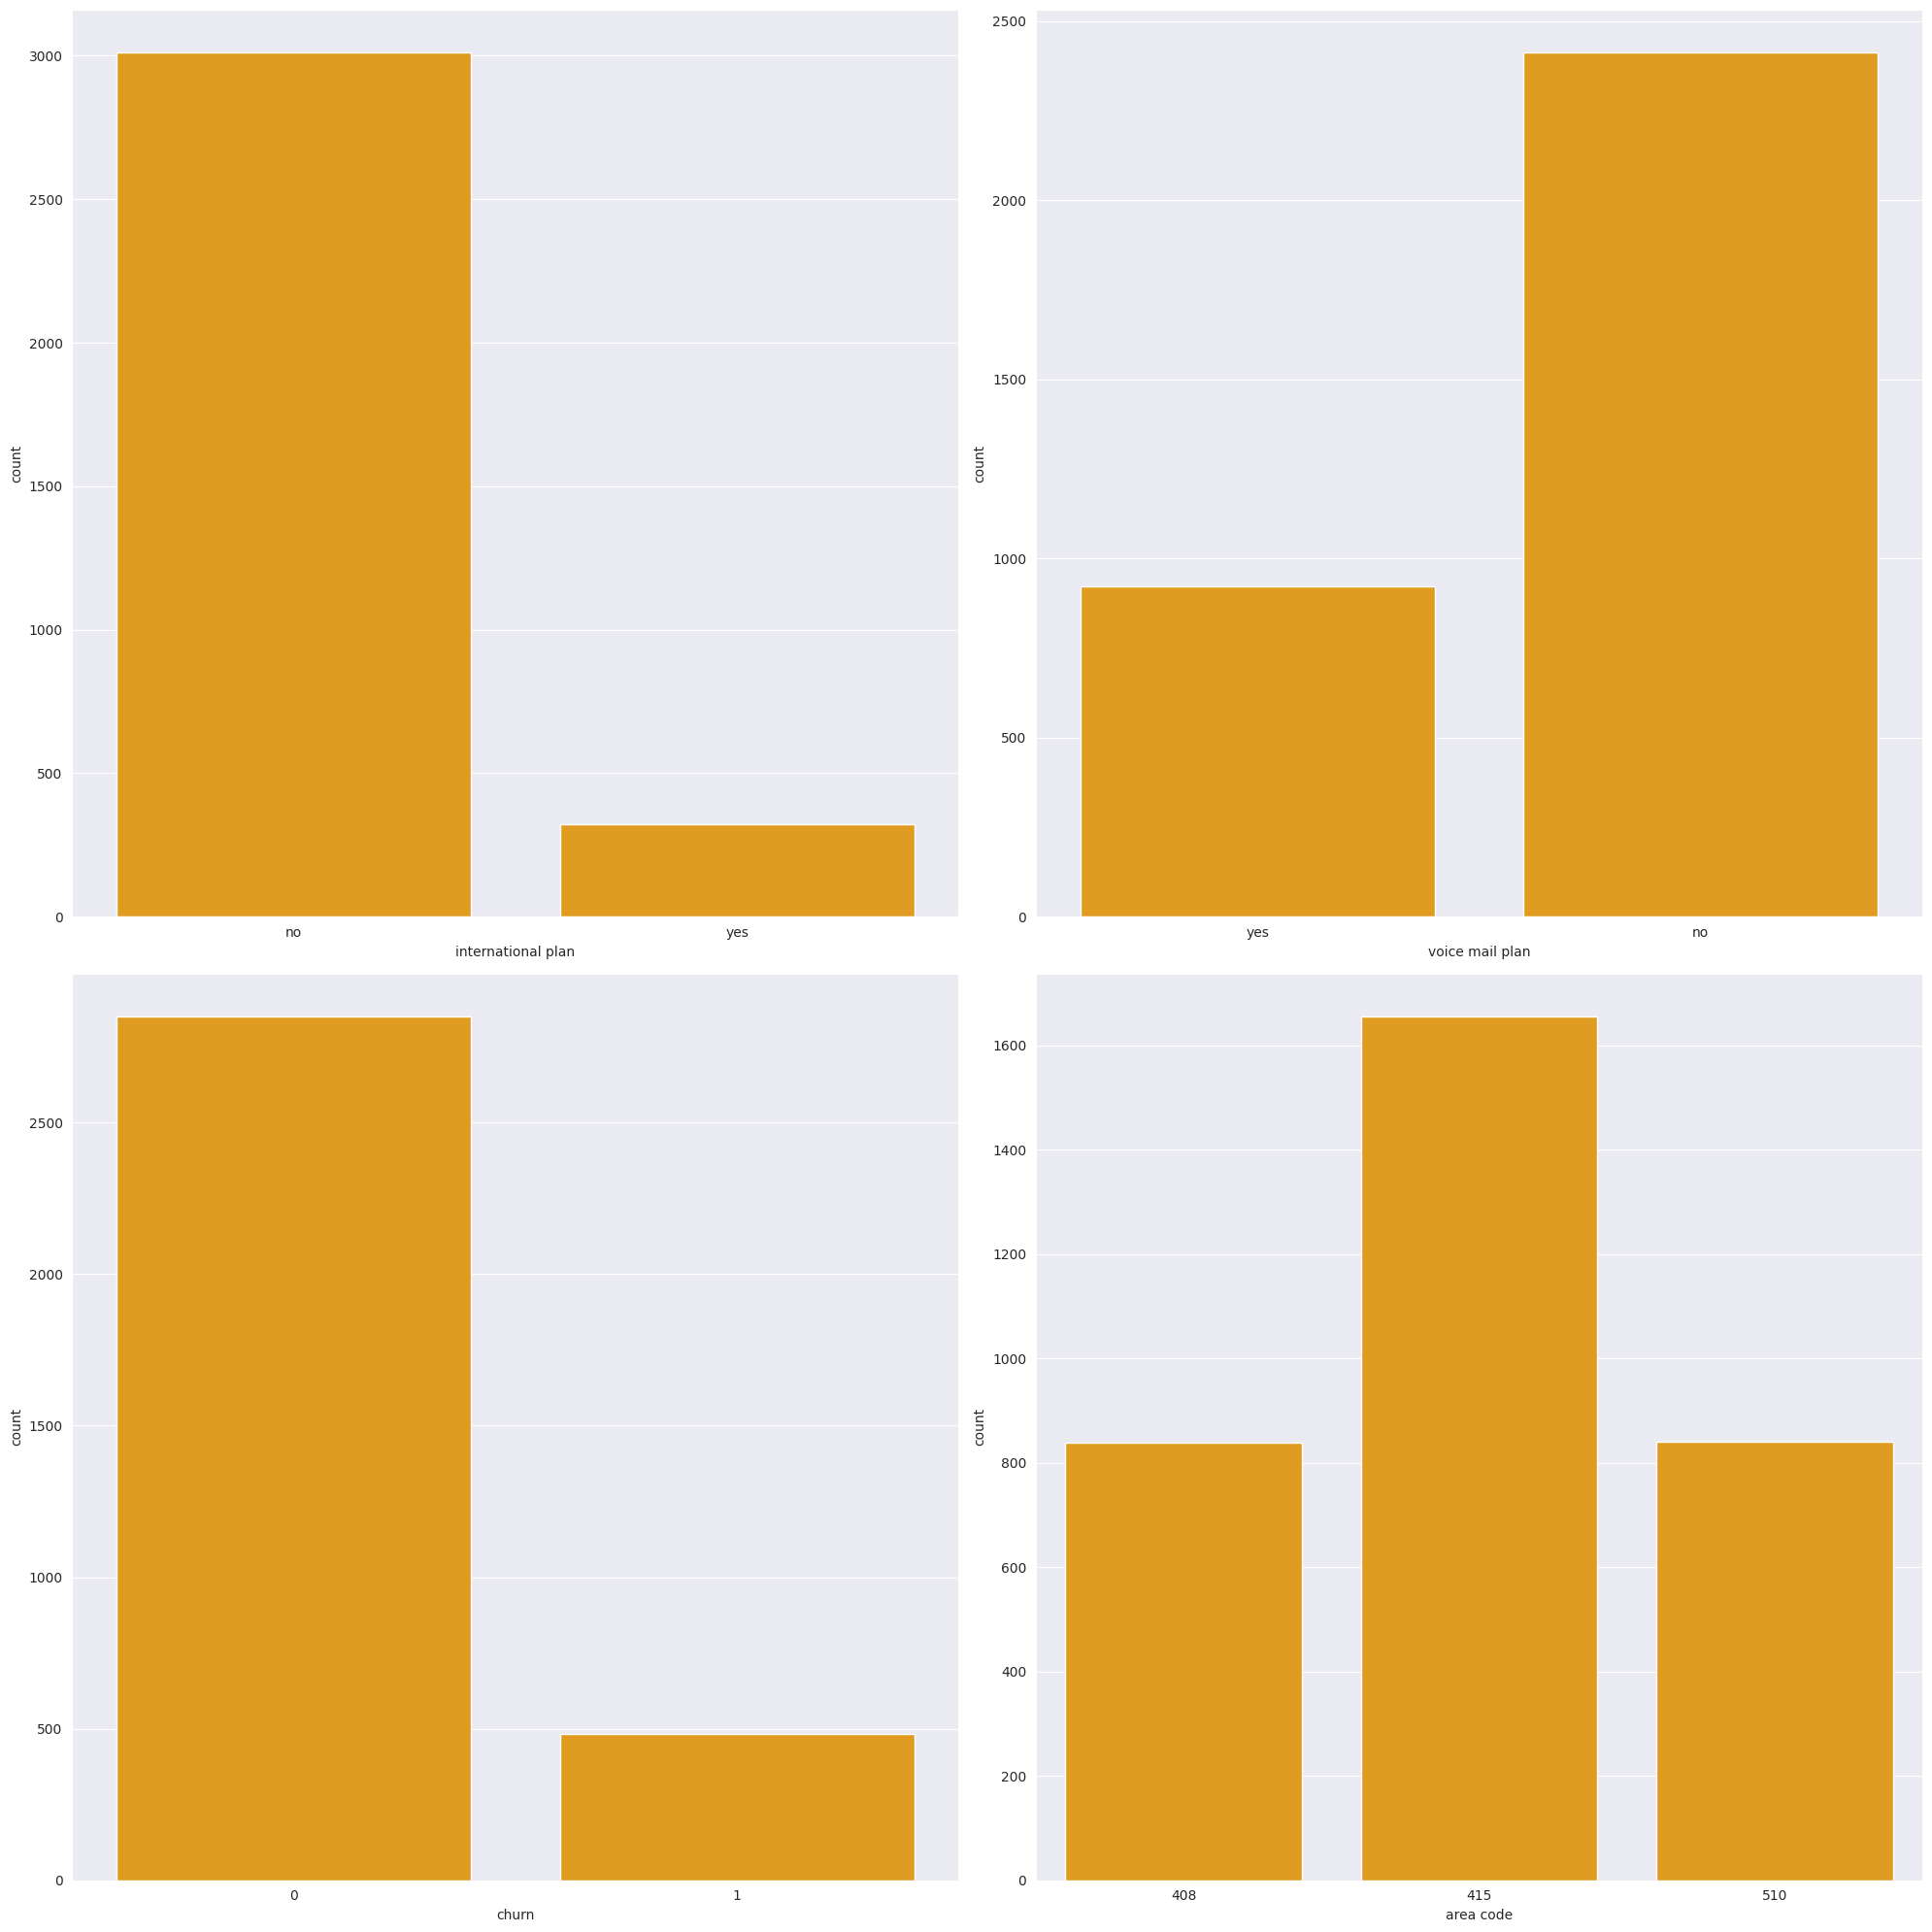

In [ ]:
plt.figure(figsize=(20,20))
feature = cat.columns
sns.set_style("darkgrid")


for i in range(0 , len(feature)):
    plt.subplot(2,2,i+1)
    sns.countplot(data =cat , x=feature[i]  , color='orange')
    plt.tight_layout()

kesimpulan :

  1. lebih banyak pengguna yang tetap berlangganan dengan nilai 2850 pengguana daripada yang memilih berhenti berlangganan dengan 483 user
  2. lebih banyak yang tidak menggunakan layanan international plan
  3. lebih banyak yang tidak menggunakan layanan voice mail plan
  4. paling banyak pengguna berasal dari area code 415


### Analisis multivariate

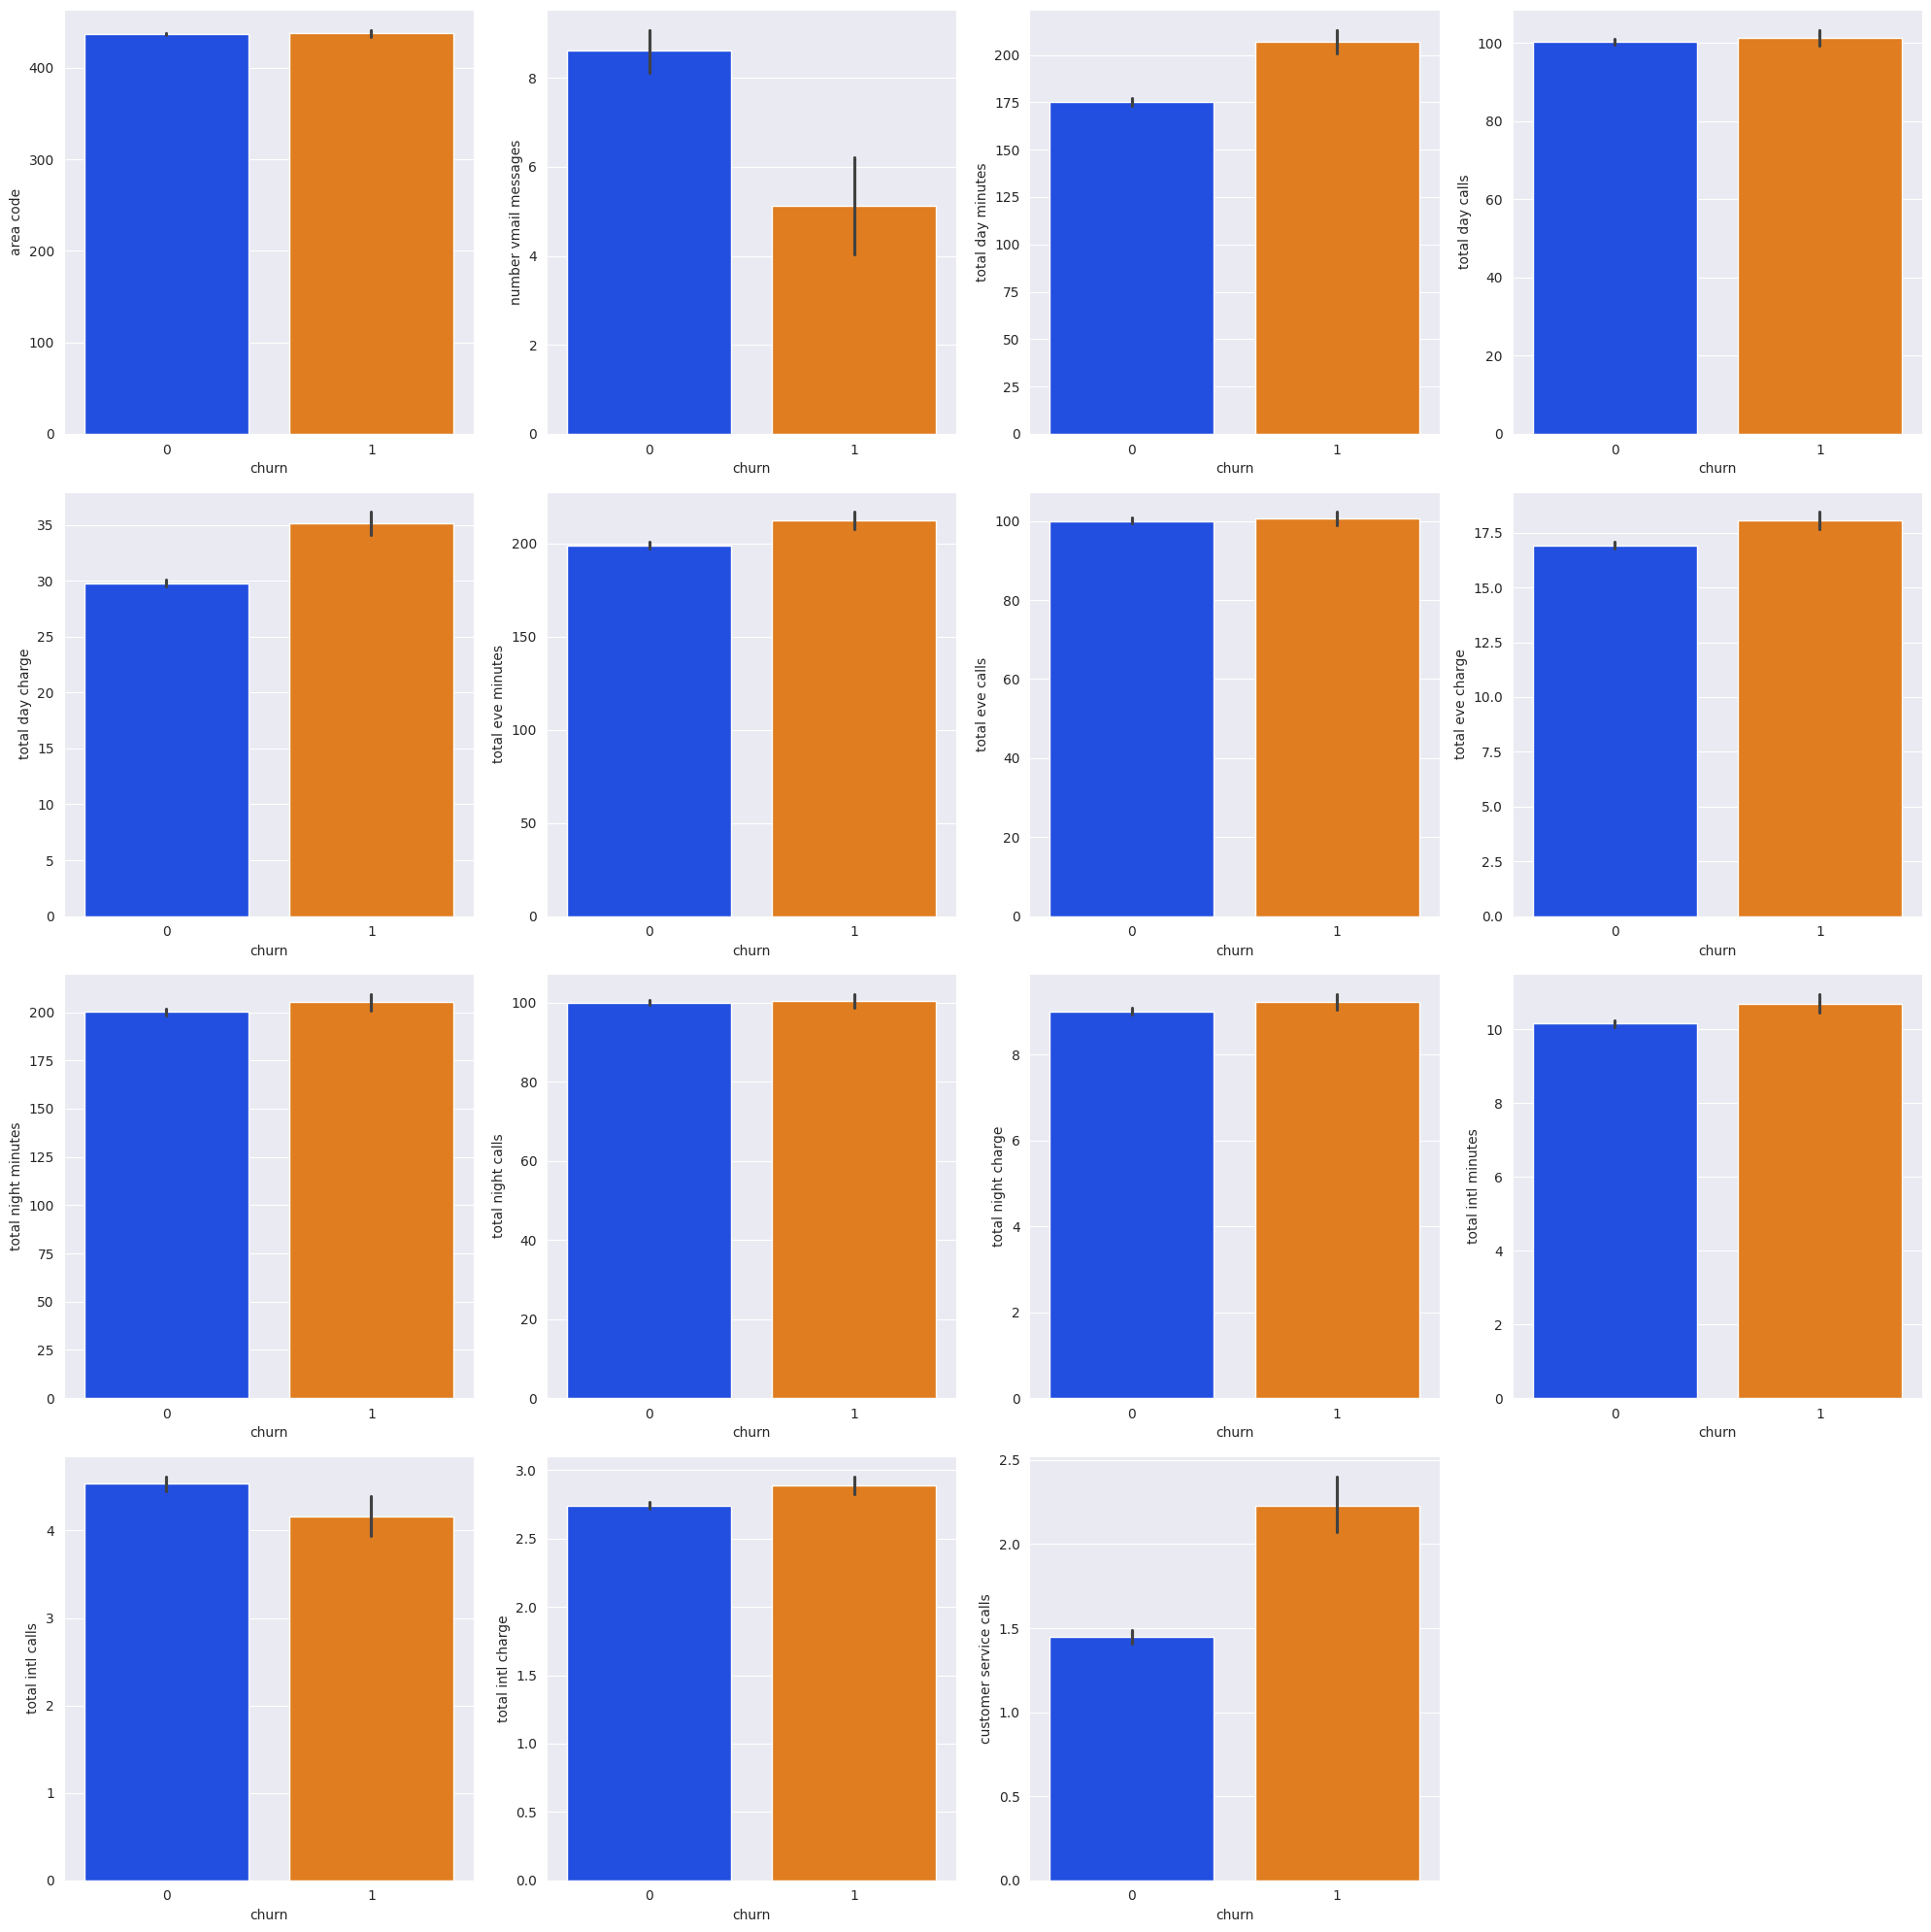

In [ ]:
plt.figure(figsize=(20,20))

sns.set_style("darkgrid")

for i in range(0, len(num.columns) - 1) :

    plt.subplot(4,4,i+1)
    sns.barplot(data=num , x="churn" , y=num.columns[i] , palette="bright")
    plt.tight_layout()

kesimpulan yang dapat di ambil adalah :

  1. pengguna yang lebih sering melakukan panggilan ke customer service berpotensi melakukan churn atau berhenti berlangganan
  2. yang menerima pesan suara atau voice vmail massage lebih banyak cenderung lanjut berlangganan atau tidak melakukan churn
  3. total day minutes yang lebih banyak adalah mereka yang melakukan churn atau berhenti berlangganan

In [ ]:
data.head()

area code international plan voice mail plan  number vmail messages  \
0        415                 no             yes                     25   
1        415                 no             yes                     26   
2        415                 no              no                      0   
3        408                yes              no                      0   
4        415                yes              no                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78               244.70                 91   
1              103             16.62               254.40                103   
2              110             10.30               162.60                104   
3               88              5.26               196.90                 89   
4              122             12.61               186.90                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01               10.00                 3   
1               11.45               13.70                 3   
2                7.32               12.20                 5   
3                8.86                6.60                 7   
4                8.41               10.10                 3   

   total intl charge  customer service calls  churn  
0               2.70                       1      0  
1               3.70                       1      0  
2               3.29                       0      0  
3               1.78                       2      0  
4               2.73                       3      0

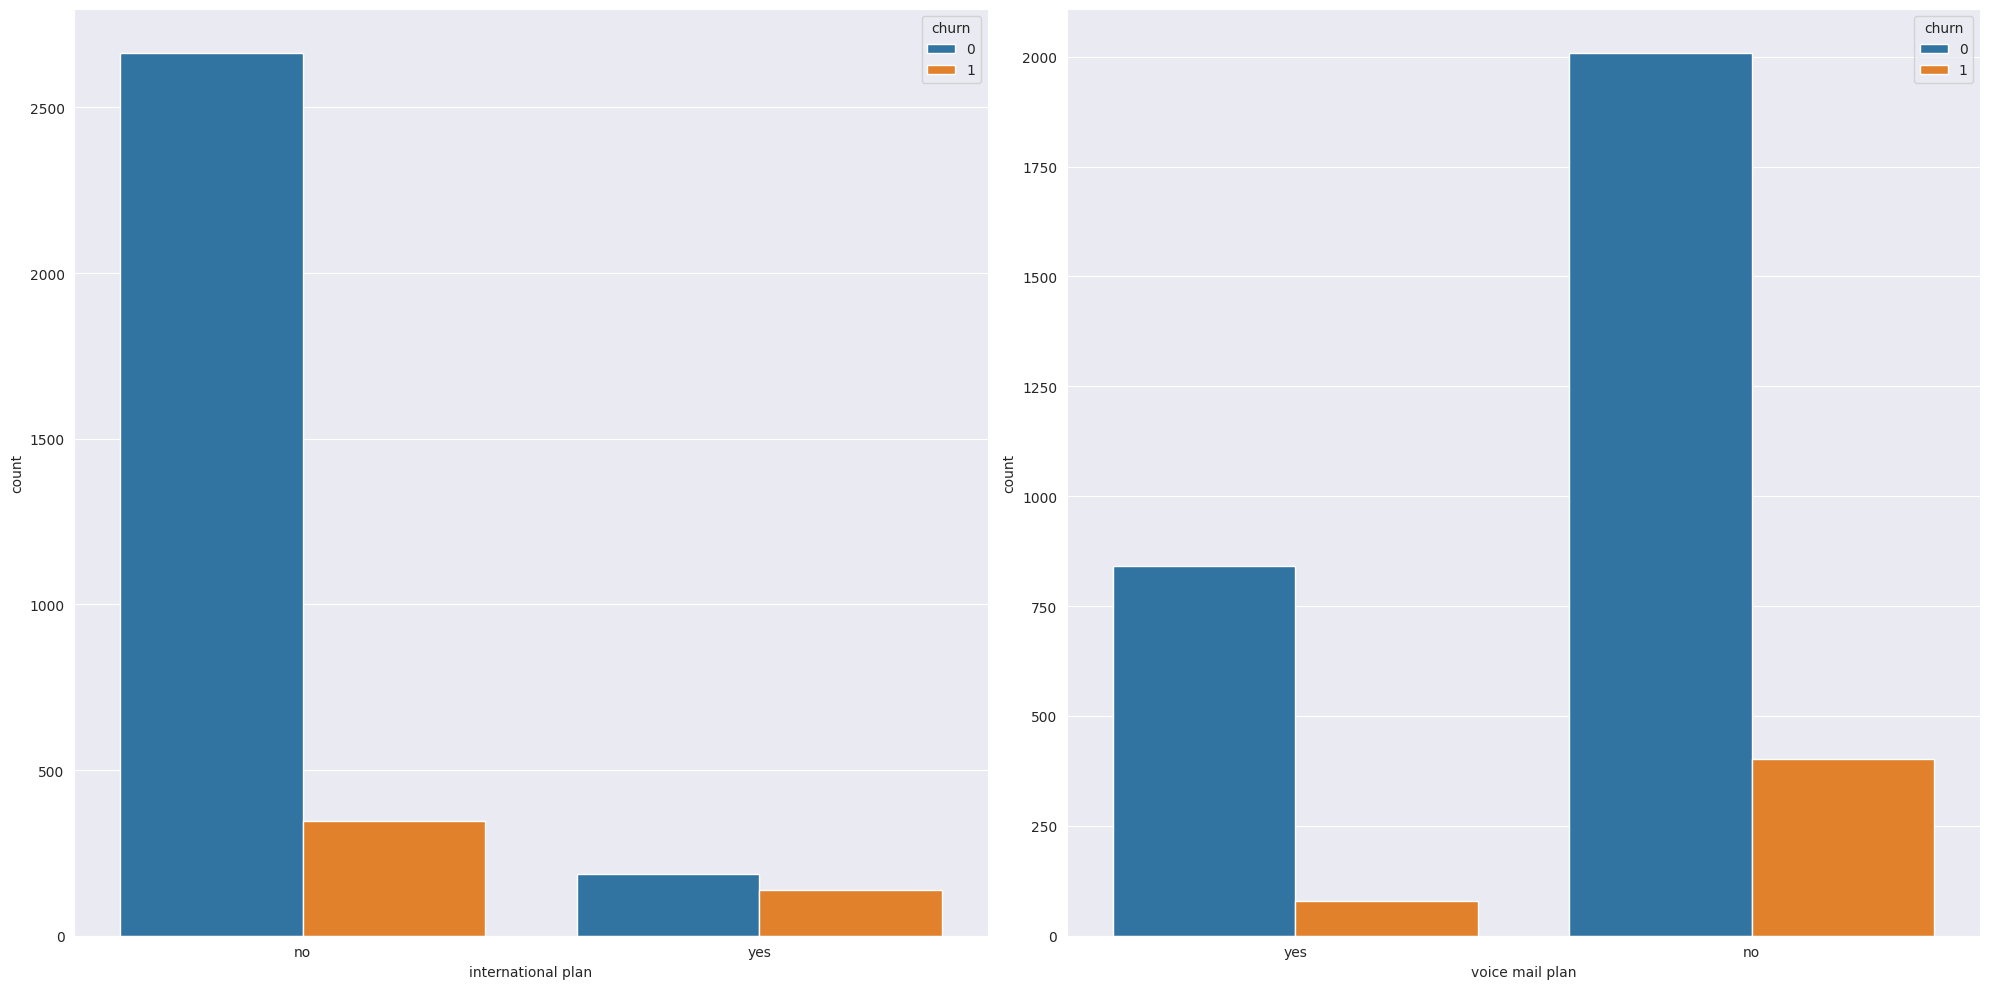

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.countplot(data = data , x="international plan" , hue='churn')

plt.subplot(1,2,2)
sns.countplot(data = data , x="voice mail plan" , hue='churn')
plt.tight_layout()

untuk pelanggan yang mengambil international plan dan voice mail mayoritas untuk tidak melakukan churn atau tetap berlangganan

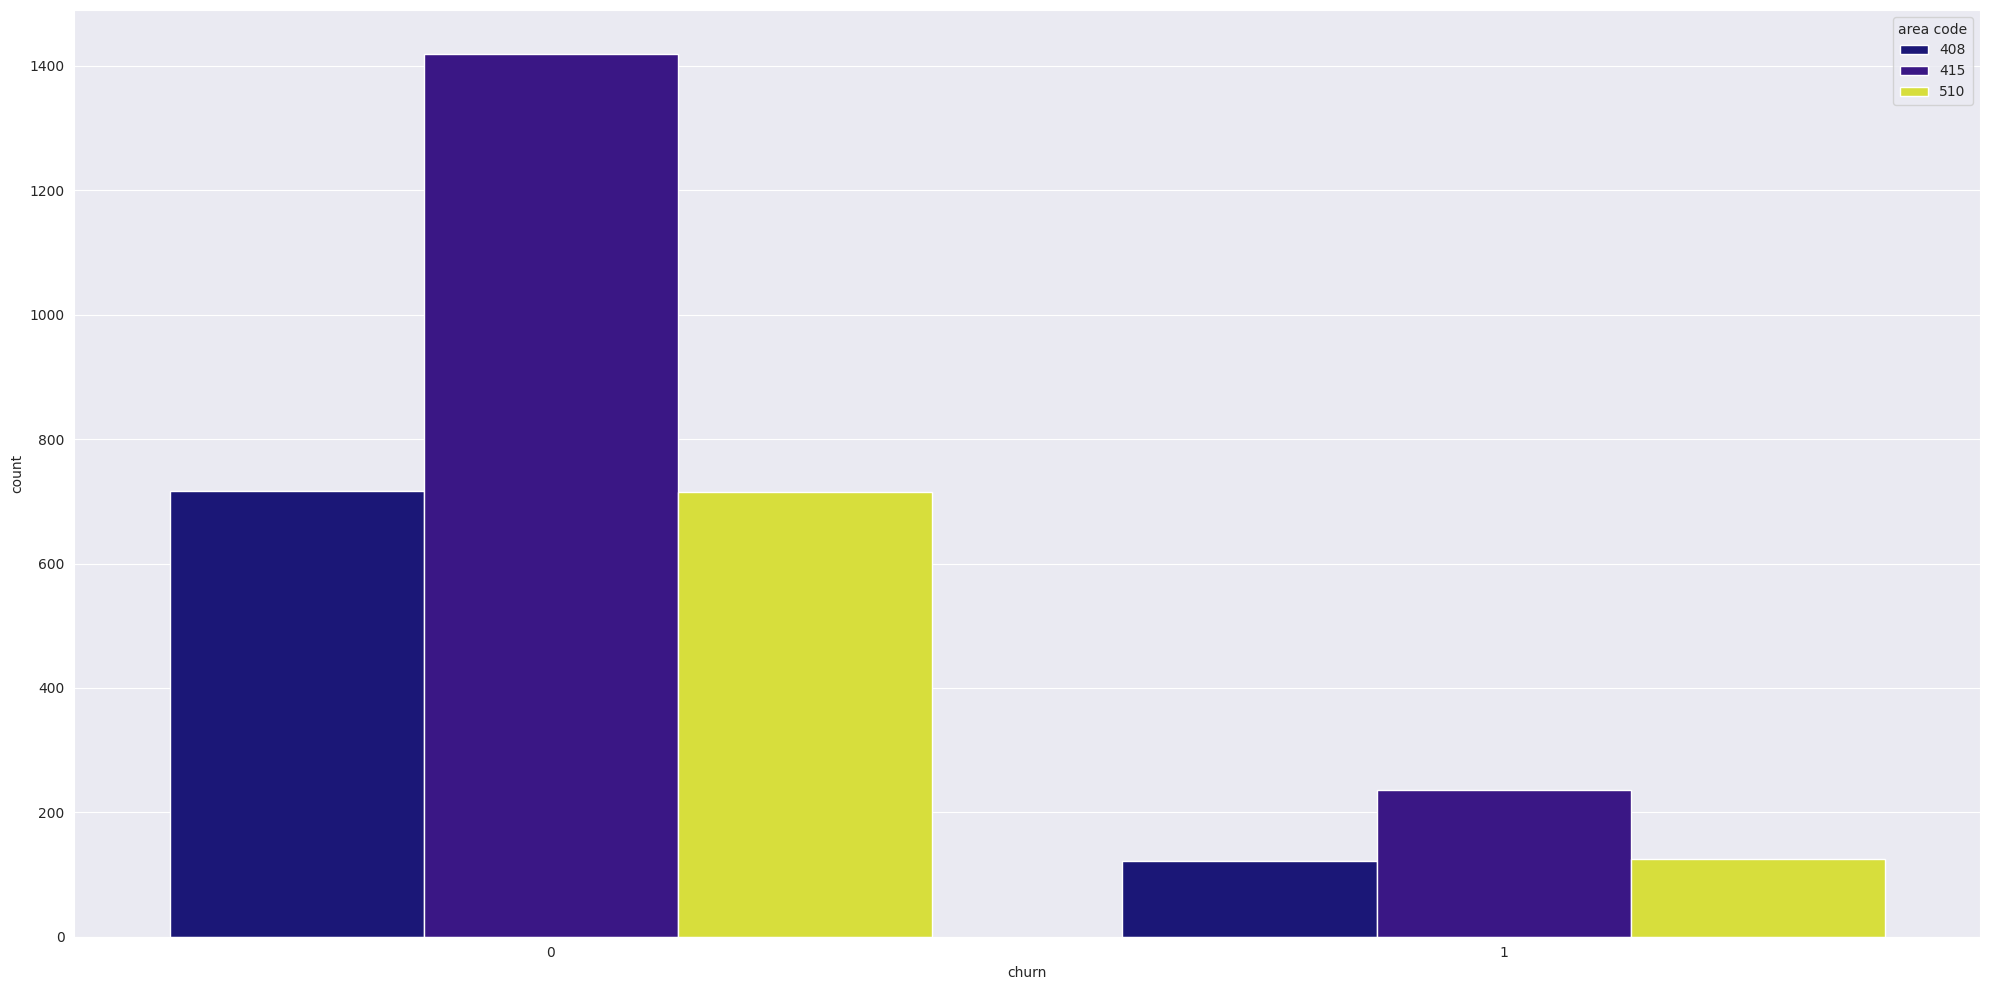

In [ ]:
plt.figure(figsize=(20,10))

sns.countplot(data=data , x="churn" , hue="area code" , palette="plasma")
plt.tight_layout()

kesimpulan yang dapat di ambil :

  1. di area churn paling banyak berasal dari area code 415 dan paling sedikit dari wilayah 408
  2. di area tidak melakukan churn paling banyak berasal dari area code 415 dan area code 408 dan 510 seimbang

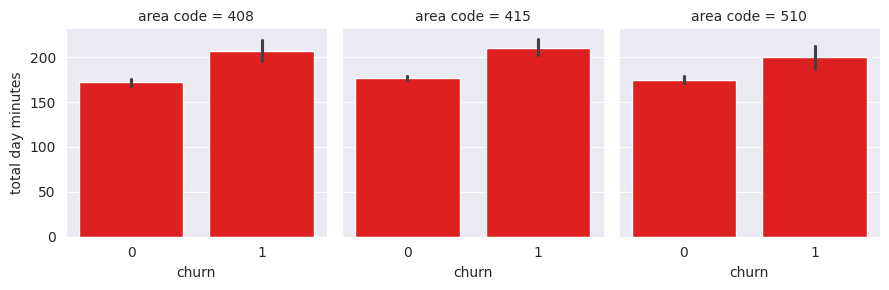

In [ ]:
fg = sns.FacetGrid(data , col="area code" , height=3 , aspect=1)
fg.map(sns.barplot , "churn" , "total day minutes" , color='red')

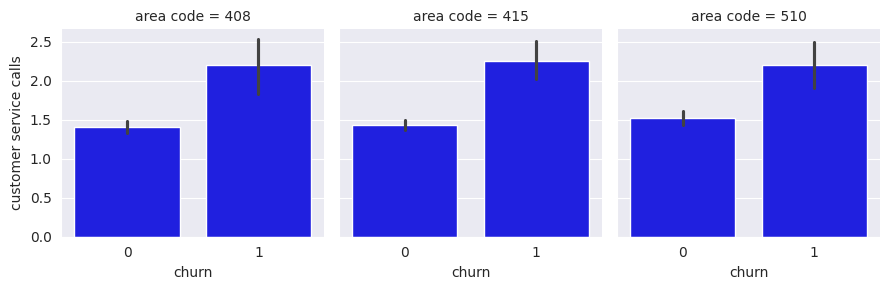

In [ ]:
fg = sns.FacetGrid(data , col="area code" , height=3 , aspect=1)
fg.map(sns.barplot , "churn" , "customer service calls" , color='blue')

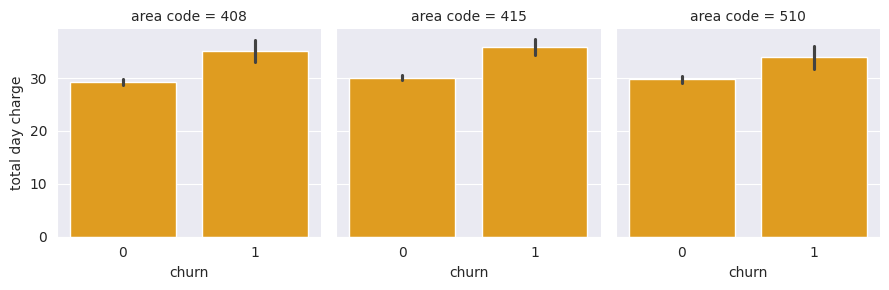

In [ ]:
fg = sns.FacetGrid(data , col="area code" , height=3 , aspect=1)
fg.map(sns.barplot , "churn" , 'total day charge' , color='orange')

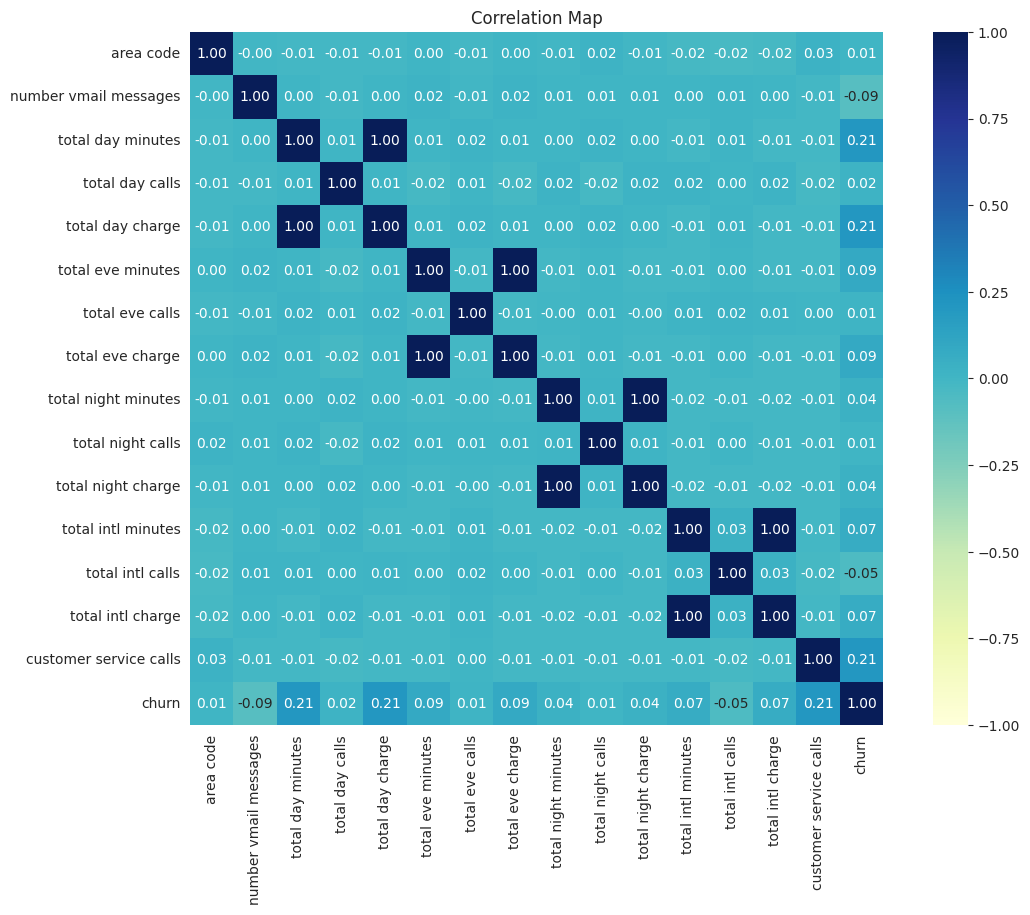

In [ ]:
cr=num.corr()
plt.figure(figsize=(13,9))
sns.heatmap(cr, annot=True,fmt='.2f',cmap='YlGnBu',vmin=-1,vmax=1, square=True)
plt.xticks(rotation=90)
plt.title('Correlation Map')
plt.show()

In [ ]:
# sns.pairplot(data=data , diag_kind='kde' , hue="churn")

dapat disimpulkan bahwa  :

1. kolom total int minutes dengan kolom total int charge sangat berkorelasi tinggi
2. kolom total night minutes dengan kolom total night charge sangat berkorelasi tinggi
3. kolom total eve minutes dengan kolom total eve charge sangat berkorelasi tinggi
4. kolom total day minutes dengan kolom total day charge sangat berkorelasi tinggi

# Data Preprocessing

In [ ]:
data.head()

area code international plan voice mail plan  number vmail messages  \
0        415                 no             yes                     25   
1        415                 no             yes                     26   
2        415                 no              no                      0   
3        408                yes              no                      0   
4        415                yes              no                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78               244.70                 91   
1              103             16.62               254.40                103   
2              110             10.30               162.60                104   
3               88              5.26               196.90                 89   
4              122             12.61               186.90                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01               10.00                 3   
1               11.45               13.70                 3   
2                7.32               12.20                 5   
3                8.86                6.60                 7   
4                8.41               10.10                 3   

   total intl charge  customer service calls  churn  
0               2.70                       1      0  
1               3.70                       1      0  
2               3.29                       0      0  
3               1.78                       2      0  
4               2.73                       3      0

### mencek nilai missing values

In [ ]:
data.isna().sum()

area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

data dapat langsung diolah karena tidak ada missing values

## Mengecek variabel kategorik

In [ ]:
data[["area code" , "international plan" , "voice mail plan"]]

area code international plan voice mail plan
0           415                 no             yes
1           415                 no             yes
2           415                 no              no
3           408                yes              no
4           415                yes              no
...         ...                ...             ...
3328        415                 no             yes
3329        415                 no              no
3330        510                 no              no
3331        510                yes              no
3332        415                 no             yes

[3333 rows x 3 columns]

In [ ]:
data.loc[data["international plan"] == "yes" ,'international plan' ] = 1
data.loc[data["international plan"] == "no" , 'international plan'] = 0

data.loc[data["voice mail plan"] == "yes" , 'voice mail plan'] = 1
data.loc[data["voice mail plan"] == "no" , 'voice mail plan'] = 0

In [ ]:
data["voice mail plan"] = data["voice mail plan"].astype(int)
data["international plan"] = data["international plan"].astype(int)
data["churn"] = data["churn"].astype("Int64")

In [ ]:
data[["area code" , "international plan" , "voice mail plan"]]

area code  international plan  voice mail plan
0           415                   0                1
1           415                   0                1
2           415                   0                0
3           408                   1                0
4           415                   1                0
...         ...                 ...              ...
3328        415                   0                1
3329        415                   0                0
3330        510                   0                0
3331        510                   1                0
3332        415                   0                1

[3333 rows x 3 columns]

# Data Preparation

In [ ]:
df = data.copy()

In [ ]:
df

area code  international plan  voice mail plan  number vmail messages  \
0           415                   0                1                     25   
1           415                   0                1                     26   
2           415                   0                0                      0   
3           408                   1                0                      0   
4           415                   1                0                      0   
...         ...                 ...              ...                    ...   
3328        415                   0                1                     36   
3329        415                   0                0                      0   
3330        510                   0                0                      0   
3331        510                   1                0                      0   
3332        415                   0                1                     25   

      total day minutes  total day calls  total day charge  total eve minutes  \
0                265.10              110             45.07             197.40   
1                161.60              123             27.47             195.50   
2                243.40              114             41.38             121.20   
3                299.40               71             50.90              61.90   
4                166.70              113             28.34             148.30   
...                 ...              ...               ...                ...   
3328             156.20               77             26.55             215.50   
3329             231.10               57             39.29             153.40   
3330             180.80              109             30.74             288.80   
3331             213.80              105             36.35             159.60   
3332             234.40              113             39.85             265.90   

      total eve calls  total eve charge  total night minutes  \
0                  99             16.78               244.70   
1                 103             16.62               254.40   
2                 110             10.30               162.60   
3                  88              5.26               196.90   
4                 122             12.61               186.90   
...               ...               ...                  ...   
3328              126             18.32               279.10   
3329               55             13.04               191.30   
3330               58             24.55               191.90   
3331               84             13.57               139.20   
3332               82             22.60               241.40   

      total night calls  total night charge  total intl minutes  \
0                    91               11.01               10.00   
1                   103               11.45               13.70   
2                   104                7.32               12.20   
3                    89                8.86                6.60   
4                   121                8.41               10.10   
...                 ...                 ...                 ...   
3328                 83               12.56                9.90   
3329                123                8.61                9.60   
3330                 91                8.64               14.10   
3331                137                6.26                5.00   
3332                 77               10.86               13.70   

      total intl calls  total intl charge  customer service calls  churn  
0                    3               2.70                       1      0  
1                    3               3.70                       1      0  
2                    5               3.29                       0      0  
3                    7               1.78                       2      0  
4                    3               2.73                       3      0  
...                ...                ...                   

In [ ]:
df.shape

(3333, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area code               3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [ ]:
df["churn"].value_counts()

0    2850
1     483
Name: churn, dtype: Int64

In [ ]:
df.corr()

area code  international plan  voice mail plan  \
area code                    1.00                0.05            -0.00   
international plan           0.05                1.00             0.01   
voice mail plan             -0.00                0.01             1.00   
number vmail messages       -0.00                0.01             0.96   
total day minutes           -0.01                0.05            -0.00   
total day calls             -0.01                0.00            -0.01   
total day charge            -0.01                0.05            -0.00   
total eve minutes            0.00                0.02             0.02   
total eve calls             -0.01                0.01            -0.01   
total eve charge             0.00                0.02             0.02   
total night minutes         -0.01               -0.03             0.01   
total night calls            0.02                0.01             0.02   
total night charge          -0.01               -0.03             0.01   
total intl minutes          -0.02                0.05            -0.00   
total intl calls            -0.02                0.02             0.01   
total intl charge           -0.02                0.05            -0.00   
customer service calls       0.03               -0.02            -0.02   
churn                        0.01                0.26            -0.10   

                        number vmail messages  total day minutes  \
area code                               -0.00              -0.01   
international plan                       0.01               0.05   
voice mail plan                          0.96              -0.00   
number vmail messages                    1.00               0.00   
total day minutes                        0.00               1.00   
total day calls                         -0.01               0.01   
total day charge                         0.00               1.00   
total eve minutes                        0.02               0.01   
total eve calls                         -0.01               0.02   
total eve charge                         0.02               0.01   
total night minutes                      0.01               0.00   
total night calls                        0.01               0.02   
total night charge                       0.01               0.00   
total intl minutes                       0.00              -0.01   
total intl calls                         0.01               0.01   
total intl charge                        0.00              -0.01   
customer service calls                  -0.01              -0.01   
churn                                   -0.09               0.21   

                        total day calls  total day charge  total eve minutes  \
area code                         -0.01             -0.01               0.00   
international plan                 0.00              0.05               0.02   
voice mail plan                   -0.01             -0.00               0.02   
number vmail messages             -0.01              0.00               0.02   
total day minutes                  0.01              1.00               0.01   
total day calls                    1.00              0.01              -0.02   
total day charge                   0.01              1.00               0.01   
total eve minutes                 -0.02              0.01               1.00   
total eve calls                    0.01              0.02              -0.01   
total eve charge                  -0.02              0.01               1.00   
total night minutes                0.02              0.00              -0.01   
total night calls                 -0.02              0.02               0.01   
total night charge                 0.02              0.00              -0.01   
total intl minutes                 0.02             -0.01              -0.01   
total intl calls                   0.00              0.01               0.00   
total intl charge                  0.02     

Tidak ada yang berkorelasi secara langsung dengan variable Churn

# export clean data

In [ ]:
df.head()

area code  international plan  voice mail plan  number vmail messages  \
0        415                   0                1                     25   
1        415                   0                1                     26   
2        415                   0                0                      0   
3        408                   1                0                      0   
4        415                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78               244.70                 91   
1              103             16.62               254.40                103   
2              110             10.30               162.60                104   
3               88              5.26               196.90                 89   
4              122             12.61               186.90                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01               10.00                 3   
1               11.45               13.70                 3   
2                7.32               12.20                 5   
3                8.86                6.60                 7   
4                8.41               10.10                 3   

   total intl charge  customer service calls  churn  
0               2.70                       1      0  
1               3.70                       1      0  
2               3.29                       0      0  
3               1.78                       2      0  
4               2.73                       3      0

In [ ]:
df.to_csv("clean_df.csv")

# MODELLING

In [ ]:
class LogTransform():
    def __init__(self):
        pass

    def fit(self, X):
        return self

    def transform(self, X):
        return np.log(X+1)

    def inverse_transform(self, X):
        return np.exp(X)-1

class SQRTTransform():
    def __init__(self):
        pass

    def fit(self, X):
        return self

    def transform(self, X):
        return np.sqrt(X)

    def inverse_transform(self, X):
        return np.power(X,2)

In [ ]:
df.head()

area code  international plan  voice mail plan  number vmail messages  \
0        415                   0                1                     25   
1        415                   0                1                     26   
2        415                   0                0                      0   
3        408                   1                0                      0   
4        415                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78               244.70                 91   
1              103             16.62               254.40                103   
2              110             10.30               162.60                104   
3               88              5.26               196.90                 89   
4              122             12.61               186.90                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01               10.00                 3   
1               11.45               13.70                 3   
2                7.32               12.20                 5   
3                8.86                6.60                 7   
4                8.41               10.10                 3   

   total intl charge  customer service calls  churn  
0               2.70                       1      0  
1               3.70                       1      0  
2               3.29                       0      0  
3               1.78                       2      0  
4               2.73                       3      0

In [ ]:
df.isna().sum()

area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [ ]:
dataset = pd.get_dummies(df , columns=["area code"])
dataset.head()

international plan  voice mail plan  number vmail messages  \
0                   0                1                     25   
1                   0                1                     26   
2                   0                0                      0   
3                   1                0                      0   
4                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78               244.70                 91   
1              103             16.62               254.40                103   
2              110             10.30               162.60                104   
3               88              5.26               196.90                 89   
4              122             12.61               186.90                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01               10.00                 3   
1               11.45               13.70                 3   
2                7.32               12.20                 5   
3                8.86                6.60                 7   
4                8.41               10.10                 3   

   total intl charge  customer service calls  churn  area code_408  \
0               2.70                       1      0              0   
1               3.70                       1      0              0   
2               3.29                       0      0              0   
3               1.78                       2      0              1   
4               2.73                       3      0              0   

   area code_415  area code_510  
0              1              0  
1              1              0  
2              1              0  
3              0              0  
4              1              0

# Split Data

In [ ]:
X = dataset.drop("churn" , axis='columns')
y = dataset["churn"]

In [ ]:
X.head()

international plan  voice mail plan  number vmail messages  \
0                   0                1                     25   
1                   0                1                     26   
2                   0                0                      0   
3                   1                0                      0   
4                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78               244.70                 91   
1              103             16.62               254.40                103   
2              110             10.30               162.60                104   
3               88              5.26               196.90                 89   
4              122             12.61               186.90                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01               10.00                 3   
1               11.45               13.70                 3   
2                7.32               12.20                 5   
3                8.86                6.60                 7   
4                8.41               10.10                 3   

   total intl charge  customer service calls  area code_408  area code_415  \
0               2.70                       1              0              1   
1               3.70                       1              0              1   
2               3.29                       0              0              1   
3               1.78                       2              1              0   
4               2.73                       3              0              1   

   area code_510  
0              0  
1              0  
2              0  
3              0  
4              0

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: Int64

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.25 , random_state=69)

In [ ]:
X_train.head()

international plan  voice mail plan  number vmail messages  \
2504                   0                0                      0   
1790                   0                0                      0   
978                    0                0                      0   
2385                   0                0                      0   
261                    0                0                      0   

      total day minutes  total day calls  total day charge  total eve minutes  \
2504             167.50               96             28.48             139.10   
1790             191.60              115             32.57             205.60   
978              278.00              102             47.26             266.40   
2385             214.60               78             36.48             251.70   
261              134.50               88             22.87             143.10   

      total eve calls  total eve charge  total night minutes  \
2504              104             11.82               138.40   
1790              108             17.48               210.20   
978               114             22.64               224.10   
2385               98             21.39               240.80   
261               112             12.16               223.90   

      total night calls  total night charge  total intl minutes  \
2504                 87                6.23               13.00   
1790                123                9.46                9.20   
978                 118               10.08               13.10   
2385                 88               10.84               13.90   
261                  61               10.08               15.40   

      total intl calls  total intl charge  customer service calls  \
2504                 1               3.51                       1   
1790                 3               2.48                       2   
978                  4               3.54                       4   
2385                 2               3.75                       0   
261                  1               4.16                       1   

      area code_408  area code_415  area code_510  
2504              0              1              0  
1790              1              0              0  
978               0              1              0  
2385              1              0              0  
261               1              0              0

In [ ]:
y_train.head()

2504    0
1790    0
978     1
2385    0
261     0
Name: churn, dtype: Int64

# CASE 1


1. menggunakan parameter default
2. menggunakan scaller

## Tanpa oversampling dan undersampling

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train , X_test , y_train , y_test)
models

 93%|█████████▎| 27/29 [00:06<00:00,  6.26it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2207
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:06<00:00,  4.29it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.88     0.88      0.95   
RandomForestClassifier             0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.91               0.83     0.83      0.91   
BaggingClassifier                  0.94               0.83     0.83      0.93   
QuadraticDiscriminantAnalysis      0.82               0.77     0.77      0.84   
SVC                                0.92               0.77     0.77      0.91   
ExtraTreesClassifier               0.93               0.77     0.77      0.92   
GaussianNB                         0.87               0.74     0.74      0.87   
NearestCentroid                    0.74               0.73     0.73      0.77   
ExtraTreeClassifier                0.86               0.70     0.70      0.85   
LabelPropagation                   0.87               0.69     0.69      0.86   
LabelSpreading                     0.87               0.69     0.69      0.86   
KNeighborsClassifier               0.88               0.65     0.65      0.86   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
PassiveAggressiveClassifier        0.80               0.65     0.65      0.80   
LinearDiscriminantAnalysis         0.86               0.61     0.61      0.83   
LogisticRegression                 0.86               0.58     0.58      0.83   
Perceptron                         0.82               0.58     0.58      0.80   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.55     0.55      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
SGDClassifier                      0.84               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.26  
RandomForestClassifier               0.84  
LGBMClassifier                       0.29  
DecisionTreeClassifier               0.11  
BaggingClassifier                    0.26  
QuadraticDiscriminantAnalysis        0.05  
SVC                                  0.22  
ExtraTreesClassifier                 0.52  
GaussianNB                           0.04  
NearestCentroid                      0.03  
ExtraTreeClassifier                  0.03  
LabelPropagation                     0.84  
LabelSpreading                       0.76  
KNeighborsClassifier                 0.15  
AdaBoostClassifier                   0.33  
PassiveAggressiveClassifier          0.03  
LinearDiscriminantAnalysis           0.08  
LogisticRegression                   0.06  
Perceptron                           0.03  
CalibratedClassifierCV               1.21  
BernoulliNB                          0.02  
LinearSVC                            0.28  
RidgeClassifier                      0.05  
RidgeClassifierCV                    0.06  
SGDClassifier                        0.07  
DummyClassifier                      0.04

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_ss , X_test_ss , y_train , y_test)
models

100%|██████████| 29/29 [00:05<00:00,  5.13it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2207
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.88     0.88      0.95   
RandomForestClassifier             0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.91               0.83     0.83      0.91   
BaggingClassifier                  0.94               0.83     0.83      0.93   
SVC                                0.92               0.77     0.77      0.91   
ExtraTreesClassifier               0.93               0.77     0.77      0.92   
GaussianNB                         0.87               0.74     0.74      0.87   
QuadraticDiscriminantAnalysis      0.88               0.73     0.73      0.87   
NearestCentroid                    0.74               0.73     0.73      0.77   
ExtraTreeClassifier                0.86               0.70     0.70      0.85   
LabelPropagation                   0.87               0.69     0.69      0.86   
LabelSpreading                     0.87               0.69     0.69      0.86   
KNeighborsClassifier               0.88               0.65     0.65      0.86   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
PassiveAggressiveClassifier        0.80               0.65     0.65      0.80   
LinearDiscriminantAnalysis         0.86               0.61     0.61      0.83   
LogisticRegression                 0.86               0.58     0.58      0.83   
Perceptron                         0.82               0.58     0.58      0.80   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.55     0.55      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
SGDClassifier                      0.84               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.22  
RandomForestClassifier               0.78  
LGBMClassifier                       0.21  
DecisionTreeClassifier               0.08  
BaggingClassifier                    0.27  
SVC                                  0.22  
ExtraTreesClassifier                 0.40  
GaussianNB                           0.02  
QuadraticDiscriminantAnalysis        0.03  
NearestCentroid                      0.03  
ExtraTreeClassifier                  0.05  
LabelPropagation                     0.48  
LabelSpreading                       0.61  
KNeighborsClassifier                 0.08  
AdaBoostClassifier                   0.39  
PassiveAggressiveClassifier          0.04  
LinearDiscriminantAnalysis           0.05  
LogisticRegression                   0.04  
Perceptron                           0.03  
CalibratedClassifierCV               1.02  
BernoulliNB                          0.03  
LinearSVC                            0.27  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.07  
SGDClassifier                        0.10  
DummyClassifier                      0.02

#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_mm , X_test_mm , y_train , y_test)
models

 93%|█████████▎| 27/29 [00:06<00:00,  6.65it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2207
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:06<00:00,  4.37it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.88     0.88      0.95   
RandomForestClassifier             0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.91               0.83     0.83      0.91   
BaggingClassifier                  0.94               0.83     0.83      0.93   
QuadraticDiscriminantAnalysis      0.87               0.81     0.81      0.88   
SVC                                0.92               0.77     0.77      0.91   
ExtraTreesClassifier               0.93               0.77     0.77      0.92   
GaussianNB                         0.87               0.74     0.74      0.87   
NearestCentroid                    0.74               0.73     0.73      0.77   
ExtraTreeClassifier                0.86               0.70     0.70      0.85   
LabelPropagation                   0.87               0.69     0.69      0.86   
LabelSpreading                     0.87               0.69     0.69      0.86   
KNeighborsClassifier               0.88               0.65     0.65      0.86   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
PassiveAggressiveClassifier        0.80               0.65     0.65      0.80   
LinearDiscriminantAnalysis         0.86               0.61     0.61      0.83   
LogisticRegression                 0.86               0.58     0.58      0.83   
Perceptron                         0.82               0.58     0.58      0.80   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.55     0.55      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
SGDClassifier                      0.84               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.22  
RandomForestClassifier               0.77  
LGBMClassifier                       0.25  
DecisionTreeClassifier               0.12  
BaggingClassifier                    0.27  
QuadraticDiscriminantAnalysis        0.03  
SVC                                  0.23  
ExtraTreesClassifier                 0.67  
GaussianNB                           0.04  
NearestCentroid                      0.03  
ExtraTreeClassifier                  0.05  
LabelPropagation                     0.70  
LabelSpreading                       0.67  
KNeighborsClassifier                 0.21  
AdaBoostClassifier                   0.39  
PassiveAggressiveClassifier          0.03  
LinearDiscriminantAnalysis           0.04  
LogisticRegression                   0.04  
Perceptron                           0.03  
CalibratedClassifierCV               1.16  
BernoulliNB                          0.02  
LinearSVC                            0.27  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.05  
SGDClassifier                        0.11  
DummyClassifier                      0.04

#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_rs , X_test_rs , y_train , y_test)
models

100%|██████████| 29/29 [00:05<00:00,  5.24it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2207
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.88     0.88      0.95   
RandomForestClassifier             0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.91               0.83     0.83      0.91   
BaggingClassifier                  0.94               0.83     0.83      0.93   
SVC                                0.92               0.77     0.77      0.91   
ExtraTreesClassifier               0.93               0.77     0.77      0.92   
QuadraticDiscriminantAnalysis      0.86               0.76     0.76      0.86   
GaussianNB                         0.87               0.74     0.74      0.87   
NearestCentroid                    0.74               0.73     0.73      0.77   
ExtraTreeClassifier                0.86               0.70     0.70      0.85   
LabelPropagation                   0.87               0.69     0.69      0.86   
LabelSpreading                     0.87               0.69     0.69      0.86   
KNeighborsClassifier               0.88               0.65     0.65      0.86   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
PassiveAggressiveClassifier        0.80               0.65     0.65      0.80   
LinearDiscriminantAnalysis         0.86               0.61     0.61      0.83   
LogisticRegression                 0.86               0.58     0.58      0.83   
Perceptron                         0.82               0.58     0.58      0.80   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.55     0.55      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
SGDClassifier                      0.84               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.19  
RandomForestClassifier               0.89  
LGBMClassifier                       0.19  
DecisionTreeClassifier               0.07  
BaggingClassifier                    0.25  
SVC                                  0.23  
ExtraTreesClassifier                 0.36  
QuadraticDiscriminantAnalysis        0.03  
GaussianNB                           0.03  
NearestCentroid                      0.03  
ExtraTreeClassifier                  0.03  
LabelPropagation                     0.55  
LabelSpreading                       0.65  
KNeighborsClassifier                 0.10  
AdaBoostClassifier                   0.31  
PassiveAggressiveClassifier          0.04  
LinearDiscriminantAnalysis           0.04  
LogisticRegression                   0.04  
Perceptron                           0.03  
CalibratedClassifierCV               0.92  
BernoulliNB                          0.02  
LinearSVC                            0.27  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.06  
SGDClassifier                        0.06  
DummyClassifier                      0.03

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_sqrt = sqrt.transform(X_train)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_sqrt , X_test_sqrt , y_train , y_test)
models

 97%|█████████▋| 28/29 [00:06<00:00,  6.05it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2207
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:06<00:00,  4.27it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.88     0.88      0.95   
XGBClassifier                      0.95               0.88     0.88      0.95   
RandomForestClassifier             0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.91               0.83     0.83      0.91   
BaggingClassifier                  0.94               0.83     0.83      0.93   
ExtraTreesClassifier               0.93               0.77     0.77      0.92   
QuadraticDiscriminantAnalysis      0.85               0.75     0.75      0.85   
ExtraTreeClassifier                0.88               0.75     0.75      0.87   
SVC                                0.91               0.72     0.72      0.90   
GaussianNB                         0.87               0.69     0.69      0.86   
NearestCentroid                    0.70               0.68     0.68      0.74   
LabelPropagation                   0.85               0.65     0.65      0.84   
LabelSpreading                     0.85               0.65     0.65      0.84   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
PassiveAggressiveClassifier        0.76               0.63     0.63      0.78   
KNeighborsClassifier               0.88               0.63     0.63      0.85   
Perceptron                         0.77               0.62     0.62      0.78   
LinearDiscriminantAnalysis         0.85               0.58     0.58      0.82   
SGDClassifier                      0.86               0.55     0.55      0.81   
LogisticRegression                 0.85               0.55     0.55      0.81   
CalibratedClassifierCV             0.85               0.55     0.55      0.81   
BernoulliNB                        0.85               0.55     0.55      0.81   
LinearSVC                          0.86               0.54     0.54      0.81   
RidgeClassifierCV                  0.86               0.54     0.54      0.80   
RidgeClassifier                    0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.28  
XGBClassifier                        0.24  
RandomForestClassifier               0.85  
DecisionTreeClassifier               0.12  
BaggingClassifier                    0.28  
ExtraTreesClassifier                 0.53  
QuadraticDiscriminantAnalysis        0.05  
ExtraTreeClassifier                  0.03  
SVC                                  0.25  
GaussianNB                           0.04  
NearestCentroid                      0.04  
LabelPropagation                     0.67  
LabelSpreading                       0.86  
AdaBoostClassifier                   0.33  
PassiveAggressiveClassifier          0.05  
KNeighborsClassifier                 0.12  
Perceptron                           0.05  
LinearDiscriminantAnalysis           0.04  
SGDClassifier                        0.09  
LogisticRegression                   0.08  
CalibratedClassifierCV               1.18  
BernoulliNB                          0.04  
LinearSVC                            0.28  
RidgeClassifierCV                    0.09  
RidgeClassifier                      0.06  
DummyClassifier                      0.03

#### LogTransform

In [ ]:
log = LogTransform()
X_train_log = log.transform(X_train)
X_test_log = log.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_log , X_test_log , y_train , y_test)
models

 93%|█████████▎| 27/29 [00:05<00:00,  6.17it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2207
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:06<00:00,  4.67it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.88     0.88      0.95   
RandomForestClassifier             0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.91               0.83     0.83      0.91   
BaggingClassifier                  0.94               0.83     0.83      0.93   
ExtraTreesClassifier               0.93               0.76     0.76      0.92   
ExtraTreeClassifier                0.87               0.73     0.73      0.87   
NearestCentroid                    0.71               0.71     0.71      0.75   
SVC                                0.90               0.68     0.68      0.88   
QuadraticDiscriminantAnalysis      0.46               0.66     0.66      0.51   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
GaussianNB                         0.85               0.65     0.65      0.84   
LabelSpreading                     0.85               0.65     0.65      0.84   
LabelPropagation                   0.85               0.65     0.65      0.84   
PassiveAggressiveClassifier        0.75               0.63     0.63      0.77   
KNeighborsClassifier               0.88               0.62     0.62      0.85   
SGDClassifier                      0.85               0.59     0.59      0.82   
LinearDiscriminantAnalysis         0.85               0.59     0.59      0.82   
BernoulliNB                        0.86               0.56     0.56      0.81   
LinearSVC                          0.86               0.55     0.55      0.81   
CalibratedClassifierCV             0.85               0.55     0.55      0.81   
LogisticRegression                 0.85               0.55     0.55      0.81   
Perceptron                         0.74               0.55     0.55      0.75   
RidgeClassifier                    0.86               0.54     0.54      0.80   
RidgeClassifierCV                  0.86               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.24  
RandomForestClassifier               0.81  
LGBMClassifier                       0.27  
DecisionTreeClassifier               0.08  
BaggingClassifier                    0.27  
ExtraTreesClassifier                 0.46  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.03  
SVC                                  0.26  
QuadraticDiscriminantAnalysis        0.04  
AdaBoostClassifier                   0.40  
GaussianNB                           0.03  
LabelSpreading                       0.78  
LabelPropagation                     0.57  
PassiveAggressiveClassifier          0.04  
KNeighborsClassifier                 0.09  
SGDClassifier                        0.07  
LinearDiscriminantAnalysis           0.07  
BernoulliNB                          0.03  
LinearSVC                            0.27  
CalibratedClassifierCV               1.02  
LogisticRegression                   0.05  
Perceptron                           0.04  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.06  
DummyClassifier                      0.03

## dengan oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
X_train_over , y_train_over  = over.fit_resample(X_train , y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over , X_test , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:11<00:00,  3.84it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2464
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:11<00:00,  2.52it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.91     0.91      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.94               0.87     0.87      0.94   
DecisionTreeClassifier             0.86               0.82     0.82      0.87   
RandomForestClassifier             0.93               0.81     0.81      0.92   
SVC                                0.91               0.80     0.80      0.91   
AdaBoostClassifier                 0.88               0.76     0.76      0.88   
ExtraTreesClassifier               0.92               0.75     0.75      0.91   
KNeighborsClassifier               0.85               0.75     0.75      0.86   
GaussianNB                         0.74               0.72     0.72      0.77   
NuSVC                              0.89               0.71     0.71      0.88   
LabelPropagation                   0.84               0.69     0.69      0.84   
LabelSpreading                     0.84               0.69     0.69      0.84   
ExtraTreeClassifier                0.80               0.69     0.69      0.81   
LinearSVC                          0.84               0.69     0.69      0.84   
CalibratedClassifierCV             0.85               0.68     0.68      0.84   
LogisticRegression                 0.84               0.68     0.68      0.84   
RidgeClassifier                    0.85               0.67     0.67      0.85   
RidgeClassifierCV                  0.85               0.67     0.67      0.85   
LinearDiscriminantAnalysis         0.85               0.66     0.66      0.84   
NearestCentroid                    0.70               0.65     0.65      0.74   
SGDClassifier                      0.74               0.65     0.65      0.76   
BernoulliNB                        0.68               0.64     0.64      0.72   
Perceptron                         0.68               0.63     0.63      0.72   
PassiveAggressiveClassifier        0.67               0.60     0.60      0.71   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.28  
LGBMClassifier                       0.25  
BaggingClassifier                    0.41  
DecisionTreeClassifier               0.14  
RandomForestClassifier               1.10  
SVC                                  0.50  
AdaBoostClassifier                   0.55  
ExtraTreesClassifier                 0.75  
KNeighborsClassifier                 0.10  
GaussianNB                           0.04  
NuSVC                                0.84  
LabelPropagation                     1.25  
LabelSpreading                       1.99  
ExtraTreeClassifier                  0.06  
LinearSVC                            0.46  
CalibratedClassifierCV               2.06  
LogisticRegression                   0.11  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.05  
LinearDiscriminantAnalysis           0.06  
NearestCentroid                      0.05  
SGDClassifier                        0.07  
BernoulliNB                          0.04  
Perceptron                           0.06  
PassiveAggressiveClassifier          0.04  
QuadraticDiscriminantAnalysis        0.04  
DummyClassifier                      0.06

dengan oversampling lumayan menaikan accuracy roc -auc dan f1- score

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_over_ss  = ss.fit_transform(X_train_over)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_ss , X_test_ss , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:10<00:00,  3.86it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2464
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:10<00:00,  2.75it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.91     0.91      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.94               0.87     0.87      0.94   
DecisionTreeClassifier             0.86               0.82     0.82      0.87   
RandomForestClassifier             0.93               0.81     0.81      0.92   
SVC                                0.91               0.80     0.80      0.91   
AdaBoostClassifier                 0.88               0.76     0.76      0.88   
ExtraTreesClassifier               0.92               0.75     0.75      0.91   
KNeighborsClassifier               0.85               0.75     0.75      0.86   
GaussianNB                         0.74               0.72     0.72      0.77   
NuSVC                              0.89               0.71     0.71      0.88   
LabelPropagation                   0.84               0.69     0.69      0.84   
LabelSpreading                     0.84               0.69     0.69      0.84   
ExtraTreeClassifier                0.80               0.69     0.69      0.81   
LinearSVC                          0.84               0.69     0.69      0.84   
CalibratedClassifierCV             0.85               0.68     0.68      0.84   
LogisticRegression                 0.84               0.68     0.68      0.84   
RidgeClassifier                    0.85               0.67     0.67      0.85   
RidgeClassifierCV                  0.85               0.67     0.67      0.85   
LinearDiscriminantAnalysis         0.85               0.66     0.66      0.84   
NearestCentroid                    0.70               0.65     0.65      0.74   
SGDClassifier                      0.74               0.65     0.65      0.76   
BernoulliNB                        0.68               0.64     0.64      0.72   
Perceptron                         0.68               0.63     0.63      0.72   
PassiveAggressiveClassifier        0.67               0.60     0.60      0.71   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.23  
LGBMClassifier                       0.25  
BaggingClassifier                    0.38  
DecisionTreeClassifier               0.13  
RandomForestClassifier               1.16  
SVC                                  0.50  
AdaBoostClassifier                   0.49  
ExtraTreesClassifier                 0.82  
KNeighborsClassifier                 0.14  
GaussianNB                           0.03  
NuSVC                                0.82  
LabelPropagation                     1.49  
LabelSpreading                       1.74  
ExtraTreeClassifier                  0.04  
LinearSVC                            0.35  
CalibratedClassifierCV               1.39  
LogisticRegression                   0.05  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.09  
LinearDiscriminantAnalysis           0.05  
NearestCentroid                      0.03  
SGDClassifier                        0.10  
BernoulliNB                          0.02  
Perceptron                           0.03  
PassiveAggressiveClassifier          0.04  
QuadraticDiscriminantAnalysis        0.03  
DummyClassifier                      0.04

#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_over_mm = mm.fit_transform(X_train_over)
X_test_mm = mm.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_mm , X_test_mm , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:10<00:00,  3.63it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2464
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:11<00:00,  2.58it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.91     0.91      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.94               0.87     0.87      0.94   
DecisionTreeClassifier             0.86               0.82     0.82      0.87   
RandomForestClassifier             0.93               0.81     0.81      0.92   
SVC                                0.91               0.80     0.80      0.91   
AdaBoostClassifier                 0.88               0.76     0.76      0.88   
ExtraTreesClassifier               0.92               0.75     0.75      0.91   
KNeighborsClassifier               0.85               0.75     0.75      0.86   
GaussianNB                         0.74               0.72     0.72      0.77   
NuSVC                              0.89               0.71     0.71      0.88   
LabelPropagation                   0.84               0.69     0.69      0.84   
LabelSpreading                     0.84               0.69     0.69      0.84   
ExtraTreeClassifier                0.80               0.69     0.69      0.81   
LinearSVC                          0.84               0.69     0.69      0.84   
CalibratedClassifierCV             0.85               0.68     0.68      0.84   
LogisticRegression                 0.84               0.68     0.68      0.84   
RidgeClassifier                    0.85               0.67     0.67      0.85   
RidgeClassifierCV                  0.85               0.67     0.67      0.85   
LinearDiscriminantAnalysis         0.85               0.66     0.66      0.84   
NearestCentroid                    0.70               0.65     0.65      0.74   
SGDClassifier                      0.74               0.65     0.65      0.76   
BernoulliNB                        0.68               0.64     0.64      0.72   
Perceptron                         0.68               0.63     0.63      0.72   
PassiveAggressiveClassifier        0.67               0.60     0.60      0.71   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.26  
LGBMClassifier                       0.26  
BaggingClassifier                    0.40  
DecisionTreeClassifier               0.11  
RandomForestClassifier               1.19  
SVC                                  0.50  
AdaBoostClassifier                   0.58  
ExtraTreesClassifier                 0.55  
KNeighborsClassifier                 0.14  
GaussianNB                           0.04  
NuSVC                                0.83  
LabelPropagation                     1.49  
LabelSpreading                       2.49  
ExtraTreeClassifier                  0.03  
LinearSVC                            0.39  
CalibratedClassifierCV               1.38  
LogisticRegression                   0.05  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.04  
LinearDiscriminantAnalysis           0.04  
NearestCentroid                      0.03  
SGDClassifier                        0.06  
BernoulliNB                          0.03  
Perceptron                           0.06  
PassiveAggressiveClassifier          0.05  
QuadraticDiscriminantAnalysis        0.05  
DummyClassifier                      0.03

#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_over_rs = rs.fit_transform(X_train_over)
X_test_rs = rs.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_rs , X_test_rs , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:11<00:00,  3.27it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2464
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:12<00:00,  2.41it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.91     0.91      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.94               0.87     0.87      0.94   
DecisionTreeClassifier             0.86               0.82     0.82      0.87   
RandomForestClassifier             0.93               0.81     0.81      0.92   
SVC                                0.91               0.80     0.80      0.91   
AdaBoostClassifier                 0.88               0.76     0.76      0.88   
ExtraTreesClassifier               0.92               0.75     0.75      0.91   
KNeighborsClassifier               0.85               0.75     0.75      0.86   
GaussianNB                         0.74               0.72     0.72      0.77   
NuSVC                              0.89               0.71     0.71      0.88   
LabelPropagation                   0.84               0.69     0.69      0.84   
LabelSpreading                     0.84               0.69     0.69      0.84   
ExtraTreeClassifier                0.80               0.69     0.69      0.81   
LinearSVC                          0.84               0.69     0.69      0.84   
CalibratedClassifierCV             0.85               0.68     0.68      0.84   
LogisticRegression                 0.84               0.68     0.68      0.84   
RidgeClassifier                    0.85               0.67     0.67      0.85   
RidgeClassifierCV                  0.85               0.67     0.67      0.85   
LinearDiscriminantAnalysis         0.85               0.66     0.66      0.84   
NearestCentroid                    0.70               0.65     0.65      0.74   
SGDClassifier                      0.74               0.65     0.65      0.76   
BernoulliNB                        0.68               0.64     0.64      0.72   
Perceptron                         0.68               0.63     0.63      0.72   
PassiveAggressiveClassifier        0.67               0.60     0.60      0.71   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.24  
LGBMClassifier                       0.29  
BaggingClassifier                    0.39  
DecisionTreeClassifier               0.09  
RandomForestClassifier               1.80  
SVC                                  0.49  
AdaBoostClassifier                   0.47  
ExtraTreesClassifier                 0.48  
KNeighborsClassifier                 0.09  
GaussianNB                           0.05  
NuSVC                                1.30  
LabelPropagation                     1.30  
LabelSpreading                       2.30  
ExtraTreeClassifier                  0.02  
LinearSVC                            0.51  
CalibratedClassifierCV               1.38  
LogisticRegression                   0.13  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.06  
LinearDiscriminantAnalysis           0.14  
NearestCentroid                      0.08  
SGDClassifier                        0.11  
BernoulliNB                          0.04  
Perceptron                           0.05  
PassiveAggressiveClassifier          0.04  
QuadraticDiscriminantAnalysis        0.04  
DummyClassifier                      0.02

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_over_sqrt = sqrt.transform(X_train_over)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_sqrt , X_test_sqrt , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:11<00:00,  3.52it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2464
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:11<00:00,  2.51it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.91     0.91      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.94               0.86     0.86      0.93   
RandomForestClassifier             0.93               0.82     0.82      0.92   
DecisionTreeClassifier             0.86               0.82     0.82      0.87   
SVC                                0.91               0.78     0.78      0.90   
AdaBoostClassifier                 0.88               0.76     0.76      0.88   
ExtraTreesClassifier               0.91               0.75     0.75      0.90   
ExtraTreeClassifier                0.81               0.71     0.71      0.82   
KNeighborsClassifier               0.84               0.70     0.70      0.84   
NuSVC                              0.89               0.69     0.69      0.87   
LabelPropagation                   0.83               0.68     0.68      0.84   
LabelSpreading                     0.83               0.68     0.68      0.84   
GaussianNB                         0.72               0.67     0.67      0.75   
CalibratedClassifierCV             0.85               0.66     0.66      0.84   
LinearSVC                          0.84               0.66     0.66      0.84   
LogisticRegression                 0.84               0.66     0.66      0.83   
RidgeClassifier                    0.86               0.65     0.65      0.85   
RidgeClassifierCV                  0.86               0.65     0.65      0.85   
NearestCentroid                    0.69               0.64     0.64      0.73   
LinearDiscriminantAnalysis         0.86               0.64     0.64      0.84   
BernoulliNB                        0.69               0.63     0.63      0.73   
SGDClassifier                      0.73               0.61     0.61      0.75   
PassiveAggressiveClassifier        0.66               0.55     0.55      0.70   
Perceptron                         0.72               0.54     0.54      0.74   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.30  
LGBMClassifier                       0.26  
BaggingClassifier                    0.43  
RandomForestClassifier               1.35  
DecisionTreeClassifier               0.11  
SVC                                  0.56  
AdaBoostClassifier                   0.59  
ExtraTreesClassifier                 0.51  
ExtraTreeClassifier                  0.04  
KNeighborsClassifier                 0.10  
NuSVC                                1.39  
LabelPropagation                     1.12  
LabelSpreading                       1.57  
GaussianNB                           0.04  
CalibratedClassifierCV               1.64  
LinearSVC                            0.49  
LogisticRegression                   0.14  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.10  
NearestCentroid                      0.09  
LinearDiscriminantAnalysis           0.10  
BernoulliNB                          0.04  
SGDClassifier                        0.13  
PassiveAggressiveClassifier          0.07  
Perceptron                           0.08  
QuadraticDiscriminantAnalysis        0.09  
DummyClassifier                      0.05

hasil oversampling dengan SQRTTransform menghasilkan score yang lumayan tinggi dan f1-score naik 1 persen

#### LogTransform

In [ ]:
log = LogTransform()
X_train_over_log = log.transform(X_train_over)
X_test_log = log.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_log , X_test_log , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:10<00:00,  3.26it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2464
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:11<00:00,  2.61it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.91     0.91      0.95   
LGBMClassifier                     0.94               0.89     0.89      0.94   
BaggingClassifier                  0.94               0.86     0.86      0.93   
RandomForestClassifier             0.93               0.82     0.82      0.92   
DecisionTreeClassifier             0.86               0.82     0.82      0.87   
SVC                                0.91               0.76     0.76      0.90   
AdaBoostClassifier                 0.88               0.76     0.76      0.88   
ExtraTreesClassifier               0.90               0.71     0.71      0.89   
KNeighborsClassifier               0.83               0.69     0.69      0.83   
ExtraTreeClassifier                0.81               0.68     0.68      0.82   
NuSVC                              0.88               0.67     0.67      0.86   
CalibratedClassifierCV             0.85               0.67     0.67      0.84   
LinearSVC                          0.84               0.67     0.67      0.84   
LogisticRegression                 0.84               0.66     0.66      0.84   
LinearDiscriminantAnalysis         0.86               0.66     0.66      0.85   
RidgeClassifier                    0.86               0.65     0.65      0.85   
RidgeClassifierCV                  0.86               0.65     0.65      0.85   
GaussianNB                         0.70               0.65     0.65      0.74   
NearestCentroid                    0.68               0.65     0.65      0.72   
LabelSpreading                     0.82               0.65     0.65      0.82   
LabelPropagation                   0.82               0.65     0.65      0.82   
BernoulliNB                        0.70               0.63     0.63      0.73   
Perceptron                         0.73               0.63     0.63      0.76   
SGDClassifier                      0.84               0.59     0.59      0.82   
PassiveAggressiveClassifier        0.64               0.55     0.55      0.69   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.26  
LGBMClassifier                       0.25  
BaggingClassifier                    0.41  
RandomForestClassifier               1.52  
DecisionTreeClassifier               0.11  
SVC                                  0.76  
AdaBoostClassifier                   0.50  
ExtraTreesClassifier                 0.49  
KNeighborsClassifier                 0.09  
ExtraTreeClassifier                  0.03  
NuSVC                                0.94  
CalibratedClassifierCV               1.59  
LinearSVC                            0.40  
LogisticRegression                   0.09  
LinearDiscriminantAnalysis           0.05  
RidgeClassifier                      0.07  
RidgeClassifierCV                    0.13  
GaussianNB                           0.03  
NearestCentroid                      0.04  
LabelSpreading                       1.80  
LabelPropagation                     1.11  
BernoulliNB                          0.04  
Perceptron                           0.07  
SGDClassifier                        0.14  
PassiveAggressiveClassifier          0.06  
QuadraticDiscriminantAnalysis        0.05  
DummyClassifier                      0.03

## Dengan Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy="majority")
X_train_under , y_train_under = under.fit_resample(X_train , y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under , X_test , y_train_under , y_test )
models

100%|██████████| 29/29 [00:02<00:00, 10.77it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1956
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.91               0.91     0.91      0.92   
ExtraTreesClassifier               0.91               0.90     0.90      0.91   
XGBClassifier                      0.90               0.88     0.88      0.90   
LGBMClassifier                     0.90               0.88     0.88      0.91   
BaggingClassifier                  0.89               0.88     0.88      0.90   
NuSVC                              0.86               0.87     0.87      0.87   
SVC                                0.86               0.86     0.86      0.88   
AdaBoostClassifier                 0.82               0.81     0.81      0.84   
DecisionTreeClassifier             0.81               0.81     0.81      0.83   
GaussianNB                         0.81               0.79     0.79      0.83   
RidgeClassifier                    0.79               0.79     0.79      0.81   
CalibratedClassifierCV             0.79               0.79     0.79      0.81   
LinearSVC                          0.79               0.79     0.79      0.81   
LogisticRegression                 0.79               0.79     0.79      0.81   
LinearDiscriminantAnalysis         0.78               0.78     0.78      0.80   
KNeighborsClassifier               0.82               0.78     0.78      0.84   
RidgeClassifierCV                  0.78               0.78     0.78      0.81   
QuadraticDiscriminantAnalysis      0.77               0.76     0.76      0.80   
LabelSpreading                     0.72               0.73     0.73      0.76   
LabelPropagation                   0.72               0.73     0.73      0.76   
ExtraTreeClassifier                0.72               0.70     0.70      0.76   
NearestCentroid                    0.70               0.68     0.68      0.74   
Perceptron                         0.72               0.66     0.66      0.75   
BernoulliNB                        0.64               0.66     0.66      0.69   
SGDClassifier                      0.46               0.63     0.63      0.52   
PassiveAggressiveClassifier        0.68               0.61     0.61      0.72   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.36  
ExtraTreesClassifier                 0.23  
XGBClassifier                        0.13  
LGBMClassifier                       0.16  
BaggingClassifier                    0.10  
NuSVC                                0.09  
SVC                                  0.11  
AdaBoostClassifier                   0.19  
DecisionTreeClassifier               0.05  
GaussianNB                           0.02  
RidgeClassifier                      0.03  
CalibratedClassifierCV               0.30  
LinearSVC                            0.15  
LogisticRegression                   0.04  
LinearDiscriminantAnalysis           0.03  
KNeighborsClassifier                 0.08  
RidgeClassifierCV                    0.05  
QuadraticDiscriminantAnalysis        0.03  
LabelSpreading                       0.10  
LabelPropagation                     0.11  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.03  
Perceptron                           0.03  
BernoulliNB                          0.02  
SGDClassifier                        0.08  
PassiveAggressiveClassifier          0.03  
DummyClassifier                      0.03

#### StandartScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_under_ss  = ss.fit_transform(X_train_under)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_ss , X_test_ss , y_train_under , y_test )
models

100%|██████████| 29/29 [00:02<00:00, 10.18it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1956
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.91               0.91     0.91      0.92   
ExtraTreesClassifier               0.91               0.90     0.90      0.91   
XGBClassifier                      0.90               0.88     0.88      0.90   
LGBMClassifier                     0.90               0.88     0.88      0.91   
BaggingClassifier                  0.89               0.88     0.88      0.90   
NuSVC                              0.86               0.87     0.87      0.87   
SVC                                0.86               0.86     0.86      0.88   
AdaBoostClassifier                 0.82               0.81     0.81      0.84   
DecisionTreeClassifier             0.81               0.81     0.81      0.83   
GaussianNB                         0.81               0.79     0.79      0.83   
RidgeClassifier                    0.79               0.79     0.79      0.81   
CalibratedClassifierCV             0.79               0.79     0.79      0.81   
LinearSVC                          0.79               0.79     0.79      0.81   
LogisticRegression                 0.79               0.79     0.79      0.81   
LinearDiscriminantAnalysis         0.78               0.78     0.78      0.80   
KNeighborsClassifier               0.82               0.78     0.78      0.84   
RidgeClassifierCV                  0.78               0.78     0.78      0.81   
QuadraticDiscriminantAnalysis      0.74               0.77     0.77      0.78   
LabelSpreading                     0.72               0.73     0.73      0.76   
LabelPropagation                   0.72               0.73     0.73      0.76   
ExtraTreeClassifier                0.72               0.70     0.70      0.76   
NearestCentroid                    0.70               0.68     0.68      0.74   
Perceptron                         0.72               0.66     0.66      0.75   
BernoulliNB                        0.64               0.66     0.66      0.69   
SGDClassifier                      0.46               0.63     0.63      0.52   
PassiveAggressiveClassifier        0.68               0.61     0.61      0.72   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.36  
ExtraTreesClassifier                 0.29  
XGBClassifier                        0.13  
LGBMClassifier                       0.15  
BaggingClassifier                    0.11  
NuSVC                                0.10  
SVC                                  0.11  
AdaBoostClassifier                   0.21  
DecisionTreeClassifier               0.04  
GaussianNB                           0.03  
RidgeClassifier                      0.03  
CalibratedClassifierCV               0.33  
LinearSVC                            0.12  
LogisticRegression                   0.04  
LinearDiscriminantAnalysis           0.06  
KNeighborsClassifier                 0.08  
RidgeClassifierCV                    0.04  
QuadraticDiscriminantAnalysis        0.04  
LabelSpreading                       0.13  
LabelPropagation                     0.10  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.03  
Perceptron                           0.04  
BernoulliNB                          0.04  
SGDClassifier                        0.06  
PassiveAggressiveClassifier          0.04  
DummyClassifier                      0.04

#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_under_mm  = mm.fit_transform(X_train_under)
X_test_mm = mm.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_mm , X_test_mm , y_train_under , y_test )
models

100%|██████████| 29/29 [00:02<00:00, 10.77it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1956
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.91               0.91     0.91      0.92   
ExtraTreesClassifier               0.91               0.90     0.90      0.91   
XGBClassifier                      0.90               0.88     0.88      0.90   
LGBMClassifier                     0.90               0.88     0.88      0.91   
BaggingClassifier                  0.89               0.88     0.88      0.90   
NuSVC                              0.86               0.87     0.87      0.87   
SVC                                0.86               0.86     0.86      0.88   
AdaBoostClassifier                 0.82               0.81     0.81      0.84   
DecisionTreeClassifier             0.81               0.81     0.81      0.83   
QuadraticDiscriminantAnalysis      0.76               0.80     0.80      0.79   
GaussianNB                         0.81               0.79     0.79      0.83   
RidgeClassifier                    0.79               0.79     0.79      0.81   
CalibratedClassifierCV             0.79               0.79     0.79      0.81   
LinearSVC                          0.79               0.79     0.79      0.81   
LogisticRegression                 0.79               0.79     0.79      0.81   
LinearDiscriminantAnalysis         0.78               0.78     0.78      0.80   
KNeighborsClassifier               0.82               0.78     0.78      0.84   
RidgeClassifierCV                  0.78               0.78     0.78      0.81   
LabelSpreading                     0.72               0.73     0.73      0.76   
LabelPropagation                   0.72               0.73     0.73      0.76   
ExtraTreeClassifier                0.72               0.70     0.70      0.76   
NearestCentroid                    0.70               0.68     0.68      0.74   
Perceptron                         0.72               0.66     0.66      0.75   
BernoulliNB                        0.64               0.66     0.66      0.69   
SGDClassifier                      0.46               0.63     0.63      0.52   
PassiveAggressiveClassifier        0.68               0.61     0.61      0.72   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.34  
ExtraTreesClassifier                 0.25  
XGBClassifier                        0.14  
LGBMClassifier                       0.17  
BaggingClassifier                    0.10  
NuSVC                                0.10  
SVC                                  0.11  
AdaBoostClassifier                   0.18  
DecisionTreeClassifier               0.05  
QuadraticDiscriminantAnalysis        0.03  
GaussianNB                           0.04  
RidgeClassifier                      0.03  
CalibratedClassifierCV               0.34  
LinearSVC                            0.15  
LogisticRegression                   0.05  
LinearDiscriminantAnalysis           0.04  
KNeighborsClassifier                 0.07  
RidgeClassifierCV                    0.03  
LabelSpreading                       0.10  
LabelPropagation                     0.12  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.03  
Perceptron                           0.03  
BernoulliNB                          0.03  
SGDClassifier                        0.03  
PassiveAggressiveClassifier          0.03  
DummyClassifier                      0.03

#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_under_rs = rs.fit_transform(X_train_under)
X_test_rs = rs.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_rs , X_test_rs , y_train_under , y_test)
models

100%|██████████| 29/29 [00:03<00:00,  7.62it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1956
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.91               0.91     0.91      0.92   
ExtraTreesClassifier               0.91               0.90     0.90      0.91   
XGBClassifier                      0.90               0.88     0.88      0.90   
LGBMClassifier                     0.90               0.88     0.88      0.91   
BaggingClassifier                  0.89               0.88     0.88      0.90   
NuSVC                              0.86               0.87     0.87      0.87   
SVC                                0.86               0.86     0.86      0.88   
AdaBoostClassifier                 0.82               0.81     0.81      0.84   
DecisionTreeClassifier             0.81               0.81     0.81      0.83   
GaussianNB                         0.81               0.79     0.79      0.83   
RidgeClassifier                    0.79               0.79     0.79      0.81   
CalibratedClassifierCV             0.79               0.79     0.79      0.81   
LinearSVC                          0.79               0.79     0.79      0.81   
LogisticRegression                 0.79               0.79     0.79      0.81   
LinearDiscriminantAnalysis         0.78               0.78     0.78      0.80   
KNeighborsClassifier               0.82               0.78     0.78      0.84   
RidgeClassifierCV                  0.78               0.78     0.78      0.81   
QuadraticDiscriminantAnalysis      0.72               0.77     0.77      0.76   
LabelSpreading                     0.72               0.73     0.73      0.76   
LabelPropagation                   0.72               0.73     0.73      0.76   
ExtraTreeClassifier                0.72               0.70     0.70      0.76   
NearestCentroid                    0.70               0.68     0.68      0.74   
Perceptron                         0.72               0.66     0.66      0.75   
BernoulliNB                        0.64               0.66     0.66      0.69   
SGDClassifier                      0.46               0.63     0.63      0.52   
PassiveAggressiveClassifier        0.68               0.61     0.61      0.72   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.51  
ExtraTreesClassifier                 0.38  
XGBClassifier                        0.14  
LGBMClassifier                       0.15  
BaggingClassifier                    0.10  
NuSVC                                0.14  
SVC                                  0.10  
AdaBoostClassifier                   0.21  
DecisionTreeClassifier               0.04  
GaussianNB                           0.03  
RidgeClassifier                      0.06  
CalibratedClassifierCV               0.31  
LinearSVC                            0.18  
LogisticRegression                   0.09  
LinearDiscriminantAnalysis           0.14  
KNeighborsClassifier                 0.19  
RidgeClassifierCV                    0.10  
QuadraticDiscriminantAnalysis        0.06  
LabelSpreading                       0.25  
LabelPropagation                     0.16  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.08  
Perceptron                           0.05  
BernoulliNB                          0.03  
SGDClassifier                        0.11  
PassiveAggressiveClassifier          0.07  
DummyClassifier                      0.03

#### SQRTTransform


In [ ]:
sqrt = SQRTTransform()
X_train_under_sqrt = sqrt.transform(X_train_under)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_sqrt , X_test_sqrt , y_train_under , y_test)
models

100%|██████████| 29/29 [00:02<00:00, 11.00it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1956
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.91               0.91     0.91      0.92   
ExtraTreesClassifier               0.90               0.89     0.89      0.90   
LGBMClassifier                     0.91               0.89     0.89      0.91   
BaggingClassifier                  0.89               0.88     0.88      0.90   
XGBClassifier                      0.90               0.88     0.88      0.90   
NuSVC                              0.84               0.85     0.85      0.86   
SVC                                0.84               0.83     0.83      0.85   
DecisionTreeClassifier             0.81               0.81     0.81      0.83   
AdaBoostClassifier                 0.82               0.81     0.81      0.84   
KNeighborsClassifier               0.79               0.76     0.76      0.82   
GaussianNB                         0.78               0.76     0.76      0.80   
QuadraticDiscriminantAnalysis      0.76               0.75     0.75      0.79   
LinearSVC                          0.75               0.74     0.74      0.78   
RidgeClassifier                    0.75               0.74     0.74      0.78   
CalibratedClassifierCV             0.75               0.74     0.74      0.78   
LogisticRegression                 0.74               0.74     0.74      0.78   
RidgeClassifierCV                  0.74               0.74     0.74      0.78   
LinearDiscriminantAnalysis         0.73               0.71     0.71      0.76   
LabelPropagation                   0.70               0.71     0.71      0.74   
LabelSpreading                     0.70               0.71     0.71      0.74   
ExtraTreeClassifier                0.69               0.68     0.68      0.73   
SGDClassifier                      0.68               0.67     0.67      0.73   
NearestCentroid                    0.68               0.66     0.66      0.72   
PassiveAggressiveClassifier        0.68               0.65     0.65      0.72   
BernoulliNB                        0.64               0.64     0.64      0.69   
Perceptron                         0.69               0.61     0.61      0.73   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.35  
ExtraTreesClassifier                 0.21  
LGBMClassifier                       0.16  
BaggingClassifier                    0.10  
XGBClassifier                        0.13  
NuSVC                                0.10  
SVC                                  0.12  
DecisionTreeClassifier               0.04  
AdaBoostClassifier                   0.19  
KNeighborsClassifier                 0.07  
GaussianNB                           0.02  
QuadraticDiscriminantAnalysis        0.03  
LinearSVC                            0.14  
RidgeClassifier                      0.03  
CalibratedClassifierCV               0.30  
LogisticRegression                   0.03  
RidgeClassifierCV                    0.06  
LinearDiscriminantAnalysis           0.05  
LabelPropagation                     0.09  
LabelSpreading                       0.11  
ExtraTreeClassifier                  0.03  
SGDClassifier                        0.06  
NearestCentroid                      0.03  
PassiveAggressiveClassifier          0.03  
BernoulliNB                          0.03  
Perceptron                           0.03  
DummyClassifier                      0.03

#### LogTransform

In [ ]:
log = LogTransform()
X_train_under_log = log.transform(X_train_under)
X_test_log = log.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_log , X_test_log , y_train_under , y_test)
models

100%|██████████| 29/29 [00:02<00:00, 11.09it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1954
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.91               0.91     0.91      0.92   
LGBMClassifier                     0.90               0.89     0.89      0.91   
ExtraTreesClassifier               0.89               0.88     0.88      0.89   
BaggingClassifier                  0.89               0.88     0.88      0.90   
XGBClassifier                      0.90               0.88     0.88      0.90   
NuSVC                              0.83               0.84     0.84      0.85   
SVC                                0.82               0.82     0.82      0.84   
DecisionTreeClassifier             0.81               0.81     0.81      0.83   
AdaBoostClassifier                 0.82               0.81     0.81      0.84   
GaussianNB                         0.74               0.76     0.76      0.78   
LinearSVC                          0.75               0.74     0.74      0.78   
CalibratedClassifierCV             0.75               0.74     0.74      0.78   
RidgeClassifier                    0.74               0.74     0.74      0.78   
RidgeClassifierCV                  0.74               0.74     0.74      0.78   
LogisticRegression                 0.74               0.74     0.74      0.78   
KNeighborsClassifier               0.77               0.74     0.74      0.80   
LinearDiscriminantAnalysis         0.75               0.73     0.73      0.78   
ExtraTreeClassifier                0.70               0.69     0.69      0.74   
LabelPropagation                   0.69               0.68     0.68      0.73   
LabelSpreading                     0.69               0.68     0.68      0.73   
NearestCentroid                    0.67               0.67     0.67      0.72   
BernoulliNB                        0.66               0.65     0.65      0.70   
PassiveAggressiveClassifier        0.67               0.64     0.64      0.72   
Perceptron                         0.65               0.62     0.62      0.70   
SGDClassifier                      0.72               0.61     0.61      0.75   
QuadraticDiscriminantAnalysis      0.33               0.58     0.58      0.34   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.34  
LGBMClassifier                       0.15  
ExtraTreesClassifier                 0.23  
BaggingClassifier                    0.09  
XGBClassifier                        0.14  
NuSVC                                0.10  
SVC                                  0.12  
DecisionTreeClassifier               0.05  
AdaBoostClassifier                   0.18  
GaussianNB                           0.02  
LinearSVC                            0.14  
CalibratedClassifierCV               0.31  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.04  
LogisticRegression                   0.04  
KNeighborsClassifier                 0.08  
LinearDiscriminantAnalysis           0.06  
ExtraTreeClassifier                  0.03  
LabelPropagation                     0.10  
LabelSpreading                       0.10  
NearestCentroid                      0.03  
BernoulliNB                          0.02  
PassiveAggressiveClassifier          0.05  
Perceptron                           0.03  
SGDClassifier                        0.03  
QuadraticDiscriminantAnalysis        0.04  
DummyClassifier                      0.03

kesimpulannya :
 1. scaler tidak terlalu berdampak signifikan
 2. di case ini paling bagus dengan model XGBclascifier dan LGBMClassifier
 3. paling bagus dengan oversampling dengan sqrttransform dengan model LGBMClassifier

# CASE 2

menghilangkan colomn yang berkorelasi tinggi

## tanpa oversampling dan undersampling

In [ ]:
dataset.head()

international plan  voice mail plan  number vmail messages  \
0                   0                1                     25   
1                   0                1                     26   
2                   0                0                      0   
3                   1                0                      0   
4                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78               244.70                 91   
1              103             16.62               254.40                103   
2              110             10.30               162.60                104   
3               88              5.26               196.90                 89   
4              122             12.61               186.90                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01               10.00                 3   
1               11.45               13.70                 3   
2                7.32               12.20                 5   
3                8.86                6.60                 7   
4                8.41               10.10                 3   

   total intl charge  customer service calls  churn  area code_408  \
0               2.70                       1      0              0   
1               3.70                       1      0              0   
2               3.29                       0      0              0   
3               1.78                       2      0              1   
4               2.73                       3      0              0   

   area code_415  area code_510  
0              1              0  
1              1              0  
2              1              0  
3              0              0  
4              1              0

**Drop total day minutes , total eve minutes , total night minutes , total intl minutes karena berkorelasi tinggi dengan total day charge , total eve charge , total night charge , total intl charge**

In [ ]:
x = dataset.drop(['total day minutes' , 'total eve minutes' , 'total night minutes' , 'total intl minutes' , 'churn'] , axis='columns')
y = dataset["churn"]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x,y, test_size=0.25 , random_state=69)

In [ ]:
X_train.head()

international plan  voice mail plan  number vmail messages  \
2504                   0                0                      0   
1790                   0                0                      0   
978                    0                0                      0   
2385                   0                0                      0   
261                    0                0                      0   

      total day calls  total day charge  total eve calls  total eve charge  \
2504               96             28.48              104             11.82   
1790              115             32.57              108             17.48   
978               102             47.26              114             22.64   
2385               78             36.48               98             21.39   
261                88             22.87              112             12.16   

      total night calls  total night charge  total intl calls  \
2504                 87                6.23                 1   
1790                123                9.46                 3   
978                 118               10.08                 4   
2385                 88               10.84                 2   
261                  61               10.08                 1   

      total intl charge  customer service calls  area code_408  area code_415  \
2504               3.51                       1              0              1   
1790               2.48                       2              1              0   
978                3.54                       4              0              1   
2385               3.75                       0              1              0   
261                4.16                       1              1              0   

      area code_510  
2504              0  
1790              0  
978               0  
2385              0  
261               0

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train , X_test , y_train , y_test)
models

 97%|█████████▋| 28/29 [00:06<00:00,  4.71it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:06<00:00,  4.37it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.86     0.86      0.95   
DecisionTreeClassifier             0.91               0.83     0.83      0.91   
BaggingClassifier                  0.93               0.82     0.82      0.93   
RandomForestClassifier             0.93               0.81     0.81      0.93   
NearestCentroid                    0.79               0.78     0.78      0.81   
QuadraticDiscriminantAnalysis      0.87               0.75     0.75      0.87   
SVC                                0.92               0.74     0.74      0.91   
ExtraTreesClassifier               0.91               0.73     0.73      0.90   
GaussianNB                         0.86               0.69     0.69      0.85   
LabelSpreading                     0.86               0.67     0.67      0.85   
LabelPropagation                   0.86               0.67     0.67      0.85   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
SGDClassifier                      0.86               0.63     0.63      0.84   
KNeighborsClassifier               0.88               0.63     0.63      0.85   
ExtraTreeClassifier                0.81               0.62     0.62      0.81   
LinearDiscriminantAnalysis         0.85               0.60     0.60      0.83   
PassiveAggressiveClassifier        0.77               0.59     0.59      0.78   
LogisticRegression                 0.86               0.58     0.58      0.83   
Perceptron                         0.78               0.58     0.58      0.78   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.56     0.56      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.47  
LGBMClassifier                       0.25  
DecisionTreeClassifier               0.08  
BaggingClassifier                    0.18  
RandomForestClassifier               0.80  
NearestCentroid                      0.06  
QuadraticDiscriminantAnalysis        0.07  
SVC                                  0.36  
ExtraTreesClassifier                 0.52  
GaussianNB                           0.04  
LabelSpreading                       0.97  
LabelPropagation                     0.65  
AdaBoostClassifier                   0.25  
SGDClassifier                        0.12  
KNeighborsClassifier                 0.21  
ExtraTreeClassifier                  0.04  
LinearDiscriminantAnalysis           0.08  
PassiveAggressiveClassifier          0.05  
LogisticRegression                   0.06  
Perceptron                           0.04  
CalibratedClassifierCV               0.73  
BernoulliNB                          0.03  
LinearSVC                            0.29  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.08  
DummyClassifier                      0.04

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_ss , X_test_ss , y_train , y_test)
models

100%|██████████| 29/29 [00:04<00:00,  5.99it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.86     0.86      0.95   
DecisionTreeClassifier             0.91               0.83     0.83      0.91   
BaggingClassifier                  0.93               0.82     0.82      0.93   
RandomForestClassifier             0.93               0.81     0.81      0.93   
QuadraticDiscriminantAnalysis      0.89               0.79     0.79      0.89   
NearestCentroid                    0.79               0.78     0.78      0.81   
SVC                                0.92               0.74     0.74      0.91   
ExtraTreesClassifier               0.91               0.73     0.73      0.90   
GaussianNB                         0.86               0.69     0.69      0.85   
LabelSpreading                     0.86               0.67     0.67      0.85   
LabelPropagation                   0.86               0.67     0.67      0.85   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
SGDClassifier                      0.86               0.63     0.63      0.84   
KNeighborsClassifier               0.88               0.63     0.63      0.85   
ExtraTreeClassifier                0.81               0.62     0.62      0.81   
LinearDiscriminantAnalysis         0.85               0.60     0.60      0.83   
PassiveAggressiveClassifier        0.77               0.59     0.59      0.78   
LogisticRegression                 0.86               0.58     0.58      0.83   
Perceptron                         0.78               0.58     0.58      0.78   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.56     0.56      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.16  
LGBMClassifier                       0.15  
DecisionTreeClassifier               0.06  
BaggingClassifier                    0.18  
RandomForestClassifier               0.59  
QuadraticDiscriminantAnalysis        0.03  
NearestCentroid                      0.03  
SVC                                  0.22  
ExtraTreesClassifier                 0.43  
GaussianNB                           0.03  
LabelSpreading                       0.62  
LabelPropagation                     0.52  
AdaBoostClassifier                   0.28  
SGDClassifier                        0.09  
KNeighborsClassifier                 0.14  
ExtraTreeClassifier                  0.04  
LinearDiscriminantAnalysis           0.03  
PassiveAggressiveClassifier          0.03  
LogisticRegression                   0.04  
Perceptron                           0.04  
CalibratedClassifierCV               0.69  
BernoulliNB                          0.03  
LinearSVC                            0.23  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.06  
DummyClassifier                      0.03

#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_mm , X_test_mm , y_train , y_test)
models

 97%|█████████▋| 28/29 [00:05<00:00,  6.55it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:05<00:00,  5.22it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.86     0.86      0.95   
DecisionTreeClassifier             0.91               0.83     0.83      0.91   
BaggingClassifier                  0.93               0.82     0.82      0.93   
RandomForestClassifier             0.93               0.81     0.81      0.93   
NearestCentroid                    0.79               0.78     0.78      0.81   
QuadraticDiscriminantAnalysis      0.87               0.76     0.76      0.87   
SVC                                0.92               0.74     0.74      0.91   
ExtraTreesClassifier               0.91               0.73     0.73      0.90   
GaussianNB                         0.86               0.69     0.69      0.85   
LabelSpreading                     0.86               0.67     0.67      0.85   
LabelPropagation                   0.86               0.67     0.67      0.85   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
SGDClassifier                      0.86               0.63     0.63      0.84   
KNeighborsClassifier               0.88               0.63     0.63      0.85   
ExtraTreeClassifier                0.81               0.62     0.62      0.81   
LinearDiscriminantAnalysis         0.85               0.60     0.60      0.83   
PassiveAggressiveClassifier        0.77               0.59     0.59      0.78   
LogisticRegression                 0.86               0.58     0.58      0.83   
Perceptron                         0.78               0.58     0.58      0.78   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.56     0.56      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.24  
LGBMClassifier                       0.24  
DecisionTreeClassifier               0.06  
BaggingClassifier                    0.20  
RandomForestClassifier               0.67  
NearestCentroid                      0.03  
QuadraticDiscriminantAnalysis        0.06  
SVC                                  0.24  
ExtraTreesClassifier                 0.35  
GaussianNB                           0.02  
LabelSpreading                       0.83  
LabelPropagation                     0.57  
AdaBoostClassifier                   0.35  
SGDClassifier                        0.10  
KNeighborsClassifier                 0.12  
ExtraTreeClassifier                  0.03  
LinearDiscriminantAnalysis           0.04  
PassiveAggressiveClassifier          0.04  
LogisticRegression                   0.05  
Perceptron                           0.06  
CalibratedClassifierCV               0.71  
BernoulliNB                          0.03  
LinearSVC                            0.27  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.08  
DummyClassifier                      0.03

#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_rs , X_test_rs , y_train , y_test)
models

100%|██████████| 29/29 [00:05<00:00,  5.47it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.86     0.86      0.95   
DecisionTreeClassifier             0.91               0.83     0.83      0.91   
BaggingClassifier                  0.93               0.82     0.82      0.93   
RandomForestClassifier             0.93               0.81     0.81      0.93   
NearestCentroid                    0.79               0.78     0.78      0.81   
SVC                                0.92               0.74     0.74      0.91   
QuadraticDiscriminantAnalysis      0.87               0.74     0.74      0.87   
ExtraTreesClassifier               0.91               0.73     0.73      0.90   
GaussianNB                         0.86               0.69     0.69      0.85   
LabelSpreading                     0.86               0.67     0.67      0.85   
LabelPropagation                   0.86               0.67     0.67      0.85   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
SGDClassifier                      0.86               0.63     0.63      0.84   
KNeighborsClassifier               0.88               0.63     0.63      0.85   
ExtraTreeClassifier                0.81               0.62     0.62      0.81   
LinearDiscriminantAnalysis         0.85               0.60     0.60      0.83   
PassiveAggressiveClassifier        0.77               0.59     0.59      0.78   
LogisticRegression                 0.86               0.58     0.58      0.83   
Perceptron                         0.78               0.58     0.58      0.78   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.56     0.56      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.14  
LGBMClassifier                       0.15  
DecisionTreeClassifier               0.10  
BaggingClassifier                    0.27  
RandomForestClassifier               0.59  
NearestCentroid                      0.03  
SVC                                  0.23  
QuadraticDiscriminantAnalysis        0.03  
ExtraTreesClassifier                 0.39  
GaussianNB                           0.02  
LabelSpreading                       0.61  
LabelPropagation                     0.45  
AdaBoostClassifier                   0.36  
SGDClassifier                        0.05  
KNeighborsClassifier                 0.15  
ExtraTreeClassifier                  0.04  
LinearDiscriminantAnalysis           0.06  
PassiveAggressiveClassifier          0.03  
LogisticRegression                   0.04  
Perceptron                           0.03  
CalibratedClassifierCV               1.10  
BernoulliNB                          0.05  
LinearSVC                            0.22  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.04  
DummyClassifier                      0.04

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_sqrt = sqrt.transform(X_train)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_sqrt , X_test_sqrt , y_train , y_test)
models

100%|██████████| 29/29 [00:05<00:00,  5.78it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.91               0.83     0.83      0.91   
BaggingClassifier                  0.93               0.82     0.82      0.93   
RandomForestClassifier             0.93               0.81     0.81      0.93   
NearestCentroid                    0.76               0.75     0.75      0.79   
QuadraticDiscriminantAnalysis      0.86               0.71     0.71      0.86   
ExtraTreesClassifier               0.90               0.69     0.69      0.89   
SVC                                0.90               0.69     0.69      0.88   
LabelSpreading                     0.85               0.67     0.67      0.84   
LabelPropagation                   0.85               0.67     0.67      0.84   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
ExtraTreeClassifier                0.81               0.65     0.65      0.82   
PassiveAggressiveClassifier        0.75               0.63     0.63      0.77   
KNeighborsClassifier               0.88               0.63     0.63      0.85   
GaussianNB                         0.84               0.62     0.62      0.83   
SGDClassifier                      0.85               0.62     0.62      0.83   
Perceptron                         0.74               0.61     0.61      0.76   
LinearDiscriminantAnalysis         0.85               0.58     0.58      0.82   
BernoulliNB                        0.85               0.55     0.55      0.81   
LogisticRegression                 0.85               0.55     0.55      0.81   
CalibratedClassifierCV             0.85               0.55     0.55      0.81   
LinearSVC                          0.86               0.54     0.54      0.81   
RidgeClassifierCV                  0.86               0.54     0.54      0.80   
RidgeClassifier                    0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.14  
LGBMClassifier                       0.17  
DecisionTreeClassifier               0.06  
BaggingClassifier                    0.18  
RandomForestClassifier               0.66  
NearestCentroid                      0.04  
QuadraticDiscriminantAnalysis        0.05  
ExtraTreesClassifier                 0.32  
SVC                                  0.23  
LabelSpreading                       0.73  
LabelPropagation                     0.48  
AdaBoostClassifier                   0.27  
ExtraTreeClassifier                  0.03  
PassiveAggressiveClassifier          0.04  
KNeighborsClassifier                 0.15  
GaussianNB                           0.02  
SGDClassifier                        0.06  
Perceptron                           0.04  
LinearDiscriminantAnalysis           0.08  
BernoulliNB                          0.03  
LogisticRegression                   0.05  
CalibratedClassifierCV               0.69  
LinearSVC                            0.27  
RidgeClassifierCV                    0.05  
RidgeClassifier                      0.05  
DummyClassifier                      0.03

#### LogTransform

In [ ]:
log = LogTransform()
X_train_log = log.transform(X_train)
X_test_log = log.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_log , X_test_log , y_train , y_test)
models

100%|██████████| 29/29 [00:06<00:00,  4.69it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.96               0.88     0.88      0.95   
XGBClassifier                      0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.91               0.83     0.83      0.91   
BaggingClassifier                  0.93               0.82     0.82      0.93   
RandomForestClassifier             0.93               0.81     0.81      0.93   
NearestCentroid                    0.76               0.75     0.75      0.79   
ExtraTreeClassifier                0.84               0.69     0.69      0.84   
ExtraTreesClassifier               0.90               0.68     0.68      0.88   
QuadraticDiscriminantAnalysis      0.85               0.68     0.68      0.84   
LabelSpreading                     0.85               0.67     0.67      0.84   
LabelPropagation                   0.85               0.67     0.67      0.84   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
Perceptron                         0.72               0.64     0.64      0.75   
SVC                                0.89               0.64     0.64      0.86   
PassiveAggressiveClassifier        0.75               0.63     0.63      0.77   
KNeighborsClassifier               0.88               0.62     0.62      0.85   
GaussianNB                         0.84               0.62     0.62      0.83   
LinearDiscriminantAnalysis         0.85               0.59     0.59      0.82   
SGDClassifier                      0.86               0.56     0.56      0.82   
LinearSVC                          0.86               0.56     0.56      0.81   
BernoulliNB                        0.85               0.55     0.55      0.81   
LogisticRegression                 0.85               0.55     0.55      0.81   
CalibratedClassifierCV             0.85               0.55     0.55      0.81   
RidgeClassifier                    0.85               0.53     0.53      0.80   
RidgeClassifierCV                  0.85               0.53     0.53      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.19  
XGBClassifier                        0.18  
DecisionTreeClassifier               0.06  
BaggingClassifier                    0.20  
RandomForestClassifier               0.67  
NearestCentroid                      0.10  
ExtraTreeClassifier                  0.04  
ExtraTreesClassifier                 0.35  
QuadraticDiscriminantAnalysis        0.12  
LabelSpreading                       0.84  
LabelPropagation                     0.70  
AdaBoostClassifier                   0.26  
Perceptron                           0.09  
SVC                                  0.27  
PassiveAggressiveClassifier          0.07  
KNeighborsClassifier                 0.21  
GaussianNB                           0.03  
LinearDiscriminantAnalysis           0.12  
SGDClassifier                        0.14  
LinearSVC                            0.43  
BernoulliNB                          0.03  
LogisticRegression                   0.14  
CalibratedClassifierCV               0.69  
RidgeClassifier                      0.05  
RidgeClassifierCV                    0.06  
DummyClassifier                      0.03

dengan logtransform mendapatkan score yang tinggi tapi accuracy , roc-auc , dan f1-score nya tidak setinggi dengan oversampling dengan data normal dan menggunakan sqrttransform

## dengan Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
X_train_over , y_train_over = over.fit_resample(X_train , y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over , X_test , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:10<00:00,  2.51it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:10<00:00,  2.81it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.94               0.89     0.89      0.94   
LGBMClassifier                     0.94               0.89     0.89      0.94   
BaggingClassifier                  0.93               0.88     0.88      0.93   
DecisionTreeClassifier             0.87               0.85     0.85      0.88   
RandomForestClassifier             0.93               0.83     0.83      0.93   
SVC                                0.91               0.81     0.81      0.91   
ExtraTreesClassifier               0.92               0.77     0.77      0.91   
AdaBoostClassifier                 0.86               0.74     0.74      0.86   
SGDClassifier                      0.80               0.73     0.73      0.82   
NuSVC                              0.89               0.73     0.73      0.88   
KNeighborsClassifier               0.84               0.72     0.72      0.84   
NearestCentroid                    0.74               0.71     0.71      0.77   
PassiveAggressiveClassifier        0.69               0.70     0.70      0.73   
LogisticRegression                 0.83               0.68     0.68      0.83   
LabelSpreading                     0.83               0.68     0.68      0.83   
LabelPropagation                   0.82               0.68     0.68      0.83   
GaussianNB                         0.72               0.68     0.68      0.75   
CalibratedClassifierCV             0.84               0.68     0.68      0.84   
LinearSVC                          0.83               0.68     0.68      0.83   
BernoulliNB                        0.71               0.67     0.67      0.75   
RidgeClassifier                    0.85               0.66     0.66      0.84   
RidgeClassifierCV                  0.85               0.66     0.66      0.84   
LinearDiscriminantAnalysis         0.85               0.66     0.66      0.84   
Perceptron                         0.64               0.66     0.66      0.69   
ExtraTreeClassifier                0.78               0.64     0.64      0.79   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.92  
LGBMClassifier                       0.29  
BaggingClassifier                    0.30  
DecisionTreeClassifier               0.08  
RandomForestClassifier               0.93  
SVC                                  0.91  
ExtraTreesClassifier                 0.55  
AdaBoostClassifier                   0.44  
SGDClassifier                        0.11  
NuSVC                                0.87  
KNeighborsClassifier                 0.21  
NearestCentroid                      0.03  
PassiveAggressiveClassifier          0.03  
LogisticRegression                   0.05  
LabelSpreading                       1.50  
LabelPropagation                     1.15  
GaussianNB                           0.04  
CalibratedClassifierCV               1.18  
LinearSVC                            0.33  
BernoulliNB                          0.04  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.07  
LinearDiscriminantAnalysis           0.05  
Perceptron                           0.04  
ExtraTreeClassifier                  0.03  
QuadraticDiscriminantAnalysis        0.04  
DummyClassifier                      0.03

oversampling dengan mendrop kolom yang berkorelasi lumayan tinggi

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_over_ss = ss.fit_transform(X_train_over)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_ss , X_test_ss , y_train_over , y_test)
models

100%|██████████| 29/29 [00:09<00:00,  3.05it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.94               0.89     0.89      0.94   
LGBMClassifier                     0.94               0.89     0.89      0.94   
BaggingClassifier                  0.93               0.88     0.88      0.93   
DecisionTreeClassifier             0.87               0.85     0.85      0.88   
RandomForestClassifier             0.93               0.83     0.83      0.93   
SVC                                0.91               0.81     0.81      0.91   
ExtraTreesClassifier               0.92               0.77     0.77      0.91   
AdaBoostClassifier                 0.86               0.74     0.74      0.86   
SGDClassifier                      0.80               0.73     0.73      0.82   
NuSVC                              0.89               0.73     0.73      0.88   
KNeighborsClassifier               0.84               0.72     0.72      0.84   
NearestCentroid                    0.74               0.71     0.71      0.77   
PassiveAggressiveClassifier        0.69               0.70     0.70      0.73   
LogisticRegression                 0.83               0.68     0.68      0.83   
LabelSpreading                     0.83               0.68     0.68      0.83   
LabelPropagation                   0.82               0.68     0.68      0.83   
GaussianNB                         0.72               0.68     0.68      0.75   
CalibratedClassifierCV             0.84               0.68     0.68      0.84   
LinearSVC                          0.83               0.68     0.68      0.83   
BernoulliNB                        0.71               0.67     0.67      0.75   
RidgeClassifier                    0.85               0.66     0.66      0.84   
RidgeClassifierCV                  0.85               0.66     0.66      0.84   
LinearDiscriminantAnalysis         0.85               0.66     0.66      0.84   
Perceptron                         0.64               0.66     0.66      0.69   
ExtraTreeClassifier                0.78               0.64     0.64      0.79   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.22  
LGBMClassifier                       0.22  
BaggingClassifier                    0.27  
DecisionTreeClassifier               0.08  
RandomForestClassifier               0.86  
SVC                                  0.57  
ExtraTreesClassifier                 0.56  
AdaBoostClassifier                   0.48  
SGDClassifier                        0.06  
NuSVC                                0.86  
KNeighborsClassifier                 0.20  
NearestCentroid                      0.04  
PassiveAggressiveClassifier          0.03  
LogisticRegression                   0.04  
LabelSpreading                       1.85  
LabelPropagation                     1.22  
GaussianNB                           0.03  
CalibratedClassifierCV               1.23  
LinearSVC                            0.31  
BernoulliNB                          0.03  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.04  
LinearDiscriminantAnalysis           0.06  
Perceptron                           0.04  
ExtraTreeClassifier                  0.03  
QuadraticDiscriminantAnalysis        0.03  
DummyClassifier                      0.03

#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_over_mm = mm.fit_transform(X_train_over)
X_test_mm = mm.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_mm , X_test_mm , y_train_over , y_test)
models

100%|██████████| 29/29 [00:11<00:00,  2.64it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.94               0.89     0.89      0.94   
LGBMClassifier                     0.94               0.89     0.89      0.94   
BaggingClassifier                  0.93               0.88     0.88      0.93   
DecisionTreeClassifier             0.87               0.85     0.85      0.88   
RandomForestClassifier             0.93               0.83     0.83      0.93   
SVC                                0.91               0.81     0.81      0.91   
ExtraTreesClassifier               0.92               0.77     0.77      0.91   
AdaBoostClassifier                 0.86               0.74     0.74      0.86   
SGDClassifier                      0.80               0.73     0.73      0.82   
NuSVC                              0.89               0.73     0.73      0.88   
KNeighborsClassifier               0.84               0.72     0.72      0.84   
NearestCentroid                    0.74               0.71     0.71      0.77   
PassiveAggressiveClassifier        0.69               0.70     0.70      0.73   
LogisticRegression                 0.83               0.68     0.68      0.83   
LabelSpreading                     0.83               0.68     0.68      0.83   
LabelPropagation                   0.82               0.68     0.68      0.83   
GaussianNB                         0.72               0.68     0.68      0.75   
CalibratedClassifierCV             0.84               0.68     0.68      0.84   
LinearSVC                          0.83               0.68     0.68      0.83   
BernoulliNB                        0.71               0.67     0.67      0.75   
RidgeClassifier                    0.85               0.66     0.66      0.84   
RidgeClassifierCV                  0.85               0.66     0.66      0.84   
LinearDiscriminantAnalysis         0.85               0.66     0.66      0.84   
Perceptron                         0.64               0.66     0.66      0.69   
ExtraTreeClassifier                0.78               0.64     0.64      0.79   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.18  
LGBMClassifier                       0.20  
BaggingClassifier                    0.26  
DecisionTreeClassifier               0.12  
RandomForestClassifier               0.89  
SVC                                  1.22  
ExtraTreesClassifier                 0.68  
AdaBoostClassifier                   0.44  
SGDClassifier                        0.07  
NuSVC                                0.90  
KNeighborsClassifier                 0.19  
NearestCentroid                      0.04  
PassiveAggressiveClassifier          0.03  
LogisticRegression                   0.06  
LabelSpreading                       1.86  
LabelPropagation                     1.26  
GaussianNB                           0.02  
CalibratedClassifierCV               1.80  
LinearSVC                            0.35  
BernoulliNB                          0.03  
RidgeClassifier                      0.05  
RidgeClassifierCV                    0.05  
LinearDiscriminantAnalysis           0.08  
Perceptron                           0.03  
ExtraTreeClassifier                  0.04  
QuadraticDiscriminantAnalysis        0.03  
DummyClassifier                      0.03

#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_over_rs = rs.fit_transform(X_train_over)
X_test_rs = rs.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_rs , X_test_rs , y_train_over , y_test)
models

100%|██████████| 29/29 [00:09<00:00,  2.92it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.94               0.89     0.89      0.94   
LGBMClassifier                     0.94               0.89     0.89      0.94   
BaggingClassifier                  0.93               0.88     0.88      0.93   
DecisionTreeClassifier             0.87               0.85     0.85      0.88   
RandomForestClassifier             0.93               0.83     0.83      0.93   
SVC                                0.91               0.81     0.81      0.91   
ExtraTreesClassifier               0.92               0.77     0.77      0.91   
AdaBoostClassifier                 0.86               0.74     0.74      0.86   
SGDClassifier                      0.80               0.73     0.73      0.82   
NuSVC                              0.89               0.73     0.73      0.88   
KNeighborsClassifier               0.84               0.72     0.72      0.84   
NearestCentroid                    0.74               0.71     0.71      0.77   
PassiveAggressiveClassifier        0.69               0.70     0.70      0.73   
LogisticRegression                 0.83               0.68     0.68      0.83   
LabelSpreading                     0.83               0.68     0.68      0.83   
LabelPropagation                   0.82               0.68     0.68      0.83   
GaussianNB                         0.72               0.68     0.68      0.75   
CalibratedClassifierCV             0.84               0.68     0.68      0.84   
LinearSVC                          0.83               0.68     0.68      0.83   
BernoulliNB                        0.71               0.67     0.67      0.75   
RidgeClassifier                    0.85               0.66     0.66      0.84   
RidgeClassifierCV                  0.85               0.66     0.66      0.84   
LinearDiscriminantAnalysis         0.85               0.66     0.66      0.84   
Perceptron                         0.64               0.66     0.66      0.69   
ExtraTreeClassifier                0.78               0.64     0.64      0.79   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.19  
LGBMClassifier                       0.19  
BaggingClassifier                    0.28  
DecisionTreeClassifier               0.08  
RandomForestClassifier               0.99  
SVC                                  0.55  
ExtraTreesClassifier                 0.51  
AdaBoostClassifier                   0.42  
SGDClassifier                        0.10  
NuSVC                                0.87  
KNeighborsClassifier                 0.27  
NearestCentroid                      0.05  
PassiveAggressiveClassifier          0.03  
LogisticRegression                   0.09  
LabelSpreading                       1.76  
LabelPropagation                     1.52  
GaussianNB                           0.03  
CalibratedClassifierCV               1.14  
LinearSVC                            0.41  
BernoulliNB                          0.02  
RidgeClassifier                      0.05  
RidgeClassifierCV                    0.08  
LinearDiscriminantAnalysis           0.10  
Perceptron                           0.05  
ExtraTreeClassifier                  0.03  
QuadraticDiscriminantAnalysis        0.03  
DummyClassifier                      0.03

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_over_sqrt = sqrt.transform(X_train_over)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_sqrt , X_test_sqrt , y_train_over , y_test)
models

100%|██████████| 29/29 [00:10<00:00,  2.88it/s]


[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1439
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.90     0.90      0.95   
XGBClassifier                      0.94               0.89     0.89      0.94   
BaggingClassifier                  0.93               0.88     0.88      0.93   
DecisionTreeClassifier             0.87               0.86     0.86      0.88   
RandomForestClassifier             0.93               0.83     0.83      0.93   
SVC                                0.90               0.78     0.78      0.90   
AdaBoostClassifier                 0.86               0.74     0.74      0.86   
ExtraTreesClassifier               0.90               0.73     0.73      0.89   
KNeighborsClassifier               0.82               0.70     0.70      0.83   
NuSVC                              0.88               0.69     0.69      0.87   
PassiveAggressiveClassifier        0.68               0.68     0.68      0.72   
Perceptron                         0.68               0.68     0.68      0.73   
LinearSVC                          0.84               0.67     0.67      0.83   
LogisticRegression                 0.83               0.67     0.67      0.83   
NearestCentroid                    0.71               0.67     0.67      0.75   
BernoulliNB                        0.71               0.66     0.66      0.74   
LabelSpreading                     0.81               0.66     0.66      0.82   
LabelPropagation                   0.81               0.66     0.66      0.82   
CalibratedClassifierCV             0.83               0.66     0.66      0.83   
SGDClassifier                      0.81               0.65     0.65      0.82   
GaussianNB                         0.70               0.65     0.65      0.74   
LinearDiscriminantAnalysis         0.85               0.64     0.64      0.83   
RidgeClassifier                    0.85               0.64     0.64      0.83   
RidgeClassifierCV                  0.85               0.64     0.64      0.83   
ExtraTreeClassifier                0.75               0.61     0.61      0.77   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.18  
XGBClassifier                        0.19  
BaggingClassifier                    0.26  
DecisionTreeClassifier               0.08  
RandomForestClassifier               0.97  
SVC                                  0.57  
AdaBoostClassifier                   0.38  
ExtraTreesClassifier                 0.45  
KNeighborsClassifier                 0.17  
NuSVC                                1.52  
PassiveAggressiveClassifier          0.09  
Perceptron                           0.11  
LinearSVC                            0.44  
LogisticRegression                   0.12  
NearestCentroid                      0.07  
BernoulliNB                          0.03  
LabelSpreading                       1.61  
LabelPropagation                     1.06  
CalibratedClassifierCV               1.17  
SGDClassifier                        0.13  
GaussianNB                           0.03  
LinearDiscriminantAnalysis           0.12  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.05  
ExtraTreeClassifier                  0.03  
QuadraticDiscriminantAnalysis        0.07  
DummyClassifier                      0.03

#### LogTransform

In [ ]:
log = LogTransform()
X_train_over_log = log.transform(X_train_over)
X_test_log = log.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_log , X_test_log , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:10<00:00,  2.38it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1439
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:10<00:00,  2.70it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.94               0.90     0.90      0.94   
XGBClassifier                      0.94               0.89     0.89      0.94   
BaggingClassifier                  0.92               0.88     0.88      0.93   
DecisionTreeClassifier             0.87               0.86     0.86      0.88   
RandomForestClassifier             0.93               0.83     0.83      0.93   
SVC                                0.89               0.78     0.78      0.89   
AdaBoostClassifier                 0.86               0.74     0.74      0.86   
ExtraTreesClassifier               0.90               0.72     0.72      0.89   
NuSVC                              0.88               0.69     0.69      0.86   
KNeighborsClassifier               0.81               0.69     0.69      0.82   
NearestCentroid                    0.71               0.67     0.67      0.74   
PassiveAggressiveClassifier        0.65               0.67     0.67      0.70   
LinearSVC                          0.83               0.66     0.66      0.83   
LogisticRegression                 0.83               0.66     0.66      0.83   
CalibratedClassifierCV             0.83               0.66     0.66      0.83   
BernoulliNB                        0.70               0.65     0.65      0.74   
LabelSpreading                     0.80               0.65     0.65      0.81   
LabelPropagation                   0.80               0.65     0.65      0.81   
LinearDiscriminantAnalysis         0.85               0.64     0.64      0.84   
RidgeClassifier                    0.85               0.64     0.64      0.84   
RidgeClassifierCV                  0.85               0.64     0.64      0.84   
GaussianNB                         0.71               0.64     0.64      0.74   
SGDClassifier                      0.83               0.63     0.63      0.83   
Perceptron                         0.72               0.62     0.62      0.75   
ExtraTreeClassifier                0.77               0.60     0.60      0.78   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.24  
XGBClassifier                        0.74  
BaggingClassifier                    0.29  
DecisionTreeClassifier               0.08  
RandomForestClassifier               1.18  
SVC                                  1.02  
AdaBoostClassifier                   0.45  
ExtraTreesClassifier                 0.44  
NuSVC                                0.89  
KNeighborsClassifier                 0.19  
NearestCentroid                      0.04  
PassiveAggressiveClassifier          0.04  
LinearSVC                            0.33  
LogisticRegression                   0.06  
CalibratedClassifierCV               1.19  
BernoulliNB                          0.04  
LabelSpreading                       1.74  
LabelPropagation                     1.12  
LinearDiscriminantAnalysis           0.06  
RidgeClassifier                      0.08  
RidgeClassifierCV                    0.13  
GaussianNB                           0.03  
SGDClassifier                        0.14  
Perceptron                           0.04  
ExtraTreeClassifier                  0.03  
QuadraticDiscriminantAnalysis        0.04  
DummyClassifier                      0.03

## dengan Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy="majority")
X_train_under , y_train_under = under.fit_resample(X_train , y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under , X_test , y_train_under , y_test)
models

100%|██████████| 29/29 [00:02<00:00, 11.26it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.90               0.89     0.89      0.91   
RandomForestClassifier             0.88               0.89     0.89      0.89   
BaggingClassifier                  0.89               0.88     0.88      0.90   
XGBClassifier                      0.88               0.88     0.88      0.89   
ExtraTreesClassifier               0.86               0.86     0.86      0.88   
NuSVC                              0.85               0.84     0.84      0.86   
SVC                                0.83               0.84     0.84      0.85   
GaussianNB                         0.84               0.84     0.84      0.86   
DecisionTreeClassifier             0.80               0.81     0.81      0.83   
AdaBoostClassifier                 0.81               0.80     0.80      0.83   
LogisticRegression                 0.77               0.78     0.78      0.80   
CalibratedClassifierCV             0.77               0.78     0.78      0.80   
RidgeClassifier                    0.78               0.78     0.78      0.80   
LinearSVC                          0.77               0.78     0.78      0.80   
LinearDiscriminantAnalysis         0.78               0.78     0.78      0.80   
RidgeClassifierCV                  0.77               0.78     0.78      0.80   
KNeighborsClassifier               0.79               0.77     0.77      0.82   
NearestCentroid                    0.75               0.75     0.75      0.78   
QuadraticDiscriminantAnalysis      0.70               0.74     0.74      0.74   
LabelPropagation                   0.72               0.71     0.71      0.75   
LabelSpreading                     0.72               0.71     0.71      0.75   
ExtraTreeClassifier                0.71               0.70     0.70      0.74   
BernoulliNB                        0.69               0.69     0.69      0.73   
SGDClassifier                      0.67               0.68     0.68      0.72   
PassiveAggressiveClassifier        0.69               0.67     0.67      0.73   
Perceptron                         0.80               0.64     0.64      0.81   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.14  
RandomForestClassifier               0.39  
BaggingClassifier                    0.08  
XGBClassifier                        0.15  
ExtraTreesClassifier                 0.22  
NuSVC                                0.10  
SVC                                  0.13  
GaussianNB                           0.02  
DecisionTreeClassifier               0.04  
AdaBoostClassifier                   0.16  
LogisticRegression                   0.03  
CalibratedClassifierCV               0.24  
RidgeClassifier                      0.04  
LinearSVC                            0.11  
LinearDiscriminantAnalysis           0.03  
RidgeClassifierCV                    0.06  
KNeighborsClassifier                 0.08  
NearestCentroid                      0.03  
QuadraticDiscriminantAnalysis        0.04  
LabelPropagation                     0.09  
LabelSpreading                       0.11  
ExtraTreeClassifier                  0.03  
BernoulliNB                          0.02  
SGDClassifier                        0.09  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.04  
DummyClassifier                      0.03

#### StandarddScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_under_ss = ss.fit_transform(X_train_under)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_ss , X_test_ss , y_train_under , y_test)
models

100%|██████████| 29/29 [00:02<00:00, 11.97it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.90               0.89     0.89      0.91   
RandomForestClassifier             0.88               0.89     0.89      0.89   
BaggingClassifier                  0.89               0.88     0.88      0.90   
XGBClassifier                      0.88               0.88     0.88      0.89   
ExtraTreesClassifier               0.86               0.86     0.86      0.88   
NuSVC                              0.85               0.84     0.84      0.86   
SVC                                0.83               0.84     0.84      0.85   
GaussianNB                         0.84               0.84     0.84      0.86   
QuadraticDiscriminantAnalysis      0.80               0.82     0.82      0.82   
DecisionTreeClassifier             0.80               0.81     0.81      0.83   
AdaBoostClassifier                 0.81               0.80     0.80      0.83   
LogisticRegression                 0.77               0.78     0.78      0.80   
CalibratedClassifierCV             0.77               0.78     0.78      0.80   
RidgeClassifier                    0.78               0.78     0.78      0.80   
LinearSVC                          0.77               0.78     0.78      0.80   
LinearDiscriminantAnalysis         0.78               0.78     0.78      0.80   
RidgeClassifierCV                  0.77               0.78     0.78      0.80   
KNeighborsClassifier               0.79               0.77     0.77      0.82   
NearestCentroid                    0.75               0.75     0.75      0.78   
LabelSpreading                     0.72               0.71     0.71      0.75   
LabelPropagation                   0.72               0.71     0.71      0.75   
ExtraTreeClassifier                0.71               0.70     0.70      0.74   
BernoulliNB                        0.69               0.69     0.69      0.73   
SGDClassifier                      0.67               0.68     0.68      0.72   
PassiveAggressiveClassifier        0.69               0.67     0.67      0.73   
Perceptron                         0.80               0.64     0.64      0.81   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.13  
RandomForestClassifier               0.30  
BaggingClassifier                    0.07  
XGBClassifier                        0.13  
ExtraTreesClassifier                 0.21  
NuSVC                                0.11  
SVC                                  0.10  
GaussianNB                           0.02  
QuadraticDiscriminantAnalysis        0.03  
DecisionTreeClassifier               0.03  
AdaBoostClassifier                   0.17  
LogisticRegression                   0.04  
CalibratedClassifierCV               0.25  
RidgeClassifier                      0.03  
LinearSVC                            0.15  
LinearDiscriminantAnalysis           0.04  
RidgeClassifierCV                    0.06  
KNeighborsClassifier                 0.08  
NearestCentroid                      0.03  
LabelSpreading                       0.09  
LabelPropagation                     0.09  
ExtraTreeClassifier                  0.03  
BernoulliNB                          0.02  
SGDClassifier                        0.08  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.03  
DummyClassifier                      0.03

#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_under_mm = mm.fit_transform(X_train_under)
X_test_mm = mm.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_mm , X_test_mm , y_train_under , y_test)
models

100%|██████████| 29/29 [00:02<00:00, 10.41it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.90               0.89     0.89      0.91   
RandomForestClassifier             0.88               0.89     0.89      0.89   
BaggingClassifier                  0.89               0.88     0.88      0.90   
XGBClassifier                      0.88               0.88     0.88      0.89   
ExtraTreesClassifier               0.86               0.86     0.86      0.88   
NuSVC                              0.85               0.84     0.84      0.86   
SVC                                0.83               0.84     0.84      0.85   
GaussianNB                         0.84               0.84     0.84      0.86   
DecisionTreeClassifier             0.80               0.81     0.81      0.83   
AdaBoostClassifier                 0.81               0.80     0.80      0.83   
LogisticRegression                 0.77               0.78     0.78      0.80   
CalibratedClassifierCV             0.77               0.78     0.78      0.80   
RidgeClassifier                    0.78               0.78     0.78      0.80   
LinearSVC                          0.77               0.78     0.78      0.80   
LinearDiscriminantAnalysis         0.78               0.78     0.78      0.80   
RidgeClassifierCV                  0.77               0.78     0.78      0.80   
KNeighborsClassifier               0.79               0.77     0.77      0.82   
NearestCentroid                    0.75               0.75     0.75      0.78   
LabelPropagation                   0.72               0.71     0.71      0.75   
LabelSpreading                     0.72               0.71     0.71      0.75   
QuadraticDiscriminantAnalysis      0.69               0.71     0.71      0.73   
ExtraTreeClassifier                0.71               0.70     0.70      0.74   
BernoulliNB                        0.69               0.69     0.69      0.73   
SGDClassifier                      0.67               0.68     0.68      0.72   
PassiveAggressiveClassifier        0.69               0.67     0.67      0.73   
Perceptron                         0.80               0.64     0.64      0.81   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.12  
RandomForestClassifier               0.38  
BaggingClassifier                    0.08  
XGBClassifier                        0.10  
ExtraTreesClassifier                 0.33  
NuSVC                                0.10  
SVC                                  0.10  
GaussianNB                           0.02  
DecisionTreeClassifier               0.06  
AdaBoostClassifier                   0.17  
LogisticRegression                   0.04  
CalibratedClassifierCV               0.26  
RidgeClassifier                      0.03  
LinearSVC                            0.13  
LinearDiscriminantAnalysis           0.07  
RidgeClassifierCV                    0.07  
KNeighborsClassifier                 0.10  
NearestCentroid                      0.04  
LabelPropagation                     0.10  
LabelSpreading                       0.12  
QuadraticDiscriminantAnalysis        0.03  
ExtraTreeClassifier                  0.03  
BernoulliNB                          0.02  
SGDClassifier                        0.08  
PassiveAggressiveClassifier          0.05  
Perceptron                           0.03  
DummyClassifier                      0.04

#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_under_rs = rs.fit_transform(X_train_under)
X_test_rs = rs.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_rs , X_test_rs , y_train_under , y_test)
models

100%|██████████| 29/29 [00:02<00:00, 10.70it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.90               0.89     0.89      0.91   
RandomForestClassifier             0.88               0.89     0.89      0.89   
BaggingClassifier                  0.89               0.88     0.88      0.90   
XGBClassifier                      0.88               0.88     0.88      0.89   
ExtraTreesClassifier               0.86               0.86     0.86      0.88   
NuSVC                              0.85               0.84     0.84      0.86   
SVC                                0.83               0.84     0.84      0.85   
GaussianNB                         0.84               0.84     0.84      0.86   
DecisionTreeClassifier             0.80               0.81     0.81      0.83   
AdaBoostClassifier                 0.81               0.80     0.80      0.83   
LogisticRegression                 0.77               0.78     0.78      0.80   
CalibratedClassifierCV             0.77               0.78     0.78      0.80   
RidgeClassifier                    0.78               0.78     0.78      0.80   
LinearSVC                          0.77               0.78     0.78      0.80   
LinearDiscriminantAnalysis         0.78               0.78     0.78      0.80   
RidgeClassifierCV                  0.77               0.78     0.78      0.80   
KNeighborsClassifier               0.79               0.77     0.77      0.82   
NearestCentroid                    0.75               0.75     0.75      0.78   
QuadraticDiscriminantAnalysis      0.67               0.73     0.73      0.72   
LabelPropagation                   0.72               0.71     0.71      0.75   
LabelSpreading                     0.72               0.71     0.71      0.75   
ExtraTreeClassifier                0.71               0.70     0.70      0.74   
BernoulliNB                        0.69               0.69     0.69      0.73   
SGDClassifier                      0.67               0.68     0.68      0.72   
PassiveAggressiveClassifier        0.69               0.67     0.67      0.73   
Perceptron                         0.80               0.64     0.64      0.81   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.20  
RandomForestClassifier               0.35  
BaggingClassifier                    0.08  
XGBClassifier                        0.25  
ExtraTreesClassifier                 0.21  
NuSVC                                0.10  
SVC                                  0.13  
GaussianNB                           0.02  
DecisionTreeClassifier               0.04  
AdaBoostClassifier                   0.18  
LogisticRegression                   0.03  
CalibratedClassifierCV               0.24  
RidgeClassifier                      0.04  
LinearSVC                            0.13  
LinearDiscriminantAnalysis           0.05  
RidgeClassifierCV                    0.07  
KNeighborsClassifier                 0.08  
NearestCentroid                      0.03  
QuadraticDiscriminantAnalysis        0.03  
LabelPropagation                     0.10  
LabelSpreading                       0.09  
ExtraTreeClassifier                  0.03  
BernoulliNB                          0.02  
SGDClassifier                        0.06  
PassiveAggressiveClassifier          0.02  
Perceptron                           0.04  
DummyClassifier                      0.03

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_under_sqrt = sqrt.transform(X_train_under)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_sqrt , X_test_sqrt , y_train_under , y_test)
models

100%|██████████| 29/29 [00:03<00:00,  8.51it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1131
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.90               0.89     0.89      0.91   
RandomForestClassifier             0.88               0.89     0.89      0.89   
BaggingClassifier                  0.90               0.88     0.88      0.90   
XGBClassifier                      0.88               0.88     0.88      0.89   
ExtraTreesClassifier               0.86               0.86     0.86      0.87   
SVC                                0.81               0.82     0.82      0.83   
NuSVC                              0.81               0.81     0.81      0.83   
DecisionTreeClassifier             0.80               0.81     0.81      0.83   
AdaBoostClassifier                 0.81               0.80     0.80      0.83   
GaussianNB                         0.81               0.78     0.78      0.83   
KNeighborsClassifier               0.77               0.76     0.76      0.80   
QuadraticDiscriminantAnalysis      0.79               0.74     0.74      0.81   
RidgeClassifier                    0.74               0.73     0.73      0.77   
LinearSVC                          0.74               0.73     0.73      0.77   
LinearDiscriminantAnalysis         0.74               0.73     0.73      0.77   
CalibratedClassifierCV             0.73               0.73     0.73      0.77   
RidgeClassifierCV                  0.74               0.73     0.73      0.77   
LogisticRegression                 0.74               0.73     0.73      0.77   
NearestCentroid                    0.72               0.72     0.72      0.76   
LabelPropagation                   0.69               0.69     0.69      0.73   
LabelSpreading                     0.69               0.69     0.69      0.73   
BernoulliNB                        0.68               0.68     0.68      0.72   
PassiveAggressiveClassifier        0.68               0.66     0.66      0.72   
Perceptron                         0.69               0.66     0.66      0.73   
SGDClassifier                      0.61               0.64     0.64      0.67   
ExtraTreeClassifier                0.62               0.62     0.62      0.67   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.14  
RandomForestClassifier               0.39  
BaggingClassifier                    0.12  
XGBClassifier                        0.11  
ExtraTreesClassifier                 0.46  
SVC                                  0.11  
NuSVC                                0.15  
DecisionTreeClassifier               0.08  
AdaBoostClassifier                   0.26  
GaussianNB                           0.06  
KNeighborsClassifier                 0.18  
QuadraticDiscriminantAnalysis        0.04  
RidgeClassifier                      0.04  
LinearSVC                            0.12  
LinearDiscriminantAnalysis           0.07  
CalibratedClassifierCV               0.36  
RidgeClassifierCV                    0.04  
LogisticRegression                   0.05  
NearestCentroid                      0.04  
LabelPropagation                     0.18  
LabelSpreading                       0.12  
BernoulliNB                          0.03  
PassiveAggressiveClassifier          0.04  
Perceptron                           0.04  
SGDClassifier                        0.03  
ExtraTreeClassifier                  0.04  
DummyClassifier                      0.03

#### LogTransform

In [ ]:
log = LogTransform()
X_train_under_log = log.transform(X_train_under)
X_test_log = log.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_log , X_test_log , y_train_under , y_test)
models

100%|██████████| 29/29 [00:02<00:00, 10.22it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.88               0.89     0.89      0.89   
LGBMClassifier                     0.90               0.89     0.89      0.91   
BaggingClassifier                  0.90               0.88     0.88      0.90   
XGBClassifier                      0.88               0.88     0.88      0.89   
ExtraTreesClassifier               0.87               0.85     0.85      0.88   
SVC                                0.80               0.82     0.82      0.82   
DecisionTreeClassifier             0.80               0.81     0.81      0.83   
AdaBoostClassifier                 0.81               0.80     0.80      0.83   
NuSVC                              0.79               0.79     0.79      0.81   
GaussianNB                         0.78               0.78     0.78      0.80   
KNeighborsClassifier               0.75               0.75     0.75      0.78   
ExtraTreeClassifier                0.74               0.75     0.75      0.78   
CalibratedClassifierCV             0.73               0.74     0.74      0.77   
LinearSVC                          0.74               0.74     0.74      0.77   
LinearDiscriminantAnalysis         0.74               0.74     0.74      0.77   
RidgeClassifier                    0.74               0.74     0.74      0.77   
RidgeClassifierCV                  0.73               0.73     0.73      0.77   
LogisticRegression                 0.73               0.73     0.73      0.76   
QuadraticDiscriminantAnalysis      0.73               0.73     0.73      0.76   
NearestCentroid                    0.71               0.72     0.72      0.75   
LabelSpreading                     0.68               0.69     0.69      0.72   
LabelPropagation                   0.68               0.69     0.69      0.72   
BernoulliNB                        0.67               0.67     0.67      0.72   
PassiveAggressiveClassifier        0.68               0.66     0.66      0.72   
Perceptron                         0.75               0.63     0.63      0.77   
SGDClassifier                      0.53               0.60     0.60      0.60   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.34  
LGBMClassifier                       0.19  
BaggingClassifier                    0.08  
XGBClassifier                        0.13  
ExtraTreesClassifier                 0.27  
SVC                                  0.11  
DecisionTreeClassifier               0.05  
AdaBoostClassifier                   0.17  
NuSVC                                0.10  
GaussianNB                           0.05  
KNeighborsClassifier                 0.10  
ExtraTreeClassifier                  0.03  
CalibratedClassifierCV               0.26  
LinearSVC                            0.13  
LinearDiscriminantAnalysis           0.09  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.07  
LogisticRegression                   0.05  
QuadraticDiscriminantAnalysis        0.03  
NearestCentroid                      0.04  
LabelSpreading                       0.13  
LabelPropagation                     0.12  
BernoulliNB                          0.02  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.03  
SGDClassifier                        0.09  
DummyClassifier                      0.04

# CASE 3 ( best )


advance category processing

In [ ]:
df.head()

area code  international plan  voice mail plan  number vmail messages  \
0        415                   0                1                     25   
1        415                   0                1                     26   
2        415                   0                0                      0   
3        408                   1                0                      0   
4        415                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78               244.70                 91   
1              103             16.62               254.40                103   
2              110             10.30               162.60                104   
3               88              5.26               196.90                 89   
4              122             12.61               186.90                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01               10.00                 3   
1               11.45               13.70                 3   
2                7.32               12.20                 5   
3                8.86                6.60                 7   
4                8.41               10.10                 3   

   total intl charge  customer service calls  churn  
0               2.70                       1      0  
1               3.70                       1      0  
2               3.29                       0      0  
3               1.78                       2      0  
4               2.73                       3      0

In [ ]:
area_code_pivot = df.pivot_table(index="area code" , values=['total day minutes'] , aggfunc=[np.mean , np.median , np.max])
area_code_pivot

mean            median               max
          total day minutes total day minutes total day minutes
area code                                                      
408                  177.18            176.35            322.50
415                  181.59            180.70            350.80
510                  178.79            179.45            345.30

In [ ]:
pivot_mean = area_code_pivot["mean"].reset_index()
pivot_median = area_code_pivot["median"].reset_index()
pivot_max = area_code_pivot["max"].reset_index()

In [ ]:
pivot_mean.head()

area code  total day minutes
0        408             177.18
1        415             181.59
2        510             178.79

In [ ]:
pivot_max.head()

area code  total day minutes
0        408             322.50
1        415             350.80
2        510             345.30

In [ ]:
pivot_mean.columns = ["area code" , "mean_total day minutes"]
pivot_median.columns = ["area code" , "median_total day minutes"]
pivot_max.columns = ["area code" , "max_total day minutes"]

In [ ]:
pivot_median.columns

Index(['area code', 'median_total day minutes'], dtype='object')

In [ ]:
datasets = pd.merge(pivot_mean , pivot_median , on="area code" , how="left")
datasets = pd.merge(datasets , pivot_max , on="area code" , how="left")

In [ ]:
datasets

area code  mean_total day minutes  median_total day minutes  \
0        408                  177.18                    176.35   
1        415                  181.59                    180.70   
2        510                  178.79                    179.45   

   max_total day minutes  
0                 322.50  
1                 350.80  
2                 345.30

In [ ]:
datasets = pd.merge(df , datasets , on='area code' , how="left")
datasets.head()

area code  international plan  voice mail plan  number vmail messages  \
0        415                   0                1                     25   
1        415                   0                1                     26   
2        415                   0                0                      0   
3        408                   1                0                      0   
4        415                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  ...  total night calls  \
0               99             16.78  ...                 91   
1              103             16.62  ...                103   
2              110             10.30  ...                104   
3               88              5.26  ...                 89   
4              122             12.61  ...                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01               10.00                 3   
1               11.45               13.70                 3   
2                7.32               12.20                 5   
3                8.86                6.60                 7   
4                8.41               10.10                 3   

   total intl charge  customer service calls  churn  mean_total day minutes  \
0               2.70                       1      0                  181.59   
1               3.70                       1      0                  181.59   
2               3.29                       0      0                  181.59   
3               1.78                       2      0                  177.18   
4               2.73                       3      0                  181.59   

   median_total day minutes  max_total day minutes  
0                    180.70                 350.80  
1                    180.70                 350.80  
2                    180.70                 350.80  
3                    176.35                 322.50  
4                    180.70                 350.80  

[5 rows x 21 columns]

In [ ]:
x , y = datasets.drop(["area code" , "churn"] , axis='columns') , datasets["churn"]

In [ ]:
x.head()

international plan  voice mail plan  number vmail messages  \
0                   0                1                     25   
1                   0                1                     26   
2                   0                0                      0   
3                   1                0                      0   
4                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78               244.70                 91   
1              103             16.62               254.40                103   
2              110             10.30               162.60                104   
3               88              5.26               196.90                 89   
4              122             12.61               186.90                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01               10.00                 3   
1               11.45               13.70                 3   
2                7.32               12.20                 5   
3                8.86                6.60                 7   
4                8.41               10.10                 3   

   total intl charge  customer service calls  mean_total day minutes  \
0               2.70                       1                  181.59   
1               3.70                       1                  181.59   
2               3.29                       0                  181.59   
3               1.78                       2                  177.18   
4               2.73                       3                  181.59   

   median_total day minutes  max_total day minutes  
0                    180.70                 350.80  
1                    180.70                 350.80  
2                    180.70                 350.80  
3                    176.35                 322.50  
4                    180.70                 350.80

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=69)

In [ ]:
X_train.head()

international plan  voice mail plan  number vmail messages  \
2504                   0                0                      0   
1790                   0                0                      0   
978                    0                0                      0   
2385                   0                0                      0   
261                    0                0                      0   

      total day minutes  total day calls  total day charge  total eve minutes  \
2504             167.50               96             28.48             139.10   
1790             191.60              115             32.57             205.60   
978              278.00              102             47.26             266.40   
2385             214.60               78             36.48             251.70   
261              134.50               88             22.87             143.10   

      total eve calls  total eve charge  total night minutes  \
2504              104             11.82               138.40   
1790              108             17.48               210.20   
978               114             22.64               224.10   
2385               98             21.39               240.80   
261               112             12.16               223.90   

      total night calls  total night charge  total intl minutes  \
2504                 87                6.23               13.00   
1790                123                9.46                9.20   
978                 118               10.08               13.10   
2385                 88               10.84               13.90   
261                  61               10.08               15.40   

      total intl calls  total intl charge  customer service calls  \
2504                 1               3.51                       1   
1790                 3               2.48                       2   
978                  4               3.54                       4   
2385                 2               3.75                       0   
261                  1               4.16                       1   

      mean_total day minutes  median_total day minutes  max_total day minutes  
2504                  181.59                    180.70                 350.80  
1790                  177.18                    176.35                 322.50  
978                   181.59                    180.70                 350.80  
2385                  177.18                    176.35                 322.50  
261                   177.18                    176.35                 322.50

## tanpa oversampling dan undersampling

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train , X_test , y_train , y_test)
models

 97%|█████████▋| 28/29 [00:06<00:00,  3.37it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:06<00:00,  4.22it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.96               0.89     0.89      0.95   
RandomForestClassifier             0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.92               0.84     0.84      0.92   
BaggingClassifier                  0.94               0.84     0.84      0.93   
ExtraTreesClassifier               0.93               0.77     0.77      0.92   
QuadraticDiscriminantAnalysis      0.88               0.76     0.76      0.87   
SVC                                0.92               0.75     0.75      0.91   
GaussianNB                         0.87               0.74     0.74      0.87   
ExtraTreeClassifier                0.86               0.73     0.73      0.86   
NearestCentroid                    0.74               0.73     0.73      0.77   
LabelPropagation                   0.87               0.70     0.70      0.86   
LabelSpreading                     0.87               0.70     0.70      0.86   
KNeighborsClassifier               0.88               0.66     0.66      0.86   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
PassiveAggressiveClassifier        0.83               0.63     0.63      0.82   
Perceptron                         0.80               0.62     0.62      0.80   
LinearDiscriminantAnalysis         0.86               0.61     0.61      0.83   
SGDClassifier                      0.85               0.59     0.59      0.82   
LogisticRegression                 0.86               0.58     0.58      0.83   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.56     0.56      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        1.19  
RandomForestClassifier               0.84  
LGBMClassifier                       0.32  
DecisionTreeClassifier               0.08  
BaggingClassifier                    0.28  
ExtraTreesClassifier                 0.34  
QuadraticDiscriminantAnalysis        0.03  
SVC                                  0.36  
GaussianNB                           0.02  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.03  
LabelPropagation                     0.48  
LabelSpreading                       0.60  
KNeighborsClassifier                 0.08  
AdaBoostClassifier                   0.37  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.03  
LinearDiscriminantAnalysis           0.06  
SGDClassifier                        0.11  
LogisticRegression                   0.04  
CalibratedClassifierCV               0.97  
BernoulliNB                          0.04  
LinearSVC                            0.28  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.10  
DummyClassifier                      0.02

#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_mm , X_test_mm , y_train , y_test)
models

100%|██████████| 29/29 [00:05<00:00,  5.18it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.96               0.89     0.89      0.95   
RandomForestClassifier             0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.92               0.84     0.84      0.92   
BaggingClassifier                  0.94               0.84     0.84      0.93   
QuadraticDiscriminantAnalysis      0.86               0.79     0.79      0.87   
ExtraTreesClassifier               0.93               0.77     0.77      0.92   
SVC                                0.92               0.75     0.75      0.91   
GaussianNB                         0.87               0.74     0.74      0.87   
ExtraTreeClassifier                0.86               0.73     0.73      0.86   
NearestCentroid                    0.74               0.73     0.73      0.77   
LabelPropagation                   0.87               0.70     0.70      0.86   
LabelSpreading                     0.87               0.70     0.70      0.86   
KNeighborsClassifier               0.88               0.66     0.66      0.86   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
PassiveAggressiveClassifier        0.83               0.63     0.63      0.82   
Perceptron                         0.80               0.62     0.62      0.80   
LinearDiscriminantAnalysis         0.86               0.61     0.61      0.83   
SGDClassifier                      0.85               0.59     0.59      0.82   
LogisticRegression                 0.86               0.58     0.58      0.83   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.56     0.56      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.19  
RandomForestClassifier               0.77  
LGBMClassifier                       0.19  
DecisionTreeClassifier               0.09  
BaggingClassifier                    0.27  
QuadraticDiscriminantAnalysis        0.03  
ExtraTreesClassifier                 0.47  
SVC                                  0.22  
GaussianNB                           0.03  
ExtraTreeClassifier                  0.04  
NearestCentroid                      0.03  
LabelPropagation                     0.48  
LabelSpreading                       0.59  
KNeighborsClassifier                 0.07  
AdaBoostClassifier                   0.38  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.03  
LinearDiscriminantAnalysis           0.06  
SGDClassifier                        0.09  
LogisticRegression                   0.04  
CalibratedClassifierCV               0.97  
BernoulliNB                          0.04  
LinearSVC                            0.27  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.07  
DummyClassifier                      0.03

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_sqrt = sqrt.transform(X_train)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_sqrt , X_test_sqrt , y_train , y_test)
models

 97%|█████████▋| 28/29 [00:06<00:00,  4.21it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:06<00:00,  4.40it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.96               0.89     0.89      0.96   
XGBClassifier                      0.96               0.89     0.89      0.95   
RandomForestClassifier             0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.92               0.84     0.84      0.92   
BaggingClassifier                  0.94               0.84     0.84      0.93   
ExtraTreeClassifier                0.87               0.76     0.76      0.87   
ExtraTreesClassifier               0.92               0.75     0.75      0.91   
QuadraticDiscriminantAnalysis      0.80               0.72     0.72      0.81   
SVC                                0.91               0.71     0.71      0.89   
GaussianNB                         0.87               0.69     0.69      0.86   
NearestCentroid                    0.70               0.69     0.69      0.74   
LabelPropagation                   0.85               0.66     0.66      0.84   
LabelSpreading                     0.85               0.66     0.66      0.84   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
PassiveAggressiveClassifier        0.81               0.63     0.63      0.81   
KNeighborsClassifier               0.88               0.62     0.62      0.85   
LinearDiscriminantAnalysis         0.85               0.58     0.58      0.82   
LogisticRegression                 0.85               0.55     0.55      0.81   
CalibratedClassifierCV             0.85               0.55     0.55      0.81   
BernoulliNB                        0.85               0.55     0.55      0.80   
LinearSVC                          0.86               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
Perceptron                         0.75               0.52     0.52      0.75   
SGDClassifier                      0.85               0.52     0.52      0.79   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.31  
XGBClassifier                        0.68  
RandomForestClassifier               1.01  
DecisionTreeClassifier               0.08  
BaggingClassifier                    0.26  
ExtraTreeClassifier                  0.03  
ExtraTreesClassifier                 0.41  
QuadraticDiscriminantAnalysis        0.04  
SVC                                  0.35  
GaussianNB                           0.04  
NearestCentroid                      0.03  
LabelPropagation                     0.52  
LabelSpreading                       0.58  
AdaBoostClassifier                   0.30  
PassiveAggressiveClassifier          0.03  
KNeighborsClassifier                 0.09  
LinearDiscriminantAnalysis           0.04  
LogisticRegression                   0.04  
CalibratedClassifierCV               1.01  
BernoulliNB                          0.02  
LinearSVC                            0.27  
RidgeClassifier                      0.07  
RidgeClassifierCV                    0.10  
Perceptron                           0.04  
SGDClassifier                        0.12  
DummyClassifier                      0.03

#### LogTransform

In [ ]:
log = LogTransform()
X_train_log = log.transform(X_train)
X_test_log = log.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_log , X_test_log , y_train , y_test)
models

100%|██████████| 29/29 [00:06<00:00,  4.78it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.96               0.89     0.89      0.95   
LGBMClassifier                     0.95               0.88     0.88      0.95   
RandomForestClassifier             0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.92               0.84     0.84      0.92   
BaggingClassifier                  0.94               0.84     0.84      0.93   
ExtraTreesClassifier               0.92               0.75     0.75      0.91   
ExtraTreeClassifier                0.85               0.72     0.72      0.85   
NearestCentroid                    0.71               0.70     0.70      0.74   
SVC                                0.90               0.68     0.68      0.88   
QuadraticDiscriminantAnalysis      0.49               0.67     0.67      0.54   
GaussianNB                         0.85               0.65     0.65      0.84   
LabelPropagation                   0.85               0.65     0.65      0.84   
LabelSpreading                     0.85               0.65     0.65      0.84   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
PassiveAggressiveClassifier        0.80               0.63     0.63      0.81   
KNeighborsClassifier               0.88               0.62     0.62      0.85   
Perceptron                         0.82               0.60     0.60      0.81   
LinearDiscriminantAnalysis         0.85               0.59     0.59      0.82   
SGDClassifier                      0.86               0.58     0.58      0.83   
BernoulliNB                        0.86               0.56     0.56      0.81   
LinearSVC                          0.86               0.56     0.56      0.82   
CalibratedClassifierCV             0.85               0.55     0.55      0.81   
LogisticRegression                 0.85               0.55     0.55      0.81   
RidgeClassifier                    0.86               0.54     0.54      0.80   
RidgeClassifierCV                  0.86               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.18  
LGBMClassifier                       0.19  
RandomForestClassifier               0.86  
DecisionTreeClassifier               0.08  
BaggingClassifier                    0.28  
ExtraTreesClassifier                 0.45  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.04  
SVC                                  0.22  
QuadraticDiscriminantAnalysis        0.04  
GaussianNB                           0.03  
LabelPropagation                     0.55  
LabelSpreading                       0.63  
AdaBoostClassifier                   0.51  
PassiveAggressiveClassifier          0.03  
KNeighborsClassifier                 0.08  
Perceptron                           0.04  
LinearDiscriminantAnalysis           0.06  
SGDClassifier                        0.07  
BernoulliNB                          0.03  
LinearSVC                            0.26  
CalibratedClassifierCV               1.09  
LogisticRegression                   0.05  
RidgeClassifier                      0.07  
RidgeClassifierCV                    0.08  
DummyClassifier                      0.03

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_ss , X_test_ss , y_train , y_test)
models

 97%|█████████▋| 28/29 [00:06<00:00,  4.11it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:06<00:00,  4.39it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.96               0.89     0.89      0.95   
RandomForestClassifier             0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.92               0.84     0.84      0.92   
BaggingClassifier                  0.94               0.84     0.84      0.93   
QuadraticDiscriminantAnalysis      0.87               0.84     0.84      0.88   
ExtraTreesClassifier               0.93               0.77     0.77      0.92   
SVC                                0.92               0.75     0.75      0.91   
GaussianNB                         0.87               0.74     0.74      0.87   
ExtraTreeClassifier                0.86               0.73     0.73      0.86   
NearestCentroid                    0.74               0.73     0.73      0.77   
LabelPropagation                   0.87               0.70     0.70      0.86   
LabelSpreading                     0.87               0.70     0.70      0.86   
KNeighborsClassifier               0.88               0.66     0.66      0.86   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
PassiveAggressiveClassifier        0.83               0.63     0.63      0.82   
Perceptron                         0.80               0.62     0.62      0.80   
LinearDiscriminantAnalysis         0.86               0.61     0.61      0.83   
SGDClassifier                      0.85               0.59     0.59      0.82   
LogisticRegression                 0.86               0.58     0.58      0.83   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.56     0.56      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.68  
RandomForestClassifier               0.96  
LGBMClassifier                       0.33  
DecisionTreeClassifier               0.08  
BaggingClassifier                    0.25  
QuadraticDiscriminantAnalysis        0.03  
ExtraTreesClassifier                 0.45  
SVC                                  0.34  
GaussianNB                           0.03  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.03  
LabelPropagation                     0.57  
LabelSpreading                       0.67  
KNeighborsClassifier                 0.13  
AdaBoostClassifier                   0.35  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.03  
LinearDiscriminantAnalysis           0.04  
SGDClassifier                        0.11  
LogisticRegression                   0.05  
CalibratedClassifierCV               0.95  
BernoulliNB                          0.02  
LinearSVC                            0.25  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.06  
DummyClassifier                      0.03

#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_rs , X_test_rs , y_train , y_test)
models

100%|██████████| 29/29 [00:05<00:00,  5.43it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.96               0.89     0.89      0.95   
RandomForestClassifier             0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.87     0.87      0.95   
DecisionTreeClassifier             0.92               0.84     0.84      0.92   
BaggingClassifier                  0.94               0.84     0.84      0.93   
ExtraTreesClassifier               0.93               0.77     0.77      0.92   
SVC                                0.92               0.75     0.75      0.91   
GaussianNB                         0.87               0.74     0.74      0.87   
ExtraTreeClassifier                0.86               0.73     0.73      0.86   
QuadraticDiscriminantAnalysis      0.87               0.73     0.73      0.87   
NearestCentroid                    0.74               0.73     0.73      0.77   
LabelPropagation                   0.87               0.70     0.70      0.86   
LabelSpreading                     0.87               0.70     0.70      0.86   
KNeighborsClassifier               0.88               0.66     0.66      0.86   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
PassiveAggressiveClassifier        0.83               0.63     0.63      0.82   
Perceptron                         0.80               0.62     0.62      0.80   
LinearDiscriminantAnalysis         0.86               0.61     0.61      0.83   
SGDClassifier                      0.85               0.59     0.59      0.82   
LogisticRegression                 0.86               0.58     0.58      0.83   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.56     0.56      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.18  
RandomForestClassifier               0.75  
LGBMClassifier                       0.18  
DecisionTreeClassifier               0.09  
BaggingClassifier                    0.25  
ExtraTreesClassifier                 0.35  
SVC                                  0.22  
GaussianNB                           0.02  
ExtraTreeClassifier                  0.02  
QuadraticDiscriminantAnalysis        0.03  
NearestCentroid                      0.03  
LabelPropagation                     0.47  
LabelSpreading                       0.61  
KNeighborsClassifier                 0.07  
AdaBoostClassifier                   0.33  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.04  
LinearDiscriminantAnalysis           0.03  
SGDClassifier                        0.10  
LogisticRegression                   0.04  
CalibratedClassifierCV               0.98  
BernoulliNB                          0.03  
LinearSVC                            0.28  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.06  
DummyClassifier                      0.03

## Dengan oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
X_train_over , y_train_over = over.fit_resample(X_train , y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over , X_test , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:11<00:00,  3.28it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3217
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:12<00:00,  2.41it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.96               0.92     0.92      0.96   
XGBClassifier                      0.95               0.91     0.91      0.95   
BaggingClassifier                  0.93               0.86     0.86      0.93   
RandomForestClassifier             0.93               0.84     0.84      0.93   
SVC                                0.89               0.83     0.83      0.89   
DecisionTreeClassifier             0.86               0.83     0.83      0.87   
NuSVC                              0.88               0.82     0.82      0.89   
ExtraTreesClassifier               0.92               0.79     0.79      0.92   
AdaBoostClassifier                 0.87               0.78     0.78      0.87   
LogisticRegression                 0.73               0.75     0.75      0.76   
LinearSVC                          0.72               0.75     0.75      0.75   
KNeighborsClassifier               0.78               0.75     0.75      0.80   
CalibratedClassifierCV             0.72               0.75     0.75      0.76   
LinearDiscriminantAnalysis         0.71               0.74     0.74      0.75   
RidgeClassifier                    0.71               0.74     0.74      0.75   
RidgeClassifierCV                  0.71               0.74     0.74      0.75   
GaussianNB                         0.68               0.73     0.73      0.73   
LabelSpreading                     0.81               0.72     0.72      0.82   
LabelPropagation                   0.81               0.72     0.72      0.82   
ExtraTreeClassifier                0.81               0.72     0.72      0.83   
SGDClassifier                      0.69               0.69     0.69      0.73   
QuadraticDiscriminantAnalysis      0.88               0.68     0.68      0.87   
NearestCentroid                    0.65               0.66     0.66      0.70   
PassiveAggressiveClassifier        0.67               0.65     0.65      0.71   
BernoulliNB                        0.61               0.63     0.63      0.67   
Perceptron                         0.62               0.58     0.58      0.67   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.30  
XGBClassifier                        0.29  
BaggingClassifier                    0.46  
RandomForestClassifier               1.18  
SVC                                  0.68  
DecisionTreeClassifier               0.10  
NuSVC                                0.88  
ExtraTreesClassifier                 0.60  
AdaBoostClassifier                   0.55  
LogisticRegression                   0.05  
LinearSVC                            0.53  
KNeighborsClassifier                 0.10  
CalibratedClassifierCV               2.09  
LinearDiscriminantAnalysis           0.07  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.05  
GaussianNB                           0.04  
LabelSpreading                       2.09  
LabelPropagation                     1.53  
ExtraTreeClassifier                  0.03  
SGDClassifier                        0.08  
QuadraticDiscriminantAnalysis        0.04  
NearestCentroid                      0.04  
PassiveAggressiveClassifier          0.04  
BernoulliNB                          0.04  
Perceptron                           0.04  
DummyClassifier                      0.03

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_over_ss = ss.fit_transform(X_train_over)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_ss , X_test_ss , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:15<00:00,  2.89it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3217
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:15<00:00,  1.86it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.96               0.92     0.92      0.96   
XGBClassifier                      0.95               0.91     0.91      0.95   
BaggingClassifier                  0.93               0.86     0.86      0.93   
RandomForestClassifier             0.93               0.84     0.84      0.93   
SVC                                0.89               0.83     0.83      0.89   
DecisionTreeClassifier             0.86               0.83     0.83      0.87   
NuSVC                              0.88               0.82     0.82      0.89   
ExtraTreesClassifier               0.92               0.79     0.79      0.92   
AdaBoostClassifier                 0.87               0.78     0.78      0.87   
LogisticRegression                 0.73               0.75     0.75      0.76   
LinearSVC                          0.72               0.75     0.75      0.75   
KNeighborsClassifier               0.78               0.75     0.75      0.80   
CalibratedClassifierCV             0.72               0.75     0.75      0.76   
LinearDiscriminantAnalysis         0.71               0.74     0.74      0.75   
RidgeClassifier                    0.71               0.74     0.74      0.75   
RidgeClassifierCV                  0.71               0.74     0.74      0.75   
GaussianNB                         0.68               0.73     0.73      0.73   
QuadraticDiscriminantAnalysis      0.86               0.72     0.72      0.86   
LabelSpreading                     0.81               0.72     0.72      0.82   
LabelPropagation                   0.81               0.72     0.72      0.82   
ExtraTreeClassifier                0.81               0.72     0.72      0.83   
SGDClassifier                      0.69               0.69     0.69      0.73   
NearestCentroid                    0.65               0.66     0.66      0.70   
PassiveAggressiveClassifier        0.67               0.65     0.65      0.71   
BernoulliNB                        0.61               0.63     0.63      0.67   
Perceptron                         0.62               0.58     0.58      0.67   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.31  
XGBClassifier                        0.34  
BaggingClassifier                    0.42  
RandomForestClassifier               1.69  
SVC                                  0.67  
DecisionTreeClassifier               0.10  
NuSVC                                1.21  
ExtraTreesClassifier                 0.61  
AdaBoostClassifier                   0.52  
LogisticRegression                   0.07  
LinearSVC                            0.64  
KNeighborsClassifier                 0.11  
CalibratedClassifierCV               2.04  
LinearDiscriminantAnalysis           0.05  
RidgeClassifier                      0.06  
RidgeClassifierCV                    0.06  
GaussianNB                           0.03  
QuadraticDiscriminantAnalysis        0.04  
LabelSpreading                       4.89  
LabelPropagation                     1.32  
ExtraTreeClassifier                  0.03  
SGDClassifier                        0.08  
NearestCentroid                      0.05  
PassiveAggressiveClassifier          0.05  
BernoulliNB                          0.03  
Perceptron                           0.04  
DummyClassifier                      0.03

dengan oversampling di case ini dan menggunakan scaler ( Standard Scaler ) dapat menghasilkan balanced accuracy , roc auc dan f1 - score yang tinggi

#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_over_mm = mm.fit_transform(X_train_over)
X_test_mm = mm.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_mm , X_test_mm  , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:11<00:00,  3.16it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3217
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:12<00:00,  2.41it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.96               0.92     0.92      0.96   
XGBClassifier                      0.95               0.91     0.91      0.95   
BaggingClassifier                  0.93               0.86     0.86      0.93   
RandomForestClassifier             0.93               0.84     0.84      0.93   
SVC                                0.89               0.83     0.83      0.89   
DecisionTreeClassifier             0.86               0.83     0.83      0.87   
NuSVC                              0.88               0.82     0.82      0.89   
ExtraTreesClassifier               0.92               0.79     0.79      0.92   
AdaBoostClassifier                 0.87               0.78     0.78      0.87   
LogisticRegression                 0.73               0.75     0.75      0.76   
LinearSVC                          0.72               0.75     0.75      0.75   
KNeighborsClassifier               0.78               0.75     0.75      0.80   
CalibratedClassifierCV             0.72               0.75     0.75      0.76   
LinearDiscriminantAnalysis         0.71               0.74     0.74      0.75   
RidgeClassifier                    0.71               0.74     0.74      0.75   
RidgeClassifierCV                  0.71               0.74     0.74      0.75   
GaussianNB                         0.68               0.73     0.73      0.73   
LabelSpreading                     0.81               0.72     0.72      0.82   
LabelPropagation                   0.81               0.72     0.72      0.82   
ExtraTreeClassifier                0.81               0.72     0.72      0.83   
QuadraticDiscriminantAnalysis      0.88               0.70     0.70      0.87   
SGDClassifier                      0.69               0.69     0.69      0.73   
NearestCentroid                    0.65               0.66     0.66      0.70   
PassiveAggressiveClassifier        0.67               0.65     0.65      0.71   
BernoulliNB                        0.61               0.63     0.63      0.67   
Perceptron                         0.62               0.58     0.58      0.67   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.28  
XGBClassifier                        0.33  
BaggingClassifier                    0.44  
RandomForestClassifier               1.11  
SVC                                  0.75  
DecisionTreeClassifier               0.10  
NuSVC                                0.87  
ExtraTreesClassifier                 0.49  
AdaBoostClassifier                   0.59  
LogisticRegression                   0.04  
LinearSVC                            0.49  
KNeighborsClassifier                 0.09  
CalibratedClassifierCV               1.99  
LinearDiscriminantAnalysis           0.06  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.07  
GaussianNB                           0.02  
LabelSpreading                       2.46  
LabelPropagation                     1.40  
ExtraTreeClassifier                  0.03  
QuadraticDiscriminantAnalysis        0.03  
SGDClassifier                        0.14  
NearestCentroid                      0.03  
PassiveAggressiveClassifier          0.04  
BernoulliNB                          0.04  
Perceptron                           0.03  
DummyClassifier                      0.02

#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_over_rs = rs.fit_transform(X_train_over)
X_test_rs = rs.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_rs , X_test_rs , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:11<00:00,  3.23it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3217
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:11<00:00,  2.47it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.96               0.92     0.92      0.96   
XGBClassifier                      0.95               0.91     0.91      0.95   
BaggingClassifier                  0.93               0.86     0.86      0.93   
RandomForestClassifier             0.93               0.84     0.84      0.93   
SVC                                0.89               0.83     0.83      0.89   
DecisionTreeClassifier             0.86               0.83     0.83      0.87   
NuSVC                              0.88               0.82     0.82      0.89   
ExtraTreesClassifier               0.92               0.79     0.79      0.92   
AdaBoostClassifier                 0.87               0.78     0.78      0.87   
LogisticRegression                 0.73               0.75     0.75      0.76   
LinearSVC                          0.72               0.75     0.75      0.75   
KNeighborsClassifier               0.78               0.75     0.75      0.80   
CalibratedClassifierCV             0.72               0.75     0.75      0.76   
LinearDiscriminantAnalysis         0.71               0.74     0.74      0.75   
RidgeClassifier                    0.71               0.74     0.74      0.75   
RidgeClassifierCV                  0.71               0.74     0.74      0.75   
QuadraticDiscriminantAnalysis      0.88               0.74     0.74      0.88   
GaussianNB                         0.68               0.73     0.73      0.73   
LabelSpreading                     0.81               0.72     0.72      0.82   
LabelPropagation                   0.81               0.72     0.72      0.82   
ExtraTreeClassifier                0.81               0.72     0.72      0.83   
SGDClassifier                      0.69               0.69     0.69      0.73   
NearestCentroid                    0.65               0.66     0.66      0.70   
PassiveAggressiveClassifier        0.67               0.65     0.65      0.71   
BernoulliNB                        0.61               0.63     0.63      0.67   
Perceptron                         0.62               0.58     0.58      0.67   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.28  
XGBClassifier                        0.27  
BaggingClassifier                    0.42  
RandomForestClassifier               1.13  
SVC                                  0.69  
DecisionTreeClassifier               0.10  
NuSVC                                0.89  
ExtraTreesClassifier                 0.51  
AdaBoostClassifier                   0.55  
LogisticRegression                   0.04  
LinearSVC                            0.68  
KNeighborsClassifier                 0.09  
CalibratedClassifierCV               1.92  
LinearDiscriminantAnalysis           0.09  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.05  
QuadraticDiscriminantAnalysis        0.03  
GaussianNB                           0.03  
LabelSpreading                       2.42  
LabelPropagation                     1.19  
ExtraTreeClassifier                  0.02  
SGDClassifier                        0.09  
NearestCentroid                      0.03  
PassiveAggressiveClassifier          0.04  
BernoulliNB                          0.03  
Perceptron                           0.04  
DummyClassifier                      0.02

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_over_sqrt = sqrt.transform(X_train_over)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_sqrt , X_test_sqrt , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:12<00:00,  3.26it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3217
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:12<00:00,  2.34it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.91     0.91      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.93               0.85     0.85      0.93   
RandomForestClassifier             0.93               0.84     0.84      0.93   
DecisionTreeClassifier             0.87               0.83     0.83      0.88   
SVC                                0.88               0.82     0.82      0.89   
NuSVC                              0.88               0.82     0.82      0.88   
ExtraTreesClassifier               0.93               0.81     0.81      0.92   
AdaBoostClassifier                 0.87               0.78     0.78      0.87   
KNeighborsClassifier               0.78               0.72     0.72      0.80   
LogisticRegression                 0.72               0.72     0.72      0.75   
RidgeClassifierCV                  0.72               0.72     0.72      0.75   
CalibratedClassifierCV             0.71               0.71     0.71      0.75   
RidgeClassifier                    0.71               0.71     0.71      0.75   
LinearSVC                          0.71               0.71     0.71      0.75   
LinearDiscriminantAnalysis         0.76               0.70     0.70      0.79   
ExtraTreeClassifier                0.81               0.70     0.70      0.82   
GaussianNB                         0.63               0.70     0.70      0.68   
LabelPropagation                   0.79               0.69     0.69      0.81   
LabelSpreading                     0.79               0.69     0.69      0.81   
SGDClassifier                      0.67               0.66     0.66      0.71   
Perceptron                         0.59               0.64     0.64      0.65   
BernoulliNB                        0.62               0.64     0.64      0.67   
NearestCentroid                    0.62               0.63     0.63      0.68   
PassiveAggressiveClassifier        0.65               0.62     0.62      0.69   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.28  
LGBMClassifier                       0.27  
BaggingClassifier                    0.42  
RandomForestClassifier               1.13  
DecisionTreeClassifier               0.10  
SVC                                  0.68  
NuSVC                                1.40  
ExtraTreesClassifier                 0.64  
AdaBoostClassifier                   0.53  
KNeighborsClassifier                 0.13  
LogisticRegression                   0.14  
RidgeClassifierCV                    0.07  
CalibratedClassifierCV               1.85  
RidgeClassifier                      0.03  
LinearSVC                            0.78  
LinearDiscriminantAnalysis           0.08  
ExtraTreeClassifier                  0.03  
GaussianNB                           0.04  
LabelPropagation                     1.30  
LabelSpreading                       2.09  
SGDClassifier                        0.11  
Perceptron                           0.04  
BernoulliNB                          0.03  
NearestCentroid                      0.08  
PassiveAggressiveClassifier          0.04  
QuadraticDiscriminantAnalysis        0.04  
DummyClassifier                      0.03

#### Logtransform

In [ ]:
log = LogTransform()
X_train_over_log = log.transform(X_train_over)
X_test_log = log.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_log , X_test_log , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:11<00:00,  3.24it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3217
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:12<00:00,  2.38it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.91     0.91      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.93               0.85     0.85      0.93   
RandomForestClassifier             0.93               0.84     0.84      0.93   
DecisionTreeClassifier             0.87               0.83     0.83      0.88   
SVC                                0.88               0.83     0.83      0.88   
NuSVC                              0.87               0.82     0.82      0.88   
ExtraTreesClassifier               0.92               0.78     0.78      0.91   
AdaBoostClassifier                 0.87               0.78     0.78      0.87   
CalibratedClassifierCV             0.72               0.72     0.72      0.76   
KNeighborsClassifier               0.77               0.72     0.72      0.79   
LinearSVC                          0.71               0.72     0.72      0.75   
RidgeClassifierCV                  0.72               0.72     0.72      0.76   
RidgeClassifier                    0.71               0.72     0.72      0.75   
LogisticRegression                 0.72               0.71     0.71      0.75   
LinearDiscriminantAnalysis         0.76               0.71     0.71      0.79   
ExtraTreeClassifier                0.78               0.69     0.69      0.80   
GaussianNB                         0.61               0.68     0.68      0.66   
LabelPropagation                   0.78               0.66     0.66      0.80   
LabelSpreading                     0.78               0.66     0.66      0.80   
NearestCentroid                    0.61               0.64     0.64      0.66   
SGDClassifier                      0.66               0.64     0.64      0.70   
BernoulliNB                        0.59               0.63     0.63      0.65   
Perceptron                         0.65               0.61     0.61      0.69   
PassiveAggressiveClassifier        0.64               0.61     0.61      0.69   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.30  
LGBMClassifier                       0.26  
BaggingClassifier                    0.41  
RandomForestClassifier               1.34  
DecisionTreeClassifier               0.12  
SVC                                  0.71  
NuSVC                                1.48  
ExtraTreesClassifier                 0.66  
AdaBoostClassifier                   0.52  
CalibratedClassifierCV               1.97  
KNeighborsClassifier                 0.08  
LinearSVC                            0.66  
RidgeClassifierCV                    0.09  
RidgeClassifier                      0.05  
LogisticRegression                   0.29  
LinearDiscriminantAnalysis           0.04  
ExtraTreeClassifier                  0.03  
GaussianNB                           0.03  
LabelPropagation                     1.10  
LabelSpreading                       1.55  
NearestCentroid                      0.09  
SGDClassifier                        0.12  
BernoulliNB                          0.03  
Perceptron                           0.05  
PassiveAggressiveClassifier          0.05  
QuadraticDiscriminantAnalysis        0.04  
DummyClassifier                      0.04

#### SQRTTransform  + MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_over_mm_sqrt = mm.fit_transform(X_train_over_sqrt)
X_test_mm_sqrt = mm.transform(X_test_sqrt)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_mm_sqrt , X_test_mm_sqrt , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:12<00:00,  3.17it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3217
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:12<00:00,  2.34it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.91     0.91      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.93               0.85     0.85      0.93   
RandomForestClassifier             0.93               0.84     0.84      0.93   
DecisionTreeClassifier             0.87               0.83     0.83      0.88   
SVC                                0.88               0.82     0.82      0.89   
NuSVC                              0.88               0.82     0.82      0.88   
ExtraTreesClassifier               0.93               0.81     0.81      0.92   
AdaBoostClassifier                 0.87               0.78     0.78      0.87   
KNeighborsClassifier               0.78               0.72     0.72      0.80   
LogisticRegression                 0.72               0.72     0.72      0.75   
RidgeClassifierCV                  0.72               0.72     0.72      0.75   
CalibratedClassifierCV             0.71               0.71     0.71      0.75   
RidgeClassifier                    0.71               0.71     0.71      0.75   
LinearSVC                          0.71               0.71     0.71      0.75   
LinearDiscriminantAnalysis         0.76               0.70     0.70      0.79   
ExtraTreeClassifier                0.81               0.70     0.70      0.82   
GaussianNB                         0.63               0.70     0.70      0.68   
LabelPropagation                   0.79               0.69     0.69      0.81   
LabelSpreading                     0.79               0.69     0.69      0.81   
SGDClassifier                      0.67               0.66     0.66      0.71   
Perceptron                         0.59               0.64     0.64      0.65   
BernoulliNB                        0.62               0.64     0.64      0.67   
NearestCentroid                    0.62               0.63     0.63      0.68   
PassiveAggressiveClassifier        0.65               0.62     0.62      0.69   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.32  
LGBMClassifier                       0.27  
BaggingClassifier                    0.44  
RandomForestClassifier               1.45  
DecisionTreeClassifier               0.10  
SVC                                  0.72  
NuSVC                                1.45  
ExtraTreesClassifier                 0.57  
AdaBoostClassifier                   0.51  
KNeighborsClassifier                 0.18  
LogisticRegression                   0.13  
RidgeClassifierCV                    0.05  
CalibratedClassifierCV               1.97  
RidgeClassifier                      0.05  
LinearSVC                            0.54  
LinearDiscriminantAnalysis           0.06  
ExtraTreeClassifier                  0.03  
GaussianNB                           0.03  
LabelPropagation                     1.38  
LabelSpreading                       1.67  
SGDClassifier                        0.11  
Perceptron                           0.07  
BernoulliNB                          0.04  
NearestCentroid                      0.04  
PassiveAggressiveClassifier          0.04  
QuadraticDiscriminantAnalysis        0.08  
DummyClassifier                      0.02

#### LogTransformation + MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_over_mm_log = mm.fit_transform(X_train_over_log)
X_test_mm_log = mm.transform(X_test_log)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_mm_log , X_test_mm_log , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:11<00:00,  2.88it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3217
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:12<00:00,  2.37it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.91     0.91      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.93               0.85     0.85      0.93   
RandomForestClassifier             0.93               0.84     0.84      0.93   
DecisionTreeClassifier             0.87               0.83     0.83      0.88   
SVC                                0.88               0.83     0.83      0.88   
NuSVC                              0.87               0.82     0.82      0.88   
ExtraTreesClassifier               0.92               0.78     0.78      0.91   
AdaBoostClassifier                 0.87               0.78     0.78      0.87   
CalibratedClassifierCV             0.72               0.72     0.72      0.76   
KNeighborsClassifier               0.77               0.72     0.72      0.79   
LinearSVC                          0.71               0.72     0.72      0.75   
RidgeClassifierCV                  0.72               0.72     0.72      0.76   
RidgeClassifier                    0.71               0.72     0.72      0.75   
LogisticRegression                 0.72               0.71     0.71      0.75   
LinearDiscriminantAnalysis         0.76               0.71     0.71      0.79   
ExtraTreeClassifier                0.78               0.69     0.69      0.80   
GaussianNB                         0.61               0.68     0.68      0.66   
LabelPropagation                   0.78               0.66     0.66      0.80   
LabelSpreading                     0.78               0.66     0.66      0.80   
NearestCentroid                    0.61               0.64     0.64      0.66   
SGDClassifier                      0.66               0.64     0.64      0.70   
BernoulliNB                        0.59               0.63     0.63      0.65   
Perceptron                         0.65               0.61     0.61      0.69   
PassiveAggressiveClassifier        0.64               0.61     0.61      0.69   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.33  
LGBMClassifier                       0.28  
BaggingClassifier                    0.42  
RandomForestClassifier               1.80  
DecisionTreeClassifier               0.11  
SVC                                  0.81  
NuSVC                                1.24  
ExtraTreesClassifier                 0.59  
AdaBoostClassifier                   0.50  
CalibratedClassifierCV               1.85  
KNeighborsClassifier                 0.09  
LinearSVC                            0.51  
RidgeClassifierCV                    0.10  
RidgeClassifier                      0.07  
LogisticRegression                   0.10  
LinearDiscriminantAnalysis           0.05  
ExtraTreeClassifier                  0.03  
GaussianNB                           0.03  
LabelPropagation                     1.11  
LabelSpreading                       1.62  
NearestCentroid                      0.04  
SGDClassifier                        0.09  
BernoulliNB                          0.03  
Perceptron                           0.10  
PassiveAggressiveClassifier          0.08  
QuadraticDiscriminantAnalysis        0.12  
DummyClassifier                      0.03

## Dengan undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy="majority")
X_train_under , y_train_under = under.fit_resample(X_train , y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under , X_test , y_train_under , y_test)
models

100%|██████████| 29/29 [00:02<00:00, 10.91it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1955
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.90               0.90     0.90      0.91   
LGBMClassifier                     0.88               0.88     0.88      0.89   
ExtraTreesClassifier               0.87               0.87     0.87      0.88   
BaggingClassifier                  0.88               0.87     0.87      0.89   
XGBClassifier                      0.86               0.86     0.86      0.87   
NuSVC                              0.85               0.85     0.85      0.86   
SVC                                0.85               0.85     0.85      0.86   
AdaBoostClassifier                 0.82               0.83     0.83      0.84   
GaussianNB                         0.81               0.82     0.82      0.83   
LogisticRegression                 0.78               0.80     0.80      0.81   
QuadraticDiscriminantAnalysis      0.79               0.80     0.80      0.81   
CalibratedClassifierCV             0.78               0.80     0.80      0.80   
LinearSVC                          0.77               0.80     0.80      0.80   
DecisionTreeClassifier             0.78               0.79     0.79      0.80   
LinearDiscriminantAnalysis         0.78               0.79     0.79      0.80   
RidgeClassifier                    0.77               0.79     0.79      0.80   
RidgeClassifierCV                  0.77               0.79     0.79      0.80   
KNeighborsClassifier               0.81               0.77     0.77      0.83   
LabelPropagation                   0.74               0.74     0.74      0.77   
LabelSpreading                     0.74               0.74     0.74      0.77   
NearestCentroid                    0.70               0.70     0.70      0.74   
ExtraTreeClassifier                0.68               0.69     0.69      0.72   
PassiveAggressiveClassifier        0.71               0.67     0.67      0.74   
SGDClassifier                      0.62               0.66     0.66      0.67   
BernoulliNB                        0.65               0.66     0.66      0.70   
Perceptron                         0.55               0.61     0.61      0.61   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.39  
LGBMClassifier                       0.17  
ExtraTreesClassifier                 0.24  
BaggingClassifier                    0.09  
XGBClassifier                        0.15  
NuSVC                                0.09  
SVC                                  0.11  
AdaBoostClassifier                   0.19  
GaussianNB                           0.02  
LogisticRegression                   0.04  
QuadraticDiscriminantAnalysis        0.03  
CalibratedClassifierCV               0.29  
LinearSVC                            0.14  
DecisionTreeClassifier               0.05  
LinearDiscriminantAnalysis           0.04  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.06  
KNeighborsClassifier                 0.07  
LabelPropagation                     0.09  
LabelSpreading                       0.11  
NearestCentroid                      0.03  
ExtraTreeClassifier                  0.03  
PassiveAggressiveClassifier          0.03  
SGDClassifier                        0.04  
BernoulliNB                          0.02  
Perceptron                           0.03  
DummyClassifier                      0.03

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_under_ss = ss.fit_transform(X_train_under)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_ss , X_test_ss , y_train_under , y_test)
models

 93%|█████████▎| 27/29 [00:02<00:00, 12.10it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1955
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

100%|██████████| 29/29 [00:02<00:00,  9.73it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.90               0.90     0.90      0.91   
LGBMClassifier                     0.88               0.88     0.88      0.89   
ExtraTreesClassifier               0.87               0.87     0.87      0.88   
BaggingClassifier                  0.88               0.87     0.87      0.89   
XGBClassifier                      0.86               0.86     0.86      0.87   
NuSVC                              0.85               0.85     0.85      0.86   
SVC                                0.85               0.85     0.85      0.86   
AdaBoostClassifier                 0.82               0.83     0.83      0.84   
GaussianNB                         0.81               0.82     0.82      0.83   
LogisticRegression                 0.78               0.80     0.80      0.81   
CalibratedClassifierCV             0.78               0.80     0.80      0.80   
LinearSVC                          0.77               0.80     0.80      0.80   
DecisionTreeClassifier             0.78               0.79     0.79      0.80   
LinearDiscriminantAnalysis         0.78               0.79     0.79      0.80   
RidgeClassifier                    0.77               0.79     0.79      0.80   
RidgeClassifierCV                  0.77               0.79     0.79      0.80   
KNeighborsClassifier               0.81               0.77     0.77      0.83   
QuadraticDiscriminantAnalysis      0.66               0.76     0.76      0.71   
LabelPropagation                   0.74               0.74     0.74      0.77   
LabelSpreading                     0.74               0.74     0.74      0.77   
NearestCentroid                    0.70               0.70     0.70      0.74   
ExtraTreeClassifier                0.68               0.69     0.69      0.72   
PassiveAggressiveClassifier        0.71               0.67     0.67      0.74   
SGDClassifier                      0.62               0.66     0.66      0.67   
BernoulliNB                        0.65               0.66     0.66      0.70   
Perceptron                         0.55               0.61     0.61      0.61   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.37  
LGBMClassifier                       0.25  
ExtraTreesClassifier                 0.22  
BaggingClassifier                    0.09  
XGBClassifier                        0.30  
NuSVC                                0.11  
SVC                                  0.11  
AdaBoostClassifier                   0.18  
GaussianNB                           0.03  
LogisticRegression                   0.05  
CalibratedClassifierCV               0.28  
LinearSVC                            0.15  
DecisionTreeClassifier               0.04  
LinearDiscriminantAnalysis           0.03  
RidgeClassifier                      0.02  
RidgeClassifierCV                    0.06  
KNeighborsClassifier                 0.08  
QuadraticDiscriminantAnalysis        0.04  
LabelPropagation                     0.10  
LabelSpreading                       0.16  
NearestCentroid                      0.04  
ExtraTreeClassifier                  0.03  
PassiveAggressiveClassifier          0.04  
SGDClassifier                        0.05  
BernoulliNB                          0.02  
Perceptron                           0.04  
DummyClassifier                      0.03

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_under_sqrt = sqrt.transform(X_train_under)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_sqrt , X_test_sqrt , y_train_under , y_test)
models

 97%|█████████▋| 28/29 [00:03<00:00,  8.53it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1962
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

100%|██████████| 29/29 [00:03<00:00,  7.79it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.90               0.90     0.90      0.90   
BaggingClassifier                  0.88               0.87     0.87      0.89   
LGBMClassifier                     0.87               0.87     0.87      0.88   
ExtraTreesClassifier               0.86               0.86     0.86      0.88   
XGBClassifier                      0.86               0.86     0.86      0.87   
AdaBoostClassifier                 0.82               0.83     0.83      0.84   
NuSVC                              0.82               0.82     0.82      0.84   
SVC                                0.83               0.82     0.82      0.85   
DecisionTreeClassifier             0.77               0.79     0.79      0.80   
QuadraticDiscriminantAnalysis      0.76               0.77     0.77      0.79   
KNeighborsClassifier               0.79               0.76     0.76      0.82   
GaussianNB                         0.73               0.74     0.74      0.76   
LinearSVC                          0.72               0.74     0.74      0.76   
LogisticRegression                 0.72               0.74     0.74      0.76   
RidgeClassifierCV                  0.73               0.74     0.74      0.76   
CalibratedClassifierCV             0.72               0.73     0.73      0.76   
RidgeClassifier                    0.72               0.73     0.73      0.76   
SGDClassifier                      0.75               0.72     0.72      0.78   
LinearDiscriminantAnalysis         0.71               0.72     0.72      0.75   
LabelPropagation                   0.72               0.72     0.72      0.75   
LabelSpreading                     0.71               0.72     0.72      0.75   
ExtraTreeClassifier                0.70               0.69     0.69      0.74   
BernoulliNB                        0.65               0.67     0.67      0.70   
NearestCentroid                    0.66               0.66     0.66      0.70   
PassiveAggressiveClassifier        0.68               0.65     0.65      0.73   
Perceptron                         0.50               0.54     0.54      0.56   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.43  
BaggingClassifier                    0.12  
LGBMClassifier                       0.26  
ExtraTreesClassifier                 0.33  
XGBClassifier                        0.28  
AdaBoostClassifier                   0.27  
NuSVC                                0.09  
SVC                                  0.11  
DecisionTreeClassifier               0.05  
QuadraticDiscriminantAnalysis        0.03  
KNeighborsClassifier                 0.12  
GaussianNB                           0.03  
LinearSVC                            0.19  
LogisticRegression                   0.09  
RidgeClassifierCV                    0.09  
CalibratedClassifierCV               0.39  
RidgeClassifier                      0.03  
SGDClassifier                        0.09  
LinearDiscriminantAnalysis           0.07  
LabelPropagation                     0.15  
LabelSpreading                       0.20  
ExtraTreeClassifier                  0.03  
BernoulliNB                          0.03  
NearestCentroid                      0.04  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.04  
DummyClassifier                      0.05

Kesimpulan :
 1. score accuracy tanpa menggunakan sampling sangat tinggi yaitu 0.96 , mau menggunakan scaler sama saja
 dengan model (XGBClassifier)
 2. dengan menggunakan oversampling score acuracy 0.95 tapi balanced score , roc-auc , f1-score naik  dari 0.89 jadi 0.91 dan f1-score sama 0.96 dengan model (LGBMClassifier)
 3. turun jauh sekali jika menggunakan undersampling

# Case 4

In [ ]:
df.head()

area code  international plan  voice mail plan  number vmail messages  \
0        415                   0                1                     25   
1        415                   0                1                     26   
2        415                   0                0                      0   
3        408                   1                0                      0   
4        415                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78               244.70                 91   
1              103             16.62               254.40                103   
2              110             10.30               162.60                104   
3               88              5.26               196.90                 89   
4              122             12.61               186.90                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01               10.00                 3   
1               11.45               13.70                 3   
2                7.32               12.20                 5   
3                8.86                6.60                 7   
4                8.41               10.10                 3   

   total intl charge  customer service calls  churn  
0               2.70                       1      0  
1               3.70                       1      0  
2               3.29                       0      0  
3               1.78                       2      0  
4               2.73                       3      0

In [ ]:
area_code_pivot = df.pivot_table(index="area code" , values=['total day minutes' , 'number vmail messages' ,'total eve charge' , 'total intl calls' ] , aggfunc=[np.mean,np.median,np.max])

In [ ]:
area_code_pivot

mean                                     \
          number vmail messages total day minutes total eve charge   
area code                                                            
408                        7.67            177.18            17.11   
415                        8.36            181.59            17.06   
510                        8.02            178.79            17.11   

                                          median                    \
          total intl calls number vmail messages total day minutes   
area code                                                            
408                   4.43                     0            176.35   
415                   4.56                     0            180.70   
510                   4.37                     0            179.45   

                                                              max  \
          total eve charge total intl calls number vmail messages   
area code                                                           
408                  17.21                4                    48   
415                  17.06                4                    51   
510                  17.16                4                    50   

                                                               
          total day minutes total eve charge total intl calls  
area code                                                      
408                  322.50            30.91               18  
415                  350.80            30.75               19  
510                  345.30            29.83               20

In [ ]:
pivot_mean = area_code_pivot["mean"].reset_index()
pivot_median = area_code_pivot["median"].reset_index()
pivot_max = area_code_pivot["max"].reset_index()

In [ ]:
pivot_max

area code  number vmail messages  total day minutes  total eve charge  \
0        408                     48             322.50             30.91   
1        415                     51             350.80             30.75   
2        510                     50             345.30             29.83   

   total intl calls  
0                18  
1                19  
2                20

In [ ]:
pivot_mean.columns = ["area code" , "mean_number vmail messages"	, "mean_total day minutes" , "mean_total eve charge" , "mean_total intl calls"]
pivot_median.columns = ["area code" , "median_number vmail messages"	, "median_total day minutes" , "median_total eve charge" , "median_total intl calls"]
pivot_max.columns = ["area code" , "max_number vmail messages"	, "max_total day minutes" , "max_total eve charge" , "max_total intl calls"]

In [ ]:
pivot_max

area code  max_number vmail messages  max_total day minutes  \
0        408                         48                 322.50   
1        415                         51                 350.80   
2        510                         50                 345.30   

   max_total eve charge  max_total intl calls  
0                 30.91                    18  
1                 30.75                    19  
2                 29.83                    20

In [ ]:
datasetss = pd.merge(pivot_mean , pivot_median , on='area code' , how='left')
datasetss = pd.merge(datasetss , pivot_max , on='area code' , how='left')

In [ ]:
datasetss

area code  mean_number vmail messages  mean_total day minutes  \
0        408                        7.67                  177.18   
1        415                        8.36                  181.59   
2        510                        8.02                  178.79   

   mean_total eve charge  mean_total intl calls  median_number vmail messages  \
0                  17.11                   4.43                             0   
1                  17.06                   4.56                             0   
2                  17.11                   4.37                             0   

   median_total day minutes  median_total eve charge  median_total intl calls  \
0                    176.35                    17.21                        4   
1                    180.70                    17.06                        4   
2                    179.45                    17.16                        4   

   max_number vmail messages  max_total day minutes  max_total eve charge  \
0                         48                 322.50                 30.91   
1                         51                 350.80                 30.75   
2                         50                 345.30                 29.83   

   max_total intl calls  
0                    18  
1                    19  
2                    20

In [ ]:
datasetss = datasetss = pd.merge(df , datasetss , on='area code' , how='left')

In [ ]:
datasetss.head()

area code  international plan  voice mail plan  number vmail messages  \
0        415                   0                1                     25   
1        415                   0                1                     26   
2        415                   0                0                      0   
3        408                   1                0                      0   
4        415                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  ...  mean_total eve charge  \
0               99             16.78  ...                  17.06   
1              103             16.62  ...                  17.06   
2              110             10.30  ...                  17.06   
3               88              5.26  ...                  17.11   
4              122             12.61  ...                  17.06   

   mean_total intl calls  median_number vmail messages  \
0                   4.56                             0   
1                   4.56                             0   
2                   4.56                             0   
3                   4.43                             0   
4                   4.56                             0   

   median_total day minutes  median_total eve charge  median_total intl calls  \
0                    180.70                    17.06                        4   
1                    180.70                    17.06                        4   
2                    180.70                    17.06                        4   
3                    176.35                    17.21                        4   
4                    180.70                    17.06                        4   

   max_number vmail messages  max_total day minutes  max_total eve charge  \
0                         51                 350.80                 30.75   
1                         51                 350.80                 30.75   
2                         51                 350.80                 30.75   
3                         48                 322.50                 30.91   
4                         51                 350.80                 30.75   

   max_total intl calls  
0                    19  
1                    19  
2                    19  
3                    18  
4                    19  

[5 rows x 30 columns]

In [ ]:
x , y = datasetss.drop(['churn' , 'area code'] , axis='columns') , datasetss["churn"]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=69)

In [ ]:
X_train.head()

international plan  voice mail plan  number vmail messages  \
2504                   0                0                      0   
1790                   0                0                      0   
978                    0                0                      0   
2385                   0                0                      0   
261                    0                0                      0   

      total day minutes  total day calls  total day charge  total eve minutes  \
2504             167.50               96             28.48             139.10   
1790             191.60              115             32.57             205.60   
978              278.00              102             47.26             266.40   
2385             214.60               78             36.48             251.70   
261              134.50               88             22.87             143.10   

      total eve calls  total eve charge  total night minutes  ...  \
2504              104             11.82               138.40  ...   
1790              108             17.48               210.20  ...   
978               114             22.64               224.10  ...   
2385               98             21.39               240.80  ...   
261               112             12.16               223.90  ...   

      mean_total eve charge  mean_total intl calls  \
2504                  17.06                   4.56   
1790                  17.11                   4.43   
978                   17.06                   4.56   
2385                  17.11                   4.43   
261                   17.11                   4.43   

      median_number vmail messages  median_total day minutes  \
2504                             0                    180.70   
1790                             0                    176.35   
978                              0                    180.70   
2385                             0                    176.35   
261                              0                    176.35   

      median_total eve charge  median_total intl calls  \
2504                    17.06                        4   
1790                    17.21                        4   
978                     17.06                        4   
2385                    17.21                        4   
261                     17.21                        4   

      max_number vmail messages  max_total day minutes  max_total eve charge  \
2504                         51                 350.80                 30.75   
1790                         48                 322.50                 30.91   
978                          51                 350.80                 30.75   
2385                         48                 322.50                 30.91   
261                          48                 322.50                 30.91   

      max_total intl calls  
2504                    19  
1790                    18  
978                     19  
2385                    18  
261                     18  

[5 rows x 28 columns]

## Tanpa Oversampling dan Undersampling

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train , X_test , y_train , y_test)
models

100%|██████████| 29/29 [00:05<00:00,  4.92it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.88     0.88      0.95   
LGBMClassifier                     0.95               0.87     0.87      0.95   
RandomForestClassifier             0.95               0.86     0.86      0.95   
BaggingClassifier                  0.94               0.84     0.84      0.93   
DecisionTreeClassifier             0.92               0.83     0.83      0.92   
ExtraTreesClassifier               0.92               0.75     0.75      0.91   
GaussianNB                         0.87               0.73     0.73      0.86   
ExtraTreeClassifier                0.86               0.73     0.73      0.86   
NearestCentroid                    0.74               0.72     0.72      0.77   
QuadraticDiscriminantAnalysis      0.67               0.72     0.72      0.72   
SVC                                0.91               0.71     0.71      0.89   
LabelPropagation                   0.87               0.69     0.69      0.86   
LabelSpreading                     0.87               0.69     0.69      0.86   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
KNeighborsClassifier               0.88               0.65     0.65      0.86   
PassiveAggressiveClassifier        0.76               0.62     0.62      0.78   
LinearDiscriminantAnalysis         0.86               0.61     0.61      0.83   
SGDClassifier                      0.86               0.59     0.59      0.83   
LogisticRegression                 0.86               0.58     0.58      0.83   
Perceptron                         0.75               0.58     0.58      0.77   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.55     0.55      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.18  
LGBMClassifier                       0.22  
RandomForestClassifier               0.68  
BaggingClassifier                    0.38  
DecisionTreeClassifier               0.08  
ExtraTreesClassifier                 0.39  
GaussianNB                           0.03  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.03  
QuadraticDiscriminantAnalysis        0.04  
SVC                                  0.29  
LabelPropagation                     0.44  
LabelSpreading                       0.57  
AdaBoostClassifier                   0.47  
KNeighborsClassifier                 0.09  
PassiveAggressiveClassifier          0.05  
LinearDiscriminantAnalysis           0.04  
SGDClassifier                        0.08  
LogisticRegression                   0.05  
Perceptron                           0.05  
CalibratedClassifierCV               1.16  
BernoulliNB                          0.04  
LinearSVC                            0.32  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.05  
DummyClassifier                      0.03

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_ss , X_test_ss , y_train , y_test)
models

 97%|█████████▋| 28/29 [00:10<00:00,  3.08it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:10<00:00,  2.70it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.88     0.88      0.95   
LGBMClassifier                     0.95               0.87     0.87      0.95   
RandomForestClassifier             0.95               0.86     0.86      0.95   
BaggingClassifier                  0.94               0.84     0.84      0.93   
DecisionTreeClassifier             0.92               0.83     0.83      0.92   
ExtraTreesClassifier               0.92               0.75     0.75      0.91   
GaussianNB                         0.87               0.73     0.73      0.86   
ExtraTreeClassifier                0.86               0.73     0.73      0.86   
NearestCentroid                    0.74               0.72     0.72      0.77   
SVC                                0.91               0.71     0.71      0.89   
LabelPropagation                   0.87               0.69     0.69      0.86   
LabelSpreading                     0.87               0.69     0.69      0.86   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
KNeighborsClassifier               0.88               0.65     0.65      0.86   
PassiveAggressiveClassifier        0.76               0.62     0.62      0.78   
LinearDiscriminantAnalysis         0.86               0.61     0.61      0.83   
QuadraticDiscriminantAnalysis      0.35               0.60     0.60      0.37   
SGDClassifier                      0.86               0.59     0.59      0.83   
LogisticRegression                 0.86               0.58     0.58      0.83   
Perceptron                         0.75               0.58     0.58      0.77   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.55     0.55      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.83  
LGBMClassifier                       0.34  
RandomForestClassifier               1.09  
BaggingClassifier                    0.48  
DecisionTreeClassifier               0.10  
ExtraTreesClassifier                 1.17  
GaussianNB                           0.08  
ExtraTreeClassifier                  0.04  
NearestCentroid                      0.09  
SVC                                  0.41  
LabelPropagation                     0.99  
LabelSpreading                       0.90  
AdaBoostClassifier                   0.60  
KNeighborsClassifier                 0.32  
PassiveAggressiveClassifier          0.07  
LinearDiscriminantAnalysis           0.04  
QuadraticDiscriminantAnalysis        0.05  
SGDClassifier                        0.13  
LogisticRegression                   0.12  
Perceptron                           0.05  
CalibratedClassifierCV               1.75  
BernoulliNB                          0.05  
LinearSVC                            0.59  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.09  
DummyClassifier                      0.08

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_sqrt = sqrt.transform(X_train)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_sqrt , X_test_sqrt , y_train , y_test)
models

 97%|█████████▋| 28/29 [00:10<00:00,  3.23it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:11<00:00,  2.61it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.88     0.88      0.95   
XGBClassifier                      0.95               0.88     0.88      0.95   
RandomForestClassifier             0.95               0.86     0.86      0.95   
BaggingClassifier                  0.94               0.84     0.84      0.93   
DecisionTreeClassifier             0.92               0.83     0.83      0.92   
ExtraTreesClassifier               0.91               0.71     0.71      0.89   
QuadraticDiscriminantAnalysis      0.78               0.71     0.71      0.80   
GaussianNB                         0.86               0.69     0.69      0.86   
ExtraTreeClassifier                0.84               0.68     0.68      0.84   
NearestCentroid                    0.70               0.68     0.68      0.74   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
LabelSpreading                     0.85               0.65     0.65      0.84   
LabelPropagation                   0.85               0.65     0.65      0.84   
SVC                                0.89               0.65     0.65      0.87   
SGDClassifier                      0.85               0.63     0.63      0.84   
KNeighborsClassifier               0.87               0.62     0.62      0.85   
Perceptron                         0.77               0.61     0.61      0.78   
LinearDiscriminantAnalysis         0.85               0.58     0.58      0.82   
PassiveAggressiveClassifier        0.81               0.58     0.58      0.80   
BernoulliNB                        0.85               0.56     0.56      0.81   
LogisticRegression                 0.85               0.55     0.55      0.81   
CalibratedClassifierCV             0.85               0.55     0.55      0.81   
LinearSVC                          0.86               0.54     0.54      0.81   
RidgeClassifierCV                  0.86               0.54     0.54      0.80   
RidgeClassifier                    0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.44  
XGBClassifier                        0.65  
RandomForestClassifier               1.28  
BaggingClassifier                    0.43  
DecisionTreeClassifier               0.19  
ExtraTreesClassifier                 1.03  
QuadraticDiscriminantAnalysis        0.04  
GaussianNB                           0.04  
ExtraTreeClassifier                  0.04  
NearestCentroid                      0.03  
AdaBoostClassifier                   0.96  
LabelSpreading                       0.84  
LabelPropagation                     0.75  
SVC                                  0.56  
SGDClassifier                        0.10  
KNeighborsClassifier                 0.12  
Perceptron                           0.04  
LinearDiscriminantAnalysis           0.09  
PassiveAggressiveClassifier          0.04  
BernoulliNB                          0.04  
LogisticRegression                   0.11  
CalibratedClassifierCV               2.43  
LinearSVC                            0.43  
RidgeClassifierCV                    0.15  
RidgeClassifier                      0.08  
DummyClassifier                      0.05

#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_mm , X_test_mm , y_train , y_test)
models

 97%|█████████▋| 28/29 [00:10<00:00,  3.60it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:10<00:00,  2.65it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.88     0.88      0.95   
LGBMClassifier                     0.95               0.87     0.87      0.95   
RandomForestClassifier             0.95               0.86     0.86      0.95   
BaggingClassifier                  0.94               0.84     0.84      0.93   
DecisionTreeClassifier             0.92               0.83     0.83      0.92   
ExtraTreesClassifier               0.92               0.75     0.75      0.91   
GaussianNB                         0.87               0.73     0.73      0.86   
ExtraTreeClassifier                0.86               0.73     0.73      0.86   
NearestCentroid                    0.74               0.72     0.72      0.77   
SVC                                0.91               0.71     0.71      0.89   
QuadraticDiscriminantAnalysis      0.60               0.70     0.70      0.66   
LabelPropagation                   0.87               0.69     0.69      0.86   
LabelSpreading                     0.87               0.69     0.69      0.86   
AdaBoostClassifier                 0.87               0.65     0.65      0.85   
KNeighborsClassifier               0.88               0.65     0.65      0.86   
PassiveAggressiveClassifier        0.76               0.62     0.62      0.78   
LinearDiscriminantAnalysis         0.86               0.61     0.61      0.83   
SGDClassifier                      0.86               0.59     0.59      0.83   
LogisticRegression                 0.86               0.58     0.58      0.83   
Perceptron                         0.75               0.58     0.58      0.77   
CalibratedClassifierCV             0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.55     0.55      0.81   
LinearSVC                          0.85               0.54     0.54      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.47  
LGBMClassifier                       0.36  
RandomForestClassifier               1.28  
BaggingClassifier                    0.82  
DecisionTreeClassifier               0.08  
ExtraTreesClassifier                 0.65  
GaussianNB                           0.03  
ExtraTreeClassifier                  0.04  
NearestCentroid                      0.10  
SVC                                  0.40  
QuadraticDiscriminantAnalysis        0.14  
LabelPropagation                     0.81  
LabelSpreading                       0.87  
AdaBoostClassifier                   1.02  
KNeighborsClassifier                 0.11  
PassiveAggressiveClassifier          0.14  
LinearDiscriminantAnalysis           0.08  
SGDClassifier                        0.14  
LogisticRegression                   0.10  
Perceptron                           0.10  
CalibratedClassifierCV               2.15  
BernoulliNB                          0.13  
LinearSVC                            0.43  
RidgeClassifier                      0.06  
RidgeClassifierCV                    0.12  
DummyClassifier                      0.03

## dengan Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
X_train_over , y_train_over = over.fit_resample(X_train , y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over , X_test , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:17<00:00,  1.89it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4497
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:18<00:00,  1.59it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.90     0.90      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.93               0.86     0.86      0.93   
SVC                                0.90               0.79     0.79      0.90   
RandomForestClassifier             0.92               0.79     0.79      0.91   
NuSVC                              0.89               0.77     0.77      0.89   
AdaBoostClassifier                 0.86               0.77     0.77      0.87   
DecisionTreeClassifier             0.85               0.77     0.77      0.86   
KNeighborsClassifier               0.83               0.76     0.76      0.84   
ExtraTreesClassifier               0.91               0.75     0.75      0.90   
GaussianNB                         0.70               0.72     0.72      0.74   
LogisticRegression                 0.83               0.71     0.71      0.83   
ExtraTreeClassifier                0.82               0.71     0.71      0.83   
RidgeClassifierCV                  0.83               0.70     0.70      0.84   
RidgeClassifier                    0.83               0.70     0.70      0.84   
LabelPropagation                   0.84               0.70     0.70      0.84   
LabelSpreading                     0.84               0.70     0.70      0.84   
LinearDiscriminantAnalysis         0.84               0.70     0.70      0.84   
CalibratedClassifierCV             0.82               0.69     0.69      0.83   
LinearSVC                          0.82               0.69     0.69      0.83   
SGDClassifier                      0.77               0.68     0.68      0.79   
Perceptron                         0.65               0.67     0.67      0.70   
NearestCentroid                    0.67               0.65     0.65      0.71   
BernoulliNB                        0.62               0.63     0.63      0.68   
PassiveAggressiveClassifier        0.70               0.61     0.61      0.74   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.78  
LGBMClassifier                       0.60  
BaggingClassifier                    0.74  
SVC                                  1.36  
RandomForestClassifier               1.53  
NuSVC                                1.90  
AdaBoostClassifier                   0.84  
DecisionTreeClassifier               0.15  
KNeighborsClassifier                 0.13  
ExtraTreesClassifier                 0.83  
GaussianNB                           0.04  
LogisticRegression                   0.15  
ExtraTreeClassifier                  0.04  
RidgeClassifierCV                    0.06  
RidgeClassifier                      0.05  
LabelPropagation                     1.51  
LabelSpreading                       2.84  
LinearDiscriminantAnalysis           0.15  
CalibratedClassifierCV               2.67  
LinearSVC                            1.05  
SGDClassifier                        0.17  
Perceptron                           0.07  
NearestCentroid                      0.08  
BernoulliNB                          0.06  
PassiveAggressiveClassifier          0.06  
QuadraticDiscriminantAnalysis        0.11  
DummyClassifier                      0.04

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_over_ss = ss.fit_transform(X_train_over)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_ss , X_test_ss , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:16<00:00,  1.66it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4497
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:17<00:00,  1.67it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.90     0.90      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.93               0.86     0.86      0.93   
SVC                                0.90               0.79     0.79      0.90   
RandomForestClassifier             0.92               0.79     0.79      0.91   
NuSVC                              0.89               0.77     0.77      0.89   
AdaBoostClassifier                 0.86               0.77     0.77      0.87   
DecisionTreeClassifier             0.85               0.77     0.77      0.86   
KNeighborsClassifier               0.83               0.76     0.76      0.84   
ExtraTreesClassifier               0.91               0.75     0.75      0.90   
GaussianNB                         0.70               0.72     0.72      0.74   
LogisticRegression                 0.83               0.71     0.71      0.83   
ExtraTreeClassifier                0.82               0.71     0.71      0.83   
RidgeClassifierCV                  0.83               0.70     0.70      0.84   
RidgeClassifier                    0.83               0.70     0.70      0.84   
LabelPropagation                   0.84               0.70     0.70      0.84   
LabelSpreading                     0.84               0.70     0.70      0.84   
LinearDiscriminantAnalysis         0.84               0.70     0.70      0.84   
CalibratedClassifierCV             0.82               0.69     0.69      0.83   
LinearSVC                          0.82               0.69     0.69      0.83   
SGDClassifier                      0.77               0.68     0.68      0.79   
Perceptron                         0.65               0.67     0.67      0.70   
NearestCentroid                    0.67               0.65     0.65      0.71   
BernoulliNB                        0.62               0.63     0.63      0.68   
PassiveAggressiveClassifier        0.70               0.61     0.61      0.74   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        1.95  
LGBMClassifier                       0.69  
BaggingClassifier                    0.69  
SVC                                  1.14  
RandomForestClassifier               1.11  
NuSVC                                1.05  
AdaBoostClassifier                   0.74  
DecisionTreeClassifier               0.13  
KNeighborsClassifier                 0.38  
ExtraTreesClassifier                 0.91  
GaussianNB                           0.05  
LogisticRegression                   0.06  
ExtraTreeClassifier                  0.04  
RidgeClassifierCV                    0.06  
RidgeClassifier                      0.04  
LabelPropagation                     2.40  
LabelSpreading                       2.42  
LinearDiscriminantAnalysis           0.04  
CalibratedClassifierCV               2.49  
LinearSVC                            0.47  
SGDClassifier                        0.14  
Perceptron                           0.06  
NearestCentroid                      0.03  
BernoulliNB                          0.05  
PassiveAggressiveClassifier          0.05  
QuadraticDiscriminantAnalysis        0.05  
DummyClassifier                      0.04

#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_over_mm = mm.fit_transform(X_train_over)
X_test_mm = mm.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_mm , X_test_mm  , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:15<00:00,  1.95it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4497
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:16<00:00,  1.80it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.90     0.90      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.93               0.86     0.86      0.93   
SVC                                0.90               0.79     0.79      0.90   
RandomForestClassifier             0.92               0.79     0.79      0.91   
NuSVC                              0.89               0.77     0.77      0.89   
AdaBoostClassifier                 0.86               0.77     0.77      0.87   
DecisionTreeClassifier             0.85               0.77     0.77      0.86   
KNeighborsClassifier               0.83               0.76     0.76      0.84   
ExtraTreesClassifier               0.91               0.75     0.75      0.90   
GaussianNB                         0.70               0.72     0.72      0.74   
LogisticRegression                 0.83               0.71     0.71      0.83   
ExtraTreeClassifier                0.82               0.71     0.71      0.83   
RidgeClassifierCV                  0.83               0.70     0.70      0.84   
RidgeClassifier                    0.83               0.70     0.70      0.84   
LabelPropagation                   0.84               0.70     0.70      0.84   
LabelSpreading                     0.84               0.70     0.70      0.84   
LinearDiscriminantAnalysis         0.84               0.70     0.70      0.84   
CalibratedClassifierCV             0.82               0.69     0.69      0.83   
LinearSVC                          0.82               0.69     0.69      0.83   
SGDClassifier                      0.77               0.68     0.68      0.79   
Perceptron                         0.65               0.67     0.67      0.70   
NearestCentroid                    0.67               0.65     0.65      0.71   
BernoulliNB                        0.62               0.63     0.63      0.68   
PassiveAggressiveClassifier        0.70               0.61     0.61      0.74   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.80  
LGBMClassifier                       0.61  
BaggingClassifier                    0.47  
SVC                                  1.18  
RandomForestClassifier               1.53  
NuSVC                                2.08  
AdaBoostClassifier                   0.59  
DecisionTreeClassifier               0.11  
KNeighborsClassifier                 0.10  
ExtraTreesClassifier                 0.62  
GaussianNB                           0.03  
LogisticRegression                   0.32  
ExtraTreeClassifier                  0.03  
RidgeClassifierCV                    0.08  
RidgeClassifier                      0.05  
LabelPropagation                     1.22  
LabelSpreading                       1.97  
LinearDiscriminantAnalysis           0.18  
CalibratedClassifierCV               1.77  
LinearSVC                            1.76  
SGDClassifier                        0.15  
Perceptron                           0.04  
NearestCentroid                      0.14  
BernoulliNB                          0.03  
PassiveAggressiveClassifier          0.05  
QuadraticDiscriminantAnalysis        0.09  
DummyClassifier                      0.03

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_over_sqrt = sqrt.transform(X_train_over)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_sqrt , X_test_sqrt , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:15<00:00,  2.20it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4497
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:15<00:00,  1.81it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.91     0.91      0.95   
XGBClassifier                      0.95               0.90     0.90      0.95   
BaggingClassifier                  0.93               0.86     0.86      0.93   
RandomForestClassifier             0.92               0.79     0.79      0.91   
AdaBoostClassifier                 0.86               0.77     0.77      0.87   
DecisionTreeClassifier             0.85               0.77     0.77      0.86   
SVC                                0.89               0.76     0.76      0.89   
NuSVC                              0.89               0.74     0.74      0.88   
ExtraTreesClassifier               0.91               0.73     0.73      0.90   
KNeighborsClassifier               0.81               0.71     0.71      0.82   
SGDClassifier                      0.80               0.68     0.68      0.81   
LinearSVC                          0.83               0.68     0.68      0.83   
GaussianNB                         0.66               0.68     0.68      0.70   
CalibratedClassifierCV             0.83               0.68     0.68      0.83   
LabelSpreading                     0.83               0.68     0.68      0.83   
LabelPropagation                   0.83               0.68     0.68      0.83   
LogisticRegression                 0.82               0.68     0.68      0.83   
Perceptron                         0.80               0.67     0.67      0.81   
RidgeClassifierCV                  0.83               0.67     0.67      0.83   
RidgeClassifier                    0.83               0.67     0.67      0.83   
LinearDiscriminantAnalysis         0.83               0.66     0.66      0.83   
ExtraTreeClassifier                0.80               0.65     0.65      0.81   
BernoulliNB                        0.63               0.63     0.63      0.68   
NearestCentroid                    0.64               0.62     0.62      0.69   
PassiveAggressiveClassifier        0.69               0.57     0.57      0.73   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.64  
XGBClassifier                        0.60  
BaggingClassifier                    0.49  
RandomForestClassifier               1.74  
AdaBoostClassifier                   0.58  
DecisionTreeClassifier               0.13  
SVC                                  1.08  
NuSVC                                1.96  
ExtraTreesClassifier                 0.50  
KNeighborsClassifier                 0.15  
SGDClassifier                        0.10  
LinearSVC                            0.73  
GaussianNB                           0.03  
CalibratedClassifierCV               1.87  
LabelSpreading                       2.76  
LabelPropagation                     1.72  
LogisticRegression                   0.21  
Perceptron                           0.10  
RidgeClassifierCV                    0.04  
RidgeClassifier                      0.04  
LinearDiscriminantAnalysis           0.09  
ExtraTreeClassifier                  0.03  
BernoulliNB                          0.03  
NearestCentroid                      0.09  
PassiveAggressiveClassifier          0.08  
QuadraticDiscriminantAnalysis        0.08  
DummyClassifier                      0.02

dengan oversampling dan sqrt hasilnya lumayan bagus walau tidak sebagus di case 3

#### LogTransform

In [ ]:
log = LogTransform()
X_train_over_log = log.transform(X_train_over)
X_test_log = log.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_log , X_test_log , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:15<00:00,  3.00it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4497
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:15<00:00,  1.87it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.90     0.90      0.95   
XGBClassifier                      0.95               0.90     0.90      0.95   
BaggingClassifier                  0.93               0.86     0.86      0.93   
RandomForestClassifier             0.92               0.79     0.79      0.91   
AdaBoostClassifier                 0.86               0.77     0.77      0.87   
DecisionTreeClassifier             0.85               0.77     0.77      0.86   
SVC                                0.89               0.76     0.76      0.89   
NuSVC                              0.88               0.72     0.72      0.87   
ExtraTreesClassifier               0.90               0.72     0.72      0.89   
KNeighborsClassifier               0.80               0.69     0.69      0.81   
LogisticRegression                 0.82               0.68     0.68      0.83   
CalibratedClassifierCV             0.83               0.68     0.68      0.83   
GaussianNB                         0.64               0.68     0.68      0.69   
LinearSVC                          0.82               0.68     0.68      0.83   
RidgeClassifier                    0.82               0.67     0.67      0.82   
RidgeClassifierCV                  0.82               0.67     0.67      0.82   
LinearDiscriminantAnalysis         0.83               0.66     0.66      0.83   
ExtraTreeClassifier                0.79               0.66     0.66      0.80   
LabelSpreading                     0.82               0.65     0.65      0.82   
LabelPropagation                   0.82               0.65     0.65      0.82   
NearestCentroid                    0.63               0.63     0.63      0.68   
BernoulliNB                        0.61               0.62     0.62      0.67   
SGDClassifier                      0.76               0.61     0.61      0.77   
Perceptron                         0.72               0.61     0.61      0.75   
PassiveAggressiveClassifier        0.70               0.57     0.57      0.73   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.35  
XGBClassifier                        0.36  
BaggingClassifier                    1.03  
RandomForestClassifier               1.08  
AdaBoostClassifier                   1.17  
DecisionTreeClassifier               0.17  
SVC                                  0.88  
NuSVC                                1.12  
ExtraTreesClassifier                 0.81  
KNeighborsClassifier                 0.13  
LogisticRegression                   0.12  
CalibratedClassifierCV               3.07  
GaussianNB                           0.05  
LinearSVC                            0.48  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.08  
LinearDiscriminantAnalysis           0.10  
ExtraTreeClassifier                  0.04  
LabelSpreading                       1.90  
LabelPropagation                     2.09  
NearestCentroid                      0.04  
BernoulliNB                          0.07  
SGDClassifier                        0.09  
Perceptron                           0.04  
PassiveAggressiveClassifier          0.04  
QuadraticDiscriminantAnalysis        0.04  
DummyClassifier                      0.04

#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_over_rs = rs.fit_transform(X_train_over)
X_test_rs = rs.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_rs , X_test_rs , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:23<00:01,  1.03s/it]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4497
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:24<00:00,  1.17it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.90     0.90      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.93               0.86     0.86      0.93   
SVC                                0.90               0.79     0.79      0.90   
RandomForestClassifier             0.92               0.79     0.79      0.91   
NuSVC                              0.89               0.77     0.77      0.89   
AdaBoostClassifier                 0.86               0.77     0.77      0.87   
DecisionTreeClassifier             0.85               0.77     0.77      0.86   
KNeighborsClassifier               0.83               0.76     0.76      0.84   
ExtraTreesClassifier               0.91               0.75     0.75      0.90   
GaussianNB                         0.70               0.72     0.72      0.74   
LogisticRegression                 0.83               0.71     0.71      0.83   
ExtraTreeClassifier                0.82               0.71     0.71      0.83   
RidgeClassifierCV                  0.83               0.70     0.70      0.84   
RidgeClassifier                    0.83               0.70     0.70      0.84   
LabelPropagation                   0.84               0.70     0.70      0.84   
LabelSpreading                     0.84               0.70     0.70      0.84   
LinearDiscriminantAnalysis         0.84               0.70     0.70      0.84   
CalibratedClassifierCV             0.82               0.69     0.69      0.83   
LinearSVC                          0.82               0.69     0.69      0.83   
SGDClassifier                      0.77               0.68     0.68      0.79   
Perceptron                         0.65               0.67     0.67      0.70   
NearestCentroid                    0.67               0.65     0.65      0.71   
BernoulliNB                        0.62               0.63     0.63      0.68   
PassiveAggressiveClassifier        0.70               0.61     0.61      0.74   
QuadraticDiscriminantAnalysis      0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        2.89  
LGBMClassifier                       1.22  
BaggingClassifier                    1.10  
SVC                                  1.60  
RandomForestClassifier               1.80  
NuSVC                                2.49  
AdaBoostClassifier                   1.23  
DecisionTreeClassifier               0.15  
KNeighborsClassifier                 0.18  
ExtraTreesClassifier                 1.20  
GaussianNB                           0.07  
LogisticRegression                   0.26  
ExtraTreeClassifier                  0.04  
RidgeClassifierCV                    0.06  
RidgeClassifier                      0.05  
LabelPropagation                     1.73  
LabelSpreading                       3.53  
LinearDiscriminantAnalysis           0.09  
CalibratedClassifierCV               2.93  
LinearSVC                            1.15  
SGDClassifier                        0.26  
Perceptron                           0.13  
NearestCentroid                      0.07  
BernoulliNB                          0.08  
PassiveAggressiveClassifier          0.07  
QuadraticDiscriminantAnalysis        0.11  
DummyClassifier                      0.05

## Dengan Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy='majority')
X_train_under , y_train_under = under.fit_resample(X_train , y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under , X_test , y_train_under , y_test)
models

 97%|█████████▋| 28/29 [00:05<00:00,  4.83it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1973
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

100%|██████████| 29/29 [00:05<00:00,  5.25it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.90               0.90     0.90      0.91   
LGBMClassifier                     0.90               0.90     0.90      0.91   
XGBClassifier                      0.89               0.89     0.89      0.90   
BaggingClassifier                  0.88               0.88     0.88      0.89   
ExtraTreesClassifier               0.86               0.85     0.85      0.87   
DecisionTreeClassifier             0.82               0.84     0.84      0.84   
SVC                                0.81               0.82     0.82      0.83   
NuSVC                              0.82               0.82     0.82      0.84   
GaussianNB                         0.78               0.79     0.79      0.81   
KNeighborsClassifier               0.82               0.77     0.77      0.84   
LinearDiscriminantAnalysis         0.77               0.77     0.77      0.80   
CalibratedClassifierCV             0.76               0.77     0.77      0.79   
LogisticRegression                 0.76               0.77     0.77      0.79   
LinearSVC                          0.76               0.77     0.77      0.79   
RidgeClassifier                    0.77               0.77     0.77      0.80   
RidgeClassifierCV                  0.76               0.76     0.76      0.79   
AdaBoostClassifier                 0.77               0.76     0.76      0.79   
ExtraTreeClassifier                0.72               0.76     0.76      0.76   
LabelSpreading                     0.74               0.74     0.74      0.78   
LabelPropagation                   0.74               0.74     0.74      0.78   
Perceptron                         0.69               0.67     0.67      0.73   
NearestCentroid                    0.68               0.66     0.66      0.72   
QuadraticDiscriminantAnalysis      0.49               0.65     0.65      0.55   
BernoulliNB                        0.62               0.64     0.64      0.67   
SGDClassifier                      0.68               0.63     0.63      0.72   
PassiveAggressiveClassifier        0.56               0.59     0.59      0.62   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.60  
LGBMClassifier                       0.35  
XGBClassifier                        0.58  
BaggingClassifier                    0.18  
ExtraTreesClassifier                 0.54  
DecisionTreeClassifier               0.11  
SVC                                  0.18  
NuSVC                                0.15  
GaussianNB                           0.05  
KNeighborsClassifier                 0.17  
LinearDiscriminantAnalysis           0.10  
CalibratedClassifierCV               0.61  
LogisticRegression                   0.11  
LinearSVC                            0.23  
RidgeClassifier                      0.08  
RidgeClassifierCV                    0.10  
AdaBoostClassifier                   0.36  
ExtraTreeClassifier                  0.05  
LabelSpreading                       0.24  
LabelPropagation                     0.13  
Perceptron                           0.05  
NearestCentroid                      0.07  
QuadraticDiscriminantAnalysis        0.05  
BernoulliNB                          0.05  
SGDClassifier                        0.10  
PassiveAggressiveClassifier          0.06  
DummyClassifier                      0.05

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_under_ss = ss.fit_transform(X_train_under)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_ss , X_test_ss , y_train_under , y_test)
models

 97%|█████████▋| 28/29 [00:06<00:00,  2.18it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1973
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

100%|██████████| 29/29 [00:06<00:00,  4.30it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.90               0.90     0.90      0.91   
LGBMClassifier                     0.90               0.90     0.90      0.91   
XGBClassifier                      0.89               0.89     0.89      0.90   
BaggingClassifier                  0.88               0.88     0.88      0.89   
ExtraTreesClassifier               0.86               0.85     0.85      0.87   
DecisionTreeClassifier             0.82               0.84     0.84      0.84   
SVC                                0.81               0.82     0.82      0.83   
NuSVC                              0.82               0.82     0.82      0.84   
GaussianNB                         0.78               0.79     0.79      0.81   
KNeighborsClassifier               0.82               0.77     0.77      0.84   
LinearDiscriminantAnalysis         0.77               0.77     0.77      0.80   
CalibratedClassifierCV             0.76               0.77     0.77      0.79   
LogisticRegression                 0.76               0.77     0.77      0.79   
LinearSVC                          0.76               0.77     0.77      0.79   
RidgeClassifier                    0.77               0.77     0.77      0.80   
RidgeClassifierCV                  0.76               0.76     0.76      0.79   
AdaBoostClassifier                 0.77               0.76     0.76      0.79   
ExtraTreeClassifier                0.72               0.76     0.76      0.76   
LabelSpreading                     0.74               0.74     0.74      0.78   
LabelPropagation                   0.74               0.74     0.74      0.78   
Perceptron                         0.69               0.67     0.67      0.73   
NearestCentroid                    0.68               0.66     0.66      0.72   
BernoulliNB                        0.62               0.64     0.64      0.67   
SGDClassifier                      0.68               0.63     0.63      0.72   
QuadraticDiscriminantAnalysis      0.52               0.62     0.62      0.58   
PassiveAggressiveClassifier        0.56               0.59     0.59      0.62   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.77  
LGBMClassifier                       0.31  
XGBClassifier                        1.66  
BaggingClassifier                    0.18  
ExtraTreesClassifier                 0.39  
DecisionTreeClassifier               0.05  
SVC                                  0.16  
NuSVC                                0.18  
GaussianNB                           0.04  
KNeighborsClassifier                 0.10  
LinearDiscriminantAnalysis           0.08  
CalibratedClassifierCV               0.69  
LogisticRegression                   0.08  
LinearSVC                            0.19  
RidgeClassifier                      0.14  
RidgeClassifierCV                    0.14  
AdaBoostClassifier                   0.43  
ExtraTreeClassifier                  0.05  
LabelSpreading                       0.27  
LabelPropagation                     0.14  
Perceptron                           0.04  
NearestCentroid                      0.07  
BernoulliNB                          0.05  
SGDClassifier                        0.18  
QuadraticDiscriminantAnalysis        0.08  
PassiveAggressiveClassifier          0.06  
DummyClassifier                      0.07

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_under_sqrt = sqrt.transform(X_train_under)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_sqrt , X_test_sqrt , y_train_under , y_test)
models

100%|██████████| 29/29 [00:04<00:00,  6.22it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1972
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.91               0.90     0.90      0.91   
LGBMClassifier                     0.91               0.90     0.90      0.91   
XGBClassifier                      0.89               0.89     0.89      0.90   
BaggingClassifier                  0.88               0.88     0.88      0.89   
ExtraTreesClassifier               0.86               0.86     0.86      0.88   
DecisionTreeClassifier             0.82               0.84     0.84      0.84   
NuSVC                              0.80               0.80     0.80      0.83   
SVC                                0.79               0.79     0.79      0.82   
AdaBoostClassifier                 0.77               0.76     0.76      0.79   
KNeighborsClassifier               0.79               0.75     0.75      0.81   
GaussianNB                         0.75               0.73     0.73      0.78   
LabelPropagation                   0.72               0.72     0.72      0.76   
LabelSpreading                     0.72               0.72     0.72      0.76   
LogisticRegression                 0.72               0.71     0.71      0.75   
LinearDiscriminantAnalysis         0.72               0.71     0.71      0.76   
RidgeClassifierCV                  0.72               0.71     0.71      0.76   
LinearSVC                          0.72               0.71     0.71      0.76   
CalibratedClassifierCV             0.71               0.71     0.71      0.75   
RidgeClassifier                    0.72               0.70     0.70      0.75   
ExtraTreeClassifier                0.67               0.68     0.68      0.71   
QuadraticDiscriminantAnalysis      0.57               0.68     0.68      0.62   
NearestCentroid                    0.65               0.64     0.64      0.70   
SGDClassifier                      0.70               0.64     0.64      0.74   
BernoulliNB                        0.61               0.63     0.63      0.66   
PassiveAggressiveClassifier        0.53               0.57     0.57      0.59   
Perceptron                         0.51               0.55     0.55      0.58   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.66  
LGBMClassifier                       0.20  
XGBClassifier                        0.22  
BaggingClassifier                    0.13  
ExtraTreesClassifier                 0.53  
DecisionTreeClassifier               0.04  
NuSVC                                0.20  
SVC                                  0.26  
AdaBoostClassifier                   0.24  
KNeighborsClassifier                 0.19  
GaussianNB                           0.03  
LabelPropagation                     0.14  
LabelSpreading                       0.10  
LogisticRegression                   0.17  
LinearDiscriminantAnalysis           0.09  
RidgeClassifierCV                    0.08  
LinearSVC                            0.27  
CalibratedClassifierCV               0.39  
RidgeClassifier                      0.09  
ExtraTreeClassifier                  0.03  
QuadraticDiscriminantAnalysis        0.09  
NearestCentroid                      0.09  
SGDClassifier                        0.10  
BernoulliNB                          0.02  
PassiveAggressiveClassifier          0.07  
Perceptron                           0.10  
DummyClassifier                      0.03

#### LogTransform

In [ ]:
log = LogTransform()
X_train_under_log = log.transform(X_train_under)
X_test_log = log.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_log , X_test_log , y_train_under , y_test)
models

100%|██████████| 29/29 [00:05<00:00,  5.20it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1979
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.91               0.90     0.90      0.91   
XGBClassifier                      0.89               0.89     0.89      0.90   
LGBMClassifier                     0.90               0.88     0.88      0.90   
BaggingClassifier                  0.88               0.88     0.88      0.89   
ExtraTreesClassifier               0.85               0.85     0.85      0.86   
DecisionTreeClassifier             0.82               0.84     0.84      0.84   
NuSVC                              0.79               0.81     0.81      0.82   
SVC                                0.77               0.78     0.78      0.80   
AdaBoostClassifier                 0.77               0.76     0.76      0.79   
KNeighborsClassifier               0.79               0.74     0.74      0.81   
GaussianNB                         0.72               0.73     0.73      0.76   
RidgeClassifierCV                  0.72               0.73     0.73      0.76   
LinearDiscriminantAnalysis         0.74               0.72     0.72      0.77   
ExtraTreeClassifier                0.71               0.72     0.72      0.75   
LogisticRegression                 0.72               0.72     0.72      0.75   
LinearSVC                          0.72               0.72     0.72      0.75   
RidgeClassifier                    0.72               0.72     0.72      0.76   
CalibratedClassifierCV             0.71               0.72     0.72      0.75   
LabelPropagation                   0.71               0.71     0.71      0.75   
LabelSpreading                     0.71               0.71     0.71      0.75   
NearestCentroid                    0.65               0.66     0.66      0.70   
BernoulliNB                        0.62               0.64     0.64      0.67   
QuadraticDiscriminantAnalysis      0.42               0.62     0.62      0.47   
SGDClassifier                      0.71               0.62     0.62      0.75   
Perceptron                         0.50               0.58     0.58      0.57   
PassiveAggressiveClassifier        0.53               0.57     0.57      0.60   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.48  
XGBClassifier                        0.41  
LGBMClassifier                       0.18  
BaggingClassifier                    0.34  
ExtraTreesClassifier                 0.64  
DecisionTreeClassifier               0.11  
NuSVC                                0.12  
SVC                                  0.18  
AdaBoostClassifier                   0.37  
KNeighborsClassifier                 0.21  
GaussianNB                           0.09  
RidgeClassifierCV                    0.09  
LinearDiscriminantAnalysis           0.08  
ExtraTreeClassifier                  0.06  
LogisticRegression                   0.08  
LinearSVC                            0.22  
RidgeClassifier                      0.08  
CalibratedClassifierCV               0.83  
LabelPropagation                     0.26  
LabelSpreading                       0.25  
NearestCentroid                      0.03  
BernoulliNB                          0.09  
QuadraticDiscriminantAnalysis        0.04  
SGDClassifier                        0.08  
Perceptron                           0.03  
PassiveAggressiveClassifier          0.03  
DummyClassifier                      0.08

#### MinMaxScaler


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_under_mm = mm.fit_transform(X_train_under)
X_test_mm = mm.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_mm , X_test_mm , y_train_under , y_test)
models

 97%|█████████▋| 28/29 [00:04<00:00,  6.99it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1973
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

100%|██████████| 29/29 [00:05<00:00,  5.50it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.90               0.90     0.90      0.91   
LGBMClassifier                     0.90               0.90     0.90      0.91   
XGBClassifier                      0.89               0.89     0.89      0.90   
BaggingClassifier                  0.88               0.88     0.88      0.89   
ExtraTreesClassifier               0.86               0.85     0.85      0.87   
DecisionTreeClassifier             0.82               0.84     0.84      0.84   
SVC                                0.81               0.82     0.82      0.83   
NuSVC                              0.82               0.82     0.82      0.84   
GaussianNB                         0.78               0.79     0.79      0.81   
KNeighborsClassifier               0.82               0.77     0.77      0.84   
LinearDiscriminantAnalysis         0.77               0.77     0.77      0.80   
CalibratedClassifierCV             0.76               0.77     0.77      0.79   
LogisticRegression                 0.76               0.77     0.77      0.79   
LinearSVC                          0.76               0.77     0.77      0.79   
RidgeClassifier                    0.77               0.77     0.77      0.80   
RidgeClassifierCV                  0.76               0.76     0.76      0.79   
AdaBoostClassifier                 0.77               0.76     0.76      0.79   
ExtraTreeClassifier                0.72               0.76     0.76      0.76   
LabelSpreading                     0.74               0.74     0.74      0.78   
LabelPropagation                   0.74               0.74     0.74      0.78   
Perceptron                         0.69               0.67     0.67      0.73   
NearestCentroid                    0.68               0.66     0.66      0.72   
BernoulliNB                        0.62               0.64     0.64      0.67   
SGDClassifier                      0.68               0.63     0.63      0.72   
QuadraticDiscriminantAnalysis      0.44               0.60     0.60      0.49   
PassiveAggressiveClassifier        0.56               0.59     0.59      0.62   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
RandomForestClassifier               0.69  
LGBMClassifier                       0.32  
XGBClassifier                        0.25  
BaggingClassifier                    0.12  
ExtraTreesClassifier                 0.39  
DecisionTreeClassifier               0.08  
SVC                                  0.17  
NuSVC                                0.20  
GaussianNB                           0.03  
KNeighborsClassifier                 0.22  
LinearDiscriminantAnalysis           0.08  
CalibratedClassifierCV               0.56  
LogisticRegression                   0.07  
LinearSVC                            0.21  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.08  
AdaBoostClassifier                   0.88  
ExtraTreeClassifier                  0.04  
LabelSpreading                       0.22  
LabelPropagation                     0.18  
Perceptron                           0.04  
NearestCentroid                      0.03  
BernoulliNB                          0.04  
SGDClassifier                        0.13  
QuadraticDiscriminantAnalysis        0.03  
PassiveAggressiveClassifier          0.04  
DummyClassifier                      0.04

# Case 5

menggunakan column State

In [ ]:
data2 = pd.read_csv("bigml_59c28831336c6604c800002a.csv")


In [ ]:
data2.drop(['account length' , 'phone number'] , axis='columns' , inplace=True)

In [ ]:
data2.loc[data2["international plan"] == "yes" ,'international plan' ] = 1
data2.loc[data2["international plan"] == "no" , 'international plan'] = 0

data2.loc[data2["voice mail plan"] == "yes" , 'voice mail plan'] = 1
data2.loc[data2["voice mail plan"] == "no" , 'voice mail plan'] = 0

data2["voice mail plan"] = data2["voice mail plan"].astype(int)
data2["international plan"] = data2["international plan"].astype(int)
data2["churn"] = data2["churn"].astype("Int64")

In [ ]:
data2.head(3)

state  area code  international plan  voice mail plan  \
0    KS        415                   0                1   
1    OH        415                   0                1   
2    NJ        415                   0                0   

   number vmail messages  total day minutes  total day calls  \
0                     25             265.10              110   
1                     26             161.60              123   
2                      0             243.40              114   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07             197.40               99             16.78   
1             27.47             195.50              103             16.62   
2             41.38             121.20              110             10.30   

   total night minutes  total night calls  total night charge  \
0               244.70                 91               11.01   
1               254.40                103               11.45   
2               162.60                104                7.32   

   total intl minutes  total intl calls  total intl charge  \
0               10.00                 3               2.70   
1               13.70                 3               3.70   
2               12.20                 5               3.29   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0

In [ ]:
datasetsss = pd.get_dummies(data2 , columns=["state"])

In [ ]:
datasetsss.head()

area code  international plan  voice mail plan  number vmail messages  \
0        415                   0                1                     25   
1        415                   0                1                     26   
2        415                   0                0                      0   
3        408                   1                0                      0   
4        415                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  ...  state_SD  state_TN  state_TX  \
0               99             16.78  ...         0         0         0   
1              103             16.62  ...         0         0         0   
2              110             10.30  ...         0         0         0   
3               88              5.26  ...         0         0         0   
4              122             12.61  ...         0         0         0   

   state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  
0         0         0         0         0         0         0         0  
1         0         0         0         0         0         0         0  
2         0         0         0         0         0         0         0  
3         0         0         0         0         0         0         0  
4         0         0         0         0         0         0         0  

[5 rows x 69 columns]

In [ ]:
x , y = datasetsss.drop(["churn"] , axis='columns') , datasetsss["churn"]

In [ ]:
x.head()

area code  international plan  voice mail plan  number vmail messages  \
0        415                   0                1                     25   
1        415                   0                1                     26   
2        415                   0                0                      0   
3        408                   1                0                      0   
4        415                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  ...  state_SD  state_TN  state_TX  \
0               99             16.78  ...         0         0         0   
1              103             16.62  ...         0         0         0   
2              110             10.30  ...         0         0         0   
3               88              5.26  ...         0         0         0   
4              122             12.61  ...         0         0         0   

   state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  
0         0         0         0         0         0         0         0  
1         0         0         0         0         0         0         0  
2         0         0         0         0         0         0         0  
3         0         0         0         0         0         0         0  
4         0         0         0         0         0         0         0  

[5 rows x 68 columns]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x,y , test_size = 0.25 , random_state = 69)

## Tanpa oversampling dan undersampling

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train , X_test , y_train , y_test)
models

100%|██████████| 29/29 [00:11<00:00,  2.51it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2355
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.88     0.88      0.95   
XGBClassifier                      0.95               0.88     0.88      0.95   
DecisionTreeClassifier             0.92               0.83     0.83      0.92   
BaggingClassifier                  0.93               0.82     0.82      0.93   
RandomForestClassifier             0.93               0.79     0.79      0.92   
ExtraTreesClassifier               0.92               0.75     0.75      0.91   
NearestCentroid                    0.74               0.70     0.70      0.77   
AdaBoostClassifier                 0.87               0.67     0.67      0.85   
ExtraTreeClassifier                0.81               0.66     0.66      0.82   
SGDClassifier                      0.82               0.64     0.64      0.81   
LinearDiscriminantAnalysis         0.86               0.62     0.62      0.84   
LogisticRegression                 0.86               0.61     0.61      0.84   
LabelPropagation                   0.83               0.61     0.61      0.82   
LabelSpreading                     0.83               0.61     0.61      0.82   
BernoulliNB                        0.86               0.57     0.57      0.82   
LinearSVC                          0.86               0.57     0.57      0.82   
PassiveAggressiveClassifier        0.78               0.56     0.56      0.78   
Perceptron                         0.81               0.56     0.56      0.79   
SVC                                0.86               0.56     0.56      0.81   
CalibratedClassifierCV             0.85               0.55     0.55      0.81   
KNeighborsClassifier               0.85               0.54     0.54      0.80   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
GaussianNB                         0.30               0.52     0.52      0.32   
DummyClassifier                    0.85               0.50     0.50      0.78   
QuadraticDiscriminantAnalysis      0.26               0.50     0.50      0.27   

                               Time Taken  
Model                                      
LGBMClassifier                       0.23  
XGBClassifier                        0.25  
DecisionTreeClassifier               0.14  
BaggingClassifier                    0.76  
RandomForestClassifier               1.05  
ExtraTreesClassifier                 0.82  
NearestCentroid                      0.09  
AdaBoostClassifier                   1.09  
ExtraTreeClassifier                  0.05  
SGDClassifier                        0.12  
LinearDiscriminantAnalysis           0.13  
LogisticRegression                   0.15  
LabelPropagation                     0.63  
LabelSpreading                       0.83  
BernoulliNB                          0.15  
LinearSVC                            0.94  
PassiveAggressiveClassifier          0.05  
Perceptron                           0.05  
SVC                                  0.32  
CalibratedClassifierCV               2.98  
KNeighborsClassifier                 0.17  
RidgeClassifier                      0.05  
RidgeClassifierCV                    0.12  
GaussianNB                           0.06  
DummyClassifier                      0.04  
QuadraticDiscriminantAnalysis        0.12

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_ss , X_test_ss , y_train , y_test)
models

 97%|█████████▋| 28/29 [00:13<00:00,  2.51it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2355
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:13<00:00,  2.13it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.88     0.88      0.95   
XGBClassifier                      0.95               0.88     0.88      0.95   
DecisionTreeClassifier             0.92               0.83     0.83      0.92   
BaggingClassifier                  0.93               0.82     0.82      0.93   
RandomForestClassifier             0.93               0.79     0.79      0.92   
ExtraTreesClassifier               0.92               0.75     0.75      0.91   
NearestCentroid                    0.74               0.70     0.70      0.77   
AdaBoostClassifier                 0.87               0.67     0.67      0.85   
ExtraTreeClassifier                0.81               0.66     0.66      0.82   
SGDClassifier                      0.82               0.64     0.64      0.81   
LinearDiscriminantAnalysis         0.86               0.62     0.62      0.84   
LogisticRegression                 0.86               0.61     0.61      0.84   
LabelPropagation                   0.83               0.61     0.61      0.82   
LabelSpreading                     0.83               0.61     0.61      0.82   
BernoulliNB                        0.86               0.57     0.57      0.82   
LinearSVC                          0.86               0.57     0.57      0.82   
PassiveAggressiveClassifier        0.78               0.56     0.56      0.78   
Perceptron                         0.81               0.56     0.56      0.79   
SVC                                0.86               0.56     0.56      0.81   
CalibratedClassifierCV             0.85               0.55     0.55      0.81   
KNeighborsClassifier               0.85               0.54     0.54      0.80   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
GaussianNB                         0.30               0.52     0.52      0.32   
DummyClassifier                    0.85               0.50     0.50      0.78   
QuadraticDiscriminantAnalysis      0.24               0.49     0.49      0.23   

                               Time Taken  
Model                                      
LGBMClassifier                       0.39  
XGBClassifier                        0.81  
DecisionTreeClassifier               0.14  
BaggingClassifier                    0.56  
RandomForestClassifier               1.82  
ExtraTreesClassifier                 0.95  
NearestCentroid                      0.14  
AdaBoostClassifier                   0.70  
ExtraTreeClassifier                  0.07  
SGDClassifier                        0.16  
LinearDiscriminantAnalysis           0.14  
LogisticRegression                   0.39  
LabelPropagation                     0.58  
LabelSpreading                       0.74  
BernoulliNB                          0.07  
LinearSVC                            1.12  
PassiveAggressiveClassifier          0.15  
Perceptron                           0.13  
SVC                                  0.50  
CalibratedClassifierCV               2.95  
KNeighborsClassifier                 0.21  
RidgeClassifier                      0.10  
RidgeClassifierCV                    0.14  
GaussianNB                           0.04  
DummyClassifier                      0.09  
QuadraticDiscriminantAnalysis        0.22

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_sqrt = sqrt.transform(X_train)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_sqrt , X_test_sqrt , y_train , y_test)
models

 97%|█████████▋| 28/29 [00:15<00:00,  3.23it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2355
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:16<00:00,  1.78it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.96               0.88     0.88      0.95   
XGBClassifier                      0.95               0.88     0.88      0.95   
DecisionTreeClassifier             0.92               0.83     0.83      0.92   
BaggingClassifier                  0.93               0.82     0.82      0.93   
RandomForestClassifier             0.93               0.79     0.79      0.92   
ExtraTreesClassifier               0.91               0.73     0.73      0.90   
ExtraTreeClassifier                0.86               0.73     0.73      0.86   
NearestCentroid                    0.73               0.68     0.68      0.76   
AdaBoostClassifier                 0.87               0.67     0.67      0.85   
SGDClassifier                      0.83               0.62     0.62      0.82   
LogisticRegression                 0.87               0.60     0.60      0.84   
LinearDiscriminantAnalysis         0.86               0.60     0.60      0.83   
Perceptron                         0.81               0.59     0.59      0.80   
LabelPropagation                   0.82               0.59     0.59      0.81   
LabelSpreading                     0.82               0.59     0.59      0.81   
BernoulliNB                        0.85               0.56     0.56      0.81   
PassiveAggressiveClassifier        0.78               0.56     0.56      0.78   
LinearSVC                          0.85               0.55     0.55      0.81   
CalibratedClassifierCV             0.86               0.55     0.55      0.81   
KNeighborsClassifier               0.85               0.54     0.54      0.80   
RidgeClassifier                    0.86               0.54     0.54      0.80   
RidgeClassifierCV                  0.86               0.54     0.54      0.80   
QuadraticDiscriminantAnalysis      0.52               0.54     0.54      0.59   
SVC                                0.85               0.53     0.53      0.80   
GaussianNB                         0.30               0.51     0.51      0.32   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.30  
XGBClassifier                        0.57  
DecisionTreeClassifier               0.17  
BaggingClassifier                    0.95  
RandomForestClassifier               1.03  
ExtraTreesClassifier                 1.72  
ExtraTreeClassifier                  0.10  
NearestCentroid                      0.09  
AdaBoostClassifier                   1.15  
SGDClassifier                        0.17  
LogisticRegression                   0.13  
LinearDiscriminantAnalysis           0.20  
Perceptron                           0.12  
LabelPropagation                     0.87  
LabelSpreading                       0.92  
BernoulliNB                          0.08  
PassiveAggressiveClassifier          0.09  
LinearSVC                            0.82  
CalibratedClassifierCV               5.19  
KNeighborsClassifier                 0.33  
RidgeClassifier                      0.07  
RidgeClassifierCV                    0.16  
QuadraticDiscriminantAnalysis        0.14  
SVC                                  0.51  
GaussianNB                           0.10  
DummyClassifier                      0.05

## dengan Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
X_train_over , y_train_over = over.fit_resample(X_train , y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over , X_test , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:19<00:00,  3.11it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:20<00:00,  1.45it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.89     0.89      0.95   
XGBClassifier                      0.94               0.87     0.87      0.94   
BaggingClassifier                  0.91               0.84     0.84      0.91   
RandomForestClassifier             0.92               0.82     0.82      0.92   
DecisionTreeClassifier             0.83               0.82     0.82      0.84   
ExtraTreesClassifier               0.91               0.78     0.78      0.91   
AdaBoostClassifier                 0.80               0.69     0.69      0.81   
NearestCentroid                    0.76               0.67     0.67      0.78   
SGDClassifier                      0.82               0.65     0.65      0.82   
BernoulliNB                        0.76               0.63     0.63      0.78   
LogisticRegression                 0.86               0.63     0.63      0.84   
LinearSVC                          0.86               0.61     0.61      0.84   
LabelPropagation                   0.82               0.60     0.60      0.81   
LabelSpreading                     0.82               0.60     0.60      0.81   
Perceptron                         0.79               0.59     0.59      0.79   
ExtraTreeClassifier                0.73               0.58     0.58      0.75   
PassiveAggressiveClassifier        0.79               0.58     0.58      0.79   
KNeighborsClassifier               0.84               0.55     0.55      0.80   
CalibratedClassifierCV             0.86               0.54     0.54      0.81   
SVC                                0.85               0.53     0.53      0.80   
RidgeClassifier                    0.85               0.52     0.52      0.79   
RidgeClassifierCV                  0.85               0.52     0.52      0.79   
GaussianNB                         0.68               0.52     0.52      0.71   
LinearDiscriminantAnalysis         0.85               0.52     0.52      0.79   
QuadraticDiscriminantAnalysis      0.76               0.52     0.52      0.76   
NuSVC                              0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.32  
XGBClassifier                        0.33  
BaggingClassifier                    0.90  
RandomForestClassifier               1.30  
DecisionTreeClassifier               0.12  
ExtraTreesClassifier                 2.00  
AdaBoostClassifier                   1.52  
NearestCentroid                      0.09  
SGDClassifier                        0.14  
BernoulliNB                          0.09  
LogisticRegression                   0.23  
LinearSVC                            1.92  
LabelPropagation                     1.59  
LabelSpreading                       2.61  
Perceptron                           0.05  
ExtraTreeClassifier                  0.11  
PassiveAggressiveClassifier          0.06  
KNeighborsClassifier                 0.21  
CalibratedClassifierCV               3.11  
SVC                                  0.58  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.09  
GaussianNB                           0.08  
LinearDiscriminantAnalysis           0.32  
QuadraticDiscriminantAnalysis        0.11  
NuSVC                                1.88  
DummyClassifier                      0.06

#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_over_mm = mm.fit_transform(X_train_over)
X_test_mm = mm.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_mm , X_test_mm , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:18<00:00,  2.10it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:19<00:00,  1.51it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.89     0.89      0.95   
XGBClassifier                      0.94               0.87     0.87      0.94   
BaggingClassifier                  0.91               0.84     0.84      0.91   
RandomForestClassifier             0.92               0.82     0.82      0.92   
DecisionTreeClassifier             0.83               0.82     0.82      0.84   
ExtraTreesClassifier               0.91               0.78     0.78      0.91   
AdaBoostClassifier                 0.80               0.69     0.69      0.81   
NearestCentroid                    0.76               0.67     0.67      0.78   
SGDClassifier                      0.82               0.65     0.65      0.82   
BernoulliNB                        0.76               0.63     0.63      0.78   
LogisticRegression                 0.86               0.63     0.63      0.84   
LinearSVC                          0.86               0.61     0.61      0.84   
LabelPropagation                   0.82               0.60     0.60      0.81   
LabelSpreading                     0.82               0.60     0.60      0.81   
Perceptron                         0.79               0.59     0.59      0.79   
ExtraTreeClassifier                0.73               0.58     0.58      0.75   
PassiveAggressiveClassifier        0.79               0.58     0.58      0.79   
KNeighborsClassifier               0.84               0.55     0.55      0.80   
CalibratedClassifierCV             0.86               0.54     0.54      0.81   
SVC                                0.85               0.53     0.53      0.80   
RidgeClassifier                    0.85               0.52     0.52      0.79   
RidgeClassifierCV                  0.85               0.52     0.52      0.79   
GaussianNB                         0.68               0.52     0.52      0.71   
LinearDiscriminantAnalysis         0.85               0.52     0.52      0.79   
NuSVC                              0.85               0.50     0.50      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   
QuadraticDiscriminantAnalysis      0.72               0.48     0.48      0.73   

                               Time Taken  
Model                                      
LGBMClassifier                       0.49  
XGBClassifier                        1.12  
BaggingClassifier                    0.78  
RandomForestClassifier               1.07  
DecisionTreeClassifier               0.17  
ExtraTreesClassifier                 1.28  
AdaBoostClassifier                   0.86  
NearestCentroid                      0.04  
SGDClassifier                        0.16  
BernoulliNB                          0.05  
LogisticRegression                   0.08  
LinearSVC                            0.86  
LabelPropagation                     1.36  
LabelSpreading                       1.98  
Perceptron                           0.06  
ExtraTreeClassifier                  0.08  
PassiveAggressiveClassifier          0.05  
KNeighborsClassifier                 0.20  
CalibratedClassifierCV               5.88  
SVC                                  0.85  
RidgeClassifier                      0.05  
RidgeClassifierCV                    0.09  
GaussianNB                           0.05  
LinearDiscriminantAnalysis           0.13  
NuSVC                                1.14  
DummyClassifier                      0.05  
QuadraticDiscriminantAnalysis        0.07

#### LogTransform

In [ ]:
log = LogTransform()
X_train_over_log = log.transform(X_train_over)
X_test_log = log.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_log , X_test_log , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:17<00:00,  2.38it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:18<00:00,  1.59it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.88     0.88      0.95   
XGBClassifier                      0.94               0.87     0.87      0.94   
BaggingClassifier                  0.90               0.84     0.84      0.91   
DecisionTreeClassifier             0.83               0.82     0.82      0.85   
RandomForestClassifier             0.92               0.82     0.82      0.92   
ExtraTreesClassifier               0.91               0.76     0.76      0.91   
AdaBoostClassifier                 0.80               0.69     0.69      0.81   
NearestCentroid                    0.73               0.66     0.66      0.76   
ExtraTreeClassifier                0.76               0.65     0.65      0.78   
BernoulliNB                        0.76               0.61     0.61      0.77   
LogisticRegression                 0.86               0.61     0.61      0.83   
LinearSVC                          0.87               0.61     0.61      0.84   
SGDClassifier                      0.84               0.61     0.61      0.82   
LabelSpreading                     0.82               0.59     0.59      0.80   
LabelPropagation                   0.82               0.59     0.59      0.80   
PassiveAggressiveClassifier        0.76               0.58     0.58      0.77   
Perceptron                         0.79               0.58     0.58      0.79   
QuadraticDiscriminantAnalysis      0.67               0.55     0.55      0.70   
KNeighborsClassifier               0.85               0.55     0.55      0.80   
CalibratedClassifierCV             0.85               0.53     0.53      0.80   
GaussianNB                         0.68               0.52     0.52      0.71   
RidgeClassifier                    0.85               0.52     0.52      0.79   
RidgeClassifierCV                  0.85               0.52     0.52      0.79   
LinearDiscriminantAnalysis         0.85               0.52     0.52      0.79   
SVC                                0.85               0.52     0.52      0.79   
DummyClassifier                    0.85               0.50     0.50      0.78   
NuSVC                              0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.34  
XGBClassifier                        0.62  
BaggingClassifier                    0.84  
DecisionTreeClassifier               0.20  
RandomForestClassifier               1.44  
ExtraTreesClassifier                 1.30  
AdaBoostClassifier                   0.88  
NearestCentroid                      0.06  
ExtraTreeClassifier                  0.09  
BernoulliNB                          0.10  
LogisticRegression                   0.14  
LinearSVC                            1.05  
SGDClassifier                        0.23  
LabelSpreading                       2.25  
LabelPropagation                     1.32  
PassiveAggressiveClassifier          0.07  
Perceptron                           0.06  
QuadraticDiscriminantAnalysis        0.07  
KNeighborsClassifier                 0.11  
CalibratedClassifierCV               3.97  
GaussianNB                           0.05  
RidgeClassifier                      0.13  
RidgeClassifierCV                    0.17  
LinearDiscriminantAnalysis           0.28  
SVC                                  0.87  
DummyClassifier                      0.06  
NuSVC                                1.33

## dengan undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy='majority')
X_train_under , y_train_under = under.fit_resample(X_train , y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under , X_test , y_train_under , y_test)
models

100%|██████████| 29/29 [00:04<00:00,  7.11it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1963
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.91               0.90     0.90      0.91   
RandomForestClassifier             0.88               0.89     0.89      0.89   
XGBClassifier                      0.89               0.88     0.88      0.89   
BaggingClassifier                  0.87               0.86     0.86      0.88   
ExtraTreesClassifier               0.85               0.84     0.84      0.86   
DecisionTreeClassifier             0.81               0.84     0.84      0.83   
AdaBoostClassifier                 0.81               0.80     0.80      0.83   
NuSVC                              0.77               0.76     0.76      0.80   
RidgeClassifierCV                  0.76               0.75     0.75      0.79   
LinearSVC                          0.76               0.75     0.75      0.79   
CalibratedClassifierCV             0.76               0.75     0.75      0.79   
RidgeClassifier                    0.76               0.75     0.75      0.79   
LogisticRegression                 0.75               0.74     0.74      0.78   
LinearDiscriminantAnalysis         0.76               0.74     0.74      0.79   
SVC                                0.77               0.73     0.73      0.79   
NearestCentroid                    0.73               0.70     0.70      0.76   
ExtraTreeClassifier                0.70               0.69     0.69      0.74   
PassiveAggressiveClassifier        0.65               0.67     0.67      0.70   
Perceptron                         0.68               0.66     0.66      0.72   
SGDClassifier                      0.65               0.66     0.66      0.70   
BernoulliNB                        0.65               0.64     0.64      0.70   
LabelSpreading                     0.65               0.59     0.59      0.69   
LabelPropagation                   0.65               0.59     0.59      0.69   
KNeighborsClassifier               0.63               0.56     0.56      0.68   
QuadraticDiscriminantAnalysis      0.35               0.53     0.53      0.39   
GaussianNB                         0.27               0.52     0.52      0.26   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.16  
RandomForestClassifier               0.34  
XGBClassifier                        0.15  
BaggingClassifier                    0.13  
ExtraTreesClassifier                 0.25  
DecisionTreeClassifier               0.05  
AdaBoostClassifier                   0.90  
NuSVC                                0.13  
RidgeClassifierCV                    0.06  
LinearSVC                            0.21  
CalibratedClassifierCV               0.75  
RidgeClassifier                      0.03  
LogisticRegression                   0.04  
LinearDiscriminantAnalysis           0.05  
SVC                                  0.15  
NearestCentroid                      0.03  
ExtraTreeClassifier                  0.03  
PassiveAggressiveClassifier          0.04  
Perceptron                           0.04  
SGDClassifier                        0.06  
BernoulliNB                          0.03  
LabelSpreading                       0.10  
LabelPropagation                     0.09  
KNeighborsClassifier                 0.07  
QuadraticDiscriminantAnalysis        0.04  
GaussianNB                           0.03  
DummyClassifier                      0.03

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_under_ss = ss.fit_transform(X_train_under)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_ss , X_test_ss , y_train_under , y_test)
models

100%|██████████| 29/29 [00:03<00:00,  8.51it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1963
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.91               0.90     0.90      0.91   
RandomForestClassifier             0.88               0.89     0.89      0.89   
XGBClassifier                      0.89               0.88     0.88      0.89   
BaggingClassifier                  0.87               0.86     0.86      0.88   
ExtraTreesClassifier               0.85               0.84     0.84      0.86   
DecisionTreeClassifier             0.81               0.84     0.84      0.83   
AdaBoostClassifier                 0.81               0.80     0.80      0.83   
NuSVC                              0.77               0.76     0.76      0.80   
RidgeClassifierCV                  0.76               0.75     0.75      0.79   
LinearSVC                          0.76               0.75     0.75      0.79   
CalibratedClassifierCV             0.76               0.75     0.75      0.79   
RidgeClassifier                    0.76               0.75     0.75      0.79   
LogisticRegression                 0.75               0.74     0.74      0.78   
LinearDiscriminantAnalysis         0.76               0.74     0.74      0.79   
SVC                                0.77               0.73     0.73      0.79   
NearestCentroid                    0.73               0.70     0.70      0.76   
ExtraTreeClassifier                0.70               0.69     0.69      0.74   
PassiveAggressiveClassifier        0.65               0.67     0.67      0.70   
Perceptron                         0.68               0.66     0.66      0.72   
SGDClassifier                      0.65               0.66     0.66      0.70   
BernoulliNB                        0.65               0.64     0.64      0.70   
LabelSpreading                     0.65               0.59     0.59      0.69   
LabelPropagation                   0.65               0.59     0.59      0.69   
KNeighborsClassifier               0.63               0.56     0.56      0.68   
GaussianNB                         0.27               0.52     0.52      0.26   
DummyClassifier                    0.85               0.50     0.50      0.78   
QuadraticDiscriminantAnalysis      0.32               0.48     0.48      0.36   

                               Time Taken  
Model                                      
LGBMClassifier                       0.17  
RandomForestClassifier               0.34  
XGBClassifier                        0.15  
BaggingClassifier                    0.11  
ExtraTreesClassifier                 0.26  
DecisionTreeClassifier               0.05  
AdaBoostClassifier                   0.19  
NuSVC                                0.13  
RidgeClassifierCV                    0.08  
LinearSVC                            0.20  
CalibratedClassifierCV               0.76  
RidgeClassifier                      0.03  
LogisticRegression                   0.05  
LinearDiscriminantAnalysis           0.08  
SVC                                  0.14  
NearestCentroid                      0.03  
ExtraTreeClassifier                  0.03  
PassiveAggressiveClassifier          0.04  
Perceptron                           0.03  
SGDClassifier                        0.09  
BernoulliNB                          0.03  
LabelSpreading                       0.10  
LabelPropagation                     0.09  
KNeighborsClassifier                 0.07  
GaussianNB                           0.03  
DummyClassifier                      0.04  
QuadraticDiscriminantAnalysis        0.04

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_under_sqrt = sqrt.transform(X_train_under)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_sqrt , X_test_sqrt , y_train_under , y_test)
models

 97%|█████████▋| 28/29 [00:06<00:00,  4.50it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1965
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

100%|██████████| 29/29 [00:07<00:00,  4.00it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.91               0.90     0.90      0.92   
RandomForestClassifier             0.88               0.89     0.89      0.89   
XGBClassifier                      0.89               0.88     0.88      0.89   
BaggingClassifier                  0.87               0.86     0.86      0.88   
ExtraTreesClassifier               0.85               0.84     0.84      0.87   
DecisionTreeClassifier             0.82               0.84     0.84      0.84   
AdaBoostClassifier                 0.81               0.80     0.80      0.83   
RidgeClassifier                    0.72               0.70     0.70      0.76   
LinearDiscriminantAnalysis         0.72               0.70     0.70      0.76   
NuSVC                              0.73               0.70     0.70      0.77   
CalibratedClassifierCV             0.72               0.70     0.70      0.75   
LinearSVC                          0.72               0.70     0.70      0.75   
RidgeClassifierCV                  0.72               0.69     0.69      0.75   
LogisticRegression                 0.71               0.69     0.69      0.75   
SVC                                0.75               0.68     0.68      0.77   
ExtraTreeClassifier                0.69               0.67     0.67      0.73   
NearestCentroid                    0.69               0.66     0.66      0.73   
BernoulliNB                        0.65               0.65     0.65      0.70   
SGDClassifier                      0.65               0.62     0.62      0.70   
Perceptron                         0.61               0.62     0.62      0.66   
PassiveAggressiveClassifier        0.59               0.60     0.60      0.65   
KNeighborsClassifier               0.62               0.56     0.56      0.67   
LabelPropagation                   0.61               0.55     0.55      0.66   
LabelSpreading                     0.61               0.55     0.55      0.66   
GaussianNB                         0.27               0.52     0.52      0.26   
DummyClassifier                    0.85               0.50     0.50      0.78   
QuadraticDiscriminantAnalysis      0.23               0.49     0.49      0.21   

                               Time Taken  
Model                                      
LGBMClassifier                       0.31  
RandomForestClassifier               0.59  
XGBClassifier                        0.51  
BaggingClassifier                    0.21  
ExtraTreesClassifier                 0.67  
DecisionTreeClassifier               0.07  
AdaBoostClassifier                   0.36  
RidgeClassifier                      0.08  
LinearDiscriminantAnalysis           0.14  
NuSVC                                0.36  
CalibratedClassifierCV               1.11  
LinearSVC                            0.42  
RidgeClassifierCV                    0.15  
LogisticRegression                   0.18  
SVC                                  0.21  
ExtraTreeClassifier                  0.06  
NearestCentroid                      0.08  
BernoulliNB                          0.10  
SGDClassifier                        0.09  
Perceptron                           0.13  
PassiveAggressiveClassifier          0.12  
KNeighborsClassifier                 0.32  
LabelPropagation                     0.22  
LabelSpreading                       0.27  
GaussianNB                           0.08  
DummyClassifier                      0.07  
QuadraticDiscriminantAnalysis        0.14

# Case 6

menggunakan data state dengan advance category

In [ ]:
datasetsss.head()

area code  international plan  voice mail plan  number vmail messages  \
0        415                   0                1                     25   
1        415                   0                1                     26   
2        415                   0                0                      0   
3        408                   1                0                      0   
4        415                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  ...  state_SD  state_TN  state_TX  \
0               99             16.78  ...         0         0         0   
1              103             16.62  ...         0         0         0   
2              110             10.30  ...         0         0         0   
3               88              5.26  ...         0         0         0   
4              122             12.61  ...         0         0         0   

   state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  
0         0         0         0         0         0         0         0  
1         0         0         0         0         0         0         0  
2         0         0         0         0         0         0         0  
3         0         0         0         0         0         0         0  
4         0         0         0         0         0         0         0  

[5 rows x 69 columns]

In [ ]:
pivot_code = datasetsss.pivot_table(index='area code' , aggfunc=[np.mean , np.median , np.max] , values=['total day minutes'])

In [ ]:
pivot_mean = pivot_code["mean"].reset_index()
pivot_median = pivot_code["median"].reset_index()
pivot_max = pivot_code["max"].reset_index()

In [ ]:
pivot_mean.columns = ['area code' , 'mean_total day minutes']
pivot_median.columns = ['area code' , 'median_total day minutes']
pivot_max.columns = ['area code' , 'max_total day minutes']

In [ ]:
data_6 = pd.merge(pivot_mean , pivot_median , on='area code' , how="left")
data_6 = pd.merge(data_6 , pivot_max , on='area code' , how="left")

In [ ]:
data_6

area code  mean_total day minutes  median_total day minutes  \
0        408                  177.18                    176.35   
1        415                  181.59                    180.70   
2        510                  178.79                    179.45   

   max_total day minutes  
0                 322.50  
1                 350.80  
2                 345.30

In [ ]:
datasetsss = pd.merge( datasetsss, data_6 , on='area code' , how="left")

In [ ]:
datasetsss.head()

area code  international plan  voice mail plan  number vmail messages  \
0        415                   0                1                     25   
1        415                   0                1                     26   
2        415                   0                0                      0   
3        408                   1                0                      0   
4        415                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             265.10              110             45.07             197.40   
1             161.60              123             27.47             195.50   
2             243.40              114             41.38             121.20   
3             299.40               71             50.90              61.90   
4             166.70              113             28.34             148.30   

   total eve calls  total eve charge  ...  state_UT  state_VA  state_VT  \
0               99             16.78  ...         0         0         0   
1              103             16.62  ...         0         0         0   
2              110             10.30  ...         0         0         0   
3               88              5.26  ...         0         0         0   
4              122             12.61  ...         0         0         0   

   state_WA  state_WI  state_WV  state_WY  mean_total day minutes  \
0         0         0         0         0                  181.59   
1         0         0         0         0                  181.59   
2         0         0         0         0                  181.59   
3         0         0         0         0                  177.18   
4         0         0         0         0                  181.59   

   median_total day minutes  max_total day minutes  
0                    180.70                 350.80  
1                    180.70                 350.80  
2                    180.70                 350.80  
3                    176.35                 322.50  
4                    180.70                 350.80  

[5 rows x 72 columns]

In [ ]:
x , y = datasetsss.drop(['area code' , "churn"] , axis="columns") , datasetsss["churn"]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x,y , test_size = 0.25 , random_state = 69)

## Tanpa oversampling dan underssampliing

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train , X_test , y_train , y_test)
models

 97%|█████████▋| 28/29 [00:10<00:00,  5.34it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2363
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:10<00:00,  2.78it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.88     0.88      0.95   
XGBClassifier                      0.95               0.88     0.88      0.95   
BaggingClassifier                  0.94               0.85     0.85      0.94   
DecisionTreeClassifier             0.92               0.84     0.84      0.92   
RandomForestClassifier             0.93               0.80     0.80      0.93   
ExtraTreesClassifier               0.91               0.71     0.71      0.89   
NearestCentroid                    0.74               0.71     0.71      0.77   
ExtraTreeClassifier                0.83               0.67     0.67      0.83   
AdaBoostClassifier                 0.87               0.67     0.67      0.85   
SGDClassifier                      0.82               0.65     0.65      0.82   
PassiveAggressiveClassifier        0.82               0.63     0.63      0.82   
LinearDiscriminantAnalysis         0.86               0.63     0.63      0.84   
LogisticRegression                 0.86               0.61     0.61      0.83   
LabelSpreading                     0.83               0.59     0.59      0.81   
LabelPropagation                   0.83               0.59     0.59      0.81   
Perceptron                         0.81               0.58     0.58      0.80   
LinearSVC                          0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.56     0.56      0.82   
CalibratedClassifierCV             0.86               0.56     0.56      0.81   
SVC                                0.86               0.55     0.55      0.81   
QuadraticDiscriminantAnalysis      0.39               0.54     0.54      0.44   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
GaussianNB                         0.30               0.52     0.52      0.32   
KNeighborsClassifier               0.84               0.51     0.51      0.79   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.26  
XGBClassifier                        0.26  
BaggingClassifier                    0.56  
DecisionTreeClassifier               0.28  
RandomForestClassifier               0.70  
ExtraTreesClassifier                 1.26  
NearestCentroid                      0.05  
ExtraTreeClassifier                  0.12  
AdaBoostClassifier                   0.65  
SGDClassifier                        0.12  
PassiveAggressiveClassifier          0.06  
LinearDiscriminantAnalysis           0.13  
LogisticRegression                   0.10  
LabelSpreading                       0.61  
LabelPropagation                     0.49  
Perceptron                           0.05  
LinearSVC                            0.53  
BernoulliNB                          0.05  
CalibratedClassifierCV               3.18  
SVC                                  0.33  
QuadraticDiscriminantAnalysis        0.07  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.06  
GaussianNB                           0.06  
KNeighborsClassifier                 0.16  
DummyClassifier                      0.11

#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_rs , X_test_rs , y_train , y_test)
models

 97%|█████████▋| 28/29 [00:12<00:00,  1.87it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2363
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142457 -> initscore=-1.795031
[LightGBM] [Info] Start training from score -1.795031


100%|██████████| 29/29 [00:12<00:00,  2.25it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.88     0.88      0.95   
XGBClassifier                      0.95               0.88     0.88      0.95   
BaggingClassifier                  0.94               0.85     0.85      0.94   
DecisionTreeClassifier             0.92               0.84     0.84      0.92   
RandomForestClassifier             0.93               0.80     0.80      0.93   
ExtraTreesClassifier               0.91               0.71     0.71      0.89   
NearestCentroid                    0.74               0.71     0.71      0.77   
ExtraTreeClassifier                0.83               0.67     0.67      0.83   
AdaBoostClassifier                 0.87               0.67     0.67      0.85   
SGDClassifier                      0.82               0.65     0.65      0.82   
PassiveAggressiveClassifier        0.82               0.63     0.63      0.82   
LinearDiscriminantAnalysis         0.86               0.63     0.63      0.84   
LogisticRegression                 0.86               0.61     0.61      0.83   
LabelSpreading                     0.83               0.59     0.59      0.81   
LabelPropagation                   0.83               0.59     0.59      0.81   
Perceptron                         0.81               0.58     0.58      0.80   
LinearSVC                          0.86               0.57     0.57      0.82   
BernoulliNB                        0.85               0.56     0.56      0.82   
CalibratedClassifierCV             0.86               0.56     0.56      0.81   
SVC                                0.86               0.55     0.55      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.80   
RidgeClassifierCV                  0.85               0.54     0.54      0.80   
GaussianNB                         0.30               0.52     0.52      0.32   
KNeighborsClassifier               0.84               0.51     0.51      0.79   
QuadraticDiscriminantAnalysis      0.40               0.51     0.51      0.46   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.44  
XGBClassifier                        1.20  
BaggingClassifier                    0.54  
DecisionTreeClassifier               0.14  
RandomForestClassifier               1.44  
ExtraTreesClassifier                 0.59  
NearestCentroid                      0.10  
ExtraTreeClassifier                  0.04  
AdaBoostClassifier                   0.54  
SGDClassifier                        0.23  
PassiveAggressiveClassifier          0.09  
LinearDiscriminantAnalysis           0.14  
LogisticRegression                   0.14  
LabelSpreading                       0.62  
LabelPropagation                     0.42  
Perceptron                           0.08  
LinearSVC                            0.72  
BernoulliNB                          0.07  
CalibratedClassifierCV               3.57  
SVC                                  0.99  
RidgeClassifier                      0.12  
RidgeClassifierCV                    0.22  
GaussianNB                           0.04  
KNeighborsClassifier                 0.13  
QuadraticDiscriminantAnalysis        0.06  
DummyClassifier                      0.04

## Dengan oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
X_train_over , y_train_over = over.fit_resample(X_train , y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over , X_test , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:16<00:00,  2.21it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3369
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:17<00:00,  1.67it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.89     0.89      0.95   
XGBClassifier                      0.95               0.88     0.88      0.95   
BaggingClassifier                  0.92               0.85     0.85      0.92   
DecisionTreeClassifier             0.86               0.82     0.82      0.87   
RandomForestClassifier             0.92               0.79     0.79      0.91   
ExtraTreesClassifier               0.91               0.76     0.76      0.91   
AdaBoostClassifier                 0.82               0.70     0.70      0.83   
ExtraTreeClassifier                0.80               0.68     0.68      0.81   
NearestCentroid                    0.76               0.67     0.67      0.78   
LogisticRegression                 0.87               0.65     0.65      0.85   
Perceptron                         0.78               0.65     0.65      0.79   
BernoulliNB                        0.76               0.62     0.62      0.78   
LinearSVC                          0.87               0.62     0.62      0.84   
SGDClassifier                      0.82               0.62     0.62      0.81   
PassiveAggressiveClassifier        0.80               0.59     0.59      0.79   
LabelSpreading                     0.82               0.59     0.59      0.81   
LabelPropagation                   0.82               0.59     0.59      0.81   
CalibratedClassifierCV             0.86               0.54     0.54      0.80   
QuadraticDiscriminantAnalysis      0.74               0.53     0.53      0.75   
GaussianNB                         0.71               0.52     0.52      0.73   
KNeighborsClassifier               0.84               0.52     0.52      0.79   
SVC                                0.85               0.51     0.51      0.79   
LinearDiscriminantAnalysis         0.85               0.51     0.51      0.79   
RidgeClassifier                    0.85               0.51     0.51      0.79   
RidgeClassifierCV                  0.85               0.51     0.51      0.79   
DummyClassifier                    0.85               0.50     0.50      0.78   
NuSVC                              0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.78  
XGBClassifier                        0.71  
BaggingClassifier                    0.80  
DecisionTreeClassifier               0.36  
RandomForestClassifier               1.49  
ExtraTreesClassifier                 1.41  
AdaBoostClassifier                   0.93  
ExtraTreeClassifier                  0.05  
NearestCentroid                      0.04  
LogisticRegression                   0.10  
Perceptron                           0.06  
BernoulliNB                          0.07  
LinearSVC                            0.84  
SGDClassifier                        0.18  
PassiveAggressiveClassifier          0.08  
LabelSpreading                       1.85  
LabelPropagation                     1.15  
CalibratedClassifierCV               2.53  
QuadraticDiscriminantAnalysis        0.15  
GaussianNB                           0.07  
KNeighborsClassifier                 0.25  
SVC                                  0.90  
LinearDiscriminantAnalysis           0.16  
RidgeClassifier                      0.07  
RidgeClassifierCV                    0.16  
DummyClassifier                      0.06  
NuSVC                                1.86

#### MinmaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_over_mm = mm.fit_transform(X_train_over)
X_test_mm = mm.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_mm , X_test_mm , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:14<00:00,  3.72it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3369
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:15<00:00,  1.93it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.89     0.89      0.95   
XGBClassifier                      0.95               0.88     0.88      0.95   
BaggingClassifier                  0.92               0.85     0.85      0.92   
DecisionTreeClassifier             0.86               0.82     0.82      0.87   
RandomForestClassifier             0.92               0.79     0.79      0.91   
ExtraTreesClassifier               0.91               0.76     0.76      0.91   
AdaBoostClassifier                 0.82               0.70     0.70      0.83   
ExtraTreeClassifier                0.80               0.68     0.68      0.81   
NearestCentroid                    0.76               0.67     0.67      0.78   
LogisticRegression                 0.87               0.65     0.65      0.85   
Perceptron                         0.78               0.65     0.65      0.79   
BernoulliNB                        0.76               0.62     0.62      0.78   
LinearSVC                          0.87               0.62     0.62      0.84   
SGDClassifier                      0.82               0.62     0.62      0.81   
PassiveAggressiveClassifier        0.80               0.59     0.59      0.79   
LabelSpreading                     0.82               0.59     0.59      0.81   
LabelPropagation                   0.82               0.59     0.59      0.81   
QuadraticDiscriminantAnalysis      0.67               0.55     0.55      0.71   
CalibratedClassifierCV             0.86               0.54     0.54      0.80   
GaussianNB                         0.71               0.52     0.52      0.73   
KNeighborsClassifier               0.84               0.52     0.52      0.79   
SVC                                0.85               0.51     0.51      0.79   
LinearDiscriminantAnalysis         0.85               0.51     0.51      0.79   
RidgeClassifier                    0.85               0.51     0.51      0.79   
RidgeClassifierCV                  0.85               0.51     0.51      0.79   
DummyClassifier                    0.85               0.50     0.50      0.78   
NuSVC                              0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.32  
XGBClassifier                        0.29  
BaggingClassifier                    1.14  
DecisionTreeClassifier               0.12  
RandomForestClassifier               1.04  
ExtraTreesClassifier                 0.78  
AdaBoostClassifier                   1.15  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.04  
LogisticRegression                   0.09  
Perceptron                           0.05  
BernoulliNB                          0.16  
LinearSVC                            0.65  
SGDClassifier                        0.12  
PassiveAggressiveClassifier          0.06  
LabelSpreading                       1.39  
LabelPropagation                     1.05  
QuadraticDiscriminantAnalysis        0.17  
CalibratedClassifierCV               4.10  
GaussianNB                           0.06  
KNeighborsClassifier                 0.12  
SVC                                  0.56  
LinearDiscriminantAnalysis           0.09  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.08  
DummyClassifier                      0.03  
NuSVC                                1.23

#### SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_over_sqrt = sqrt.transform(X_train_over)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_sqrt , X_test_sqrt , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:26<00:00,  1.08it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3369
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:28<00:00,  1.03it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.88     0.88      0.95   
XGBClassifier                      0.95               0.88     0.88      0.95   
BaggingClassifier                  0.92               0.86     0.86      0.92   
DecisionTreeClassifier             0.86               0.82     0.82      0.87   
RandomForestClassifier             0.92               0.79     0.79      0.91   
ExtraTreesClassifier               0.90               0.74     0.74      0.89   
AdaBoostClassifier                 0.82               0.70     0.70      0.83   
ExtraTreeClassifier                0.81               0.67     0.67      0.81   
NearestCentroid                    0.75               0.66     0.66      0.77   
BernoulliNB                        0.76               0.62     0.62      0.78   
LogisticRegression                 0.86               0.62     0.62      0.84   
Perceptron                         0.78               0.61     0.61      0.79   
LinearSVC                          0.86               0.59     0.59      0.83   
SGDClassifier                      0.83               0.59     0.59      0.81   
LabelSpreading                     0.82               0.58     0.58      0.80   
LabelPropagation                   0.82               0.58     0.58      0.80   
PassiveAggressiveClassifier        0.80               0.57     0.57      0.79   
CalibratedClassifierCV             0.85               0.54     0.54      0.80   
LinearDiscriminantAnalysis         0.85               0.52     0.52      0.79   
RidgeClassifier                    0.85               0.52     0.52      0.79   
RidgeClassifierCV                  0.85               0.52     0.52      0.79   
GaussianNB                         0.71               0.52     0.52      0.73   
SVC                                0.84               0.51     0.51      0.78   
KNeighborsClassifier               0.83               0.51     0.51      0.78   
DummyClassifier                    0.85               0.50     0.50      0.78   
NuSVC                              0.85               0.50     0.50      0.78   
QuadraticDiscriminantAnalysis      0.82               0.50     0.50      0.77   

                               Time Taken  
Model                                      
LGBMClassifier                       1.55  
XGBClassifier                        1.94  
BaggingClassifier                    1.28  
DecisionTreeClassifier               0.18  
RandomForestClassifier               1.55  
ExtraTreesClassifier                 1.45  
AdaBoostClassifier                   1.80  
ExtraTreeClassifier                  0.08  
NearestCentroid                      0.10  
BernoulliNB                          0.09  
LogisticRegression                   0.21  
Perceptron                           0.08  
LinearSVC                            1.62  
SGDClassifier                        0.51  
LabelSpreading                       2.97  
LabelPropagation                     1.52  
PassiveAggressiveClassifier          0.09  
CalibratedClassifierCV               4.83  
LinearDiscriminantAnalysis           0.31  
RidgeClassifier                      0.22  
RidgeClassifierCV                    0.37  
GaussianNB                           0.08  
SVC                                  1.63  
KNeighborsClassifier                 0.51  
DummyClassifier                      0.07  
NuSVC                                2.86  
QuadraticDiscriminantAnalysis        0.18

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_over_ss = ss.fit_transform(X_train_over)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_over_ss , X_test_ss , y_train_over , y_test)
models

 97%|█████████▋| 28/29 [00:20<00:00,  1.09it/s]

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3369
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:21<00:00,  1.36it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.89     0.89      0.95   
XGBClassifier                      0.95               0.88     0.88      0.95   
BaggingClassifier                  0.92               0.85     0.85      0.92   
DecisionTreeClassifier             0.86               0.82     0.82      0.87   
RandomForestClassifier             0.92               0.79     0.79      0.91   
ExtraTreesClassifier               0.91               0.76     0.76      0.91   
AdaBoostClassifier                 0.82               0.70     0.70      0.83   
ExtraTreeClassifier                0.80               0.68     0.68      0.81   
NearestCentroid                    0.76               0.67     0.67      0.78   
LogisticRegression                 0.87               0.65     0.65      0.85   
Perceptron                         0.78               0.65     0.65      0.79   
BernoulliNB                        0.76               0.62     0.62      0.78   
LinearSVC                          0.87               0.62     0.62      0.84   
SGDClassifier                      0.82               0.62     0.62      0.81   
PassiveAggressiveClassifier        0.80               0.59     0.59      0.79   
LabelSpreading                     0.82               0.59     0.59      0.81   
LabelPropagation                   0.82               0.59     0.59      0.81   
QuadraticDiscriminantAnalysis      0.67               0.55     0.55      0.71   
CalibratedClassifierCV             0.86               0.54     0.54      0.80   
GaussianNB                         0.71               0.52     0.52      0.73   
KNeighborsClassifier               0.84               0.52     0.52      0.79   
SVC                                0.85               0.51     0.51      0.79   
LinearDiscriminantAnalysis         0.85               0.51     0.51      0.79   
RidgeClassifier                    0.85               0.51     0.51      0.79   
RidgeClassifierCV                  0.85               0.51     0.51      0.79   
DummyClassifier                    0.85               0.50     0.50      0.78   
NuSVC                              0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
LGBMClassifier                       0.62  
XGBClassifier                        2.76  
BaggingClassifier                    0.66  
DecisionTreeClassifier               0.59  
RandomForestClassifier               1.59  
ExtraTreesClassifier                 1.28  
AdaBoostClassifier                   0.99  
ExtraTreeClassifier                  0.11  
NearestCentroid                      0.08  
LogisticRegression                   0.11  
Perceptron                           0.10  
BernoulliNB                          0.04  
LinearSVC                            0.85  
SGDClassifier                        0.14  
PassiveAggressiveClassifier          0.09  
LabelSpreading                       2.32  
LabelPropagation                     1.42  
QuadraticDiscriminantAnalysis        0.12  
CalibratedClassifierCV               3.25  
GaussianNB                           0.09  
KNeighborsClassifier                 0.13  
SVC                                  1.18  
LinearDiscriminantAnalysis           0.13  
RidgeClassifier                      0.09  
RidgeClassifierCV                    0.19  
DummyClassifier                      0.26  
NuSVC                                1.76

## dengan UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy='majority')
X_train_under , y_train_under = under.fit_resample(X_train , y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under , X_test , y_train_under , y_test)
models

100%|██████████| 29/29 [00:06<00:00,  4.55it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1968
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.88               0.88     0.88      0.89   
BaggingClassifier                  0.89               0.88     0.88      0.90   
LGBMClassifier                     0.87               0.87     0.87      0.88   
XGBClassifier                      0.86               0.87     0.87      0.87   
ExtraTreesClassifier               0.84               0.85     0.85      0.86   
DecisionTreeClassifier             0.78               0.80     0.80      0.81   
AdaBoostClassifier                 0.78               0.79     0.79      0.81   
NuSVC                              0.72               0.71     0.71      0.76   
LogisticRegression                 0.72               0.71     0.71      0.76   
SVC                                0.71               0.71     0.71      0.75   
RidgeClassifierCV                  0.72               0.71     0.71      0.76   
RidgeClassifier                    0.72               0.71     0.71      0.76   
CalibratedClassifierCV             0.71               0.71     0.71      0.75   
LinearSVC                          0.72               0.70     0.70      0.75   
LinearDiscriminantAnalysis         0.72               0.70     0.70      0.75   
Perceptron                         0.70               0.69     0.69      0.74   
ExtraTreeClassifier                0.69               0.68     0.68      0.73   
NearestCentroid                    0.70               0.68     0.68      0.74   
PassiveAggressiveClassifier        0.69               0.67     0.67      0.73   
SGDClassifier                      0.69               0.67     0.67      0.73   
BernoulliNB                        0.65               0.65     0.65      0.70   
LabelSpreading                     0.63               0.59     0.59      0.68   
LabelPropagation                   0.63               0.59     0.59      0.68   
KNeighborsClassifier               0.59               0.55     0.55      0.65   
GaussianNB                         0.27               0.51     0.51      0.28   
DummyClassifier                    0.85               0.50     0.50      0.78   
QuadraticDiscriminantAnalysis      0.30               0.50     0.50      0.33   

                               Time Taken  
Model                                      
RandomForestClassifier               0.49  
BaggingClassifier                    0.36  
LGBMClassifier                       0.19  
XGBClassifier                        0.17  
ExtraTreesClassifier                 0.52  
DecisionTreeClassifier               0.09  
AdaBoostClassifier                   0.65  
NuSVC                                0.19  
LogisticRegression                   0.11  
SVC                                  0.14  
RidgeClassifierCV                    0.11  
RidgeClassifier                      0.07  
CalibratedClassifierCV               1.66  
LinearSVC                            0.31  
LinearDiscriminantAnalysis           0.09  
Perceptron                           0.08  
ExtraTreeClassifier                  0.05  
NearestCentroid                      0.07  
PassiveAggressiveClassifier          0.06  
SGDClassifier                        0.10  
BernoulliNB                          0.08  
LabelSpreading                       0.16  
LabelPropagation                     0.10  
KNeighborsClassifier                 0.17  
GaussianNB                           0.04  
DummyClassifier                      0.06  
QuadraticDiscriminantAnalysis        0.08

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_under_ss = ss.fit_transform(X_train_under)
X_test_ss = ss.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , prediction = clf.fit(X_train_under_ss , X_test_ss , y_train_under , y_test)
models

 97%|█████████▋| 28/29 [00:06<00:00,  5.01it/s]

[LightGBM] [Info] Number of positive: 356, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1968
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

100%|██████████| 29/29 [00:07<00:00,  4.01it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.88               0.88     0.88      0.89   
BaggingClassifier                  0.89               0.88     0.88      0.90   
LGBMClassifier                     0.87               0.87     0.87      0.88   
XGBClassifier                      0.86               0.87     0.87      0.87   
ExtraTreesClassifier               0.84               0.85     0.85      0.86   
DecisionTreeClassifier             0.78               0.80     0.80      0.81   
AdaBoostClassifier                 0.78               0.79     0.79      0.81   
NuSVC                              0.72               0.71     0.71      0.76   
LogisticRegression                 0.72               0.71     0.71      0.76   
SVC                                0.71               0.71     0.71      0.75   
RidgeClassifierCV                  0.72               0.71     0.71      0.76   
RidgeClassifier                    0.72               0.71     0.71      0.76   
CalibratedClassifierCV             0.71               0.71     0.71      0.75   
LinearSVC                          0.72               0.70     0.70      0.75   
LinearDiscriminantAnalysis         0.72               0.70     0.70      0.75   
Perceptron                         0.70               0.69     0.69      0.74   
ExtraTreeClassifier                0.69               0.68     0.68      0.73   
NearestCentroid                    0.70               0.68     0.68      0.74   
PassiveAggressiveClassifier        0.69               0.67     0.67      0.73   
SGDClassifier                      0.69               0.67     0.67      0.73   
BernoulliNB                        0.65               0.65     0.65      0.70   
LabelSpreading                     0.63               0.59     0.59      0.68   
LabelPropagation                   0.63               0.59     0.59      0.68   
KNeighborsClassifier               0.59               0.55     0.55      0.65   
GaussianNB                         0.27               0.51     0.51      0.28   
DummyClassifier                    0.85               0.50     0.50      0.78   
QuadraticDiscriminantAnalysis      0.24               0.48     0.48      0.24   

                               Time Taken  
Model                                      
RandomForestClassifier               0.58  
BaggingClassifier                    0.16  
LGBMClassifier                       0.38  
XGBClassifier                        0.37  
ExtraTreesClassifier                 0.65  
DecisionTreeClassifier               0.11  
AdaBoostClassifier                   0.30  
NuSVC                                0.33  
LogisticRegression                   0.25  
SVC                                  0.23  
RidgeClassifierCV                    0.11  
RidgeClassifier                      0.09  
CalibratedClassifierCV               1.13  
LinearSVC                            0.51  
LinearDiscriminantAnalysis           0.15  
Perceptron                           0.16  
ExtraTreeClassifier                  0.05  
NearestCentroid                      0.10  
PassiveAggressiveClassifier          0.13  
SGDClassifier                        0.14  
BernoulliNB                          0.04  
LabelSpreading                       0.27  
LabelPropagation                     0.21  
KNeighborsClassifier                 0.26  
GaussianNB                           0.05  
DummyClassifier                      0.07  
QuadraticDiscriminantAnalysis        0.15

# ***Summary***

1. scaler tidak terlalu berdampak walaupun di beberapa case lumayan meningkat tingkat accuracy
2. paling bagus adalah case 3 dengan advance category processing
3. model paling terbaik adalah LGBMClassifier	sudah bebererapa kali konsisten menjadi model terbaik di beberapa case termasuk case 3 dengan dan oversampling dengan tingkat accuracy 0.96

# LGBMClassifier

In [11]:
data = pd.read_csv("clean_df.csv")
data.head()

area code  international plan  voice mail plan  number vmail messages  \
0        415                   0                1                     25   
1        415                   0                1                     26   
2        415                   0                0                      0   
3        408                   1                0                      0   
4        415                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total intl charge  customer service calls  churn  
0               2.70                       1      0  
1               3.70                       1      0  
2               3.29                       0      0  
3               1.78                       2      0  
4               2.73                       3      0

In [13]:
pivot_areacode = data.pivot_table(index = 'area code' , values=['total day minutes'] , aggfunc=[np.mean , np.median , np.max])

In [ ]:
pivot_areacode

mean            median              amax
          total day minutes total day minutes total day minutes
area code                                                      
408                  177.18            176.35            322.50
415                  181.59            180.70            350.80
510                  178.79            179.45            345.30

In [15]:
pivot_mean = pivot_areacode['mean'].reset_index()
pivot_median = pivot_areacode['median'].reset_index()
pivot_max = pivot_areacode['max'].reset_index()

In [16]:
pivot_mean.columns = ["area code" , 'mean_total day minutes']
pivot_median.columns = ["area code" , 'median_total day minutes']
pivot_max.columns = ["area code" , 'max_total day minutes']
pivot_max

area code  max_total day minutes
0        408                  322.5
1        415                  350.8
2        510                  345.3

In [17]:
pivot_clean = pd.merge(pivot_mean , pivot_median , on='area code' , how='left')
pivot_clean = pd.merge(pivot_clean , pivot_max , on='area code' , how='left')
pivot_clean

area code  mean_total day minutes  median_total day minutes  \
0        408              177.175418                    176.35   
1        415              181.592628                    180.70   
2        510              178.787619                    179.45   

   max_total day minutes  
0                  322.5  
1                  350.8  
2                  345.3

In [18]:
dataset = pd.merge(data , pivot_clean , on='area code' , how='left')
dataset.head()

area code  international plan  voice mail plan  number vmail messages  \
0        415                   0                1                     25   
1        415                   0                1                     26   
2        415                   0                0                      0   
3        408                   1                0                      0   
4        415                   1                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total eve calls  total eve charge  ...  total night calls  \
0               99             16.78  ...                 91   
1              103             16.62  ...                103   
2              110             10.30  ...                104   
3               88              5.26  ...                 89   
4              122             12.61  ...                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total intl charge  customer service calls  churn  mean_total day minutes  \
0               2.70                       1      0              181.592628   
1               3.70                       1      0              181.592628   
2               3.29                       0      0              181.592628   
3               1.78                       2      0              177.175418   
4               2.73                       3      0              181.592628   

   median_total day minutes  max_total day minutes  
0                    180.70                  350.8  
1                    180.70                  350.8  
2                    180.70                  350.8  
3                    176.35                  322.5  
4                    180.70                  350.8  

[5 rows x 21 columns]

In [19]:
x = dataset.drop(['area code' , 'churn'] , axis='columns')
y = dataset["churn"]

In [20]:
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=69)

In [ ]:
X_train.head()

international plan  voice mail plan  number vmail messages  \
2504                   0                0                      0   
1790                   0                0                      0   
978                    0                0                      0   
2385                   0                0                      0   
261                    0                0                      0   

      total day minutes  total day calls  total day charge  total eve minutes  \
2504             167.50               96             28.48             139.10   
1790             191.60              115             32.57             205.60   
978              278.00              102             47.26             266.40   
2385             214.60               78             36.48             251.70   
261              134.50               88             22.87             143.10   

      total eve calls  total eve charge  total night minutes  \
2504              104             11.82               138.40   
1790              108             17.48               210.20   
978               114             22.64               224.10   
2385               98             21.39               240.80   
261               112             12.16               223.90   

      total night calls  total night charge  total intl minutes  \
2504                 87                6.23               13.00   
1790                123                9.46                9.20   
978                 118               10.08               13.10   
2385                 88               10.84               13.90   
261                  61               10.08               15.40   

      total intl calls  total intl charge  customer service calls  \
2504                 1               3.51                       1   
1790                 3               2.48                       2   
978                  4               3.54                       4   
2385                 2               3.75                       0   
261                  1               4.16                       1   

      mean_total day minutes  median_total day minutes  max_total day minutes  
2504                  181.59                    180.70                 350.80  
1790                  177.18                    176.35                 322.50  
978                   181.59                    180.70                 350.80  
2385                  177.18                    176.35                 322.50  
261                   177.18                    176.35                 322.50

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

## Modeling

In [ ]:
!pip install lightgbm

In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
X_train_over , y_train_over = over.fit_resample(X_train , y_train)

In [ ]:
from lightgbm import LGBMClassifier

model_etc = LGBMClassifier()
model_etc.fit(X_train_over , y_train_over)

print(f'Trainig set score : {model_etc.score(X_train_over , y_train_over)}')
print(f'Test set score : {model_etc.score(X_test , y_test)}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3213
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Trainig set score : 0.9946336910872609
Test set score : 0.9496402877697842


In [ ]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model_etc.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<Axes: ylabel='feature'>

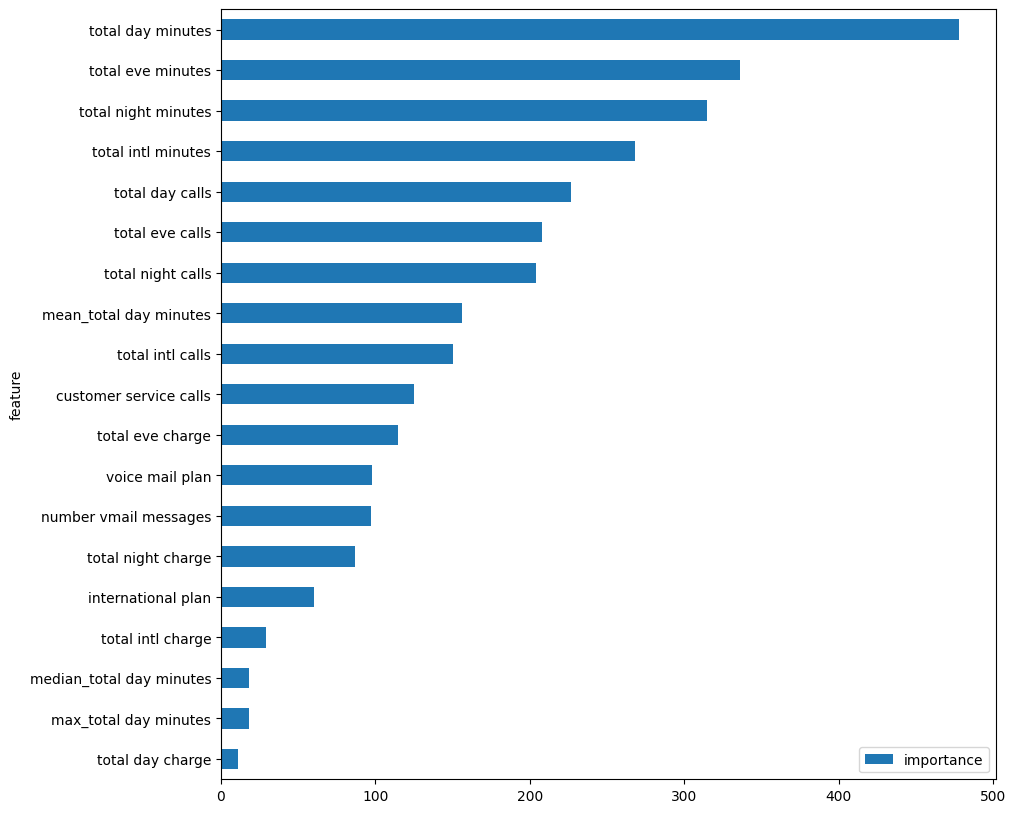

In [ ]:
features.plot(kind='barh', figsize=(10, 10))

model tidak overfit

In [ ]:
y_pred = model_etc.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       707
           1       0.84      0.83      0.84       127

    accuracy                           0.95       834
   macro avg       0.91      0.90      0.90       834
weighted avg       0.95      0.95      0.95       834



## Null Accuracy

In [ ]:
y_test.value_counts()

0    707
1    127
Name: churn, dtype: int64

In [ ]:
null_accuracy = (127/(707+127))
print(f'null accuracy : {null_accuracy}')

null accuracy : 0.15227817745803357


In [ ]:
y_pred = model_etc.predict(X_test)

In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Negatives(FN) = ', cm[0,1])

print('\nFalse Positives(FP) = ', cm[1,0])

Confusion matrix

 [[687  20]
 [ 21 106]]

True Positives(TP) =  687

True Negatives(TN) =  106

False Negatives(FN) =  20

False Positives(FP) =  21


In [ ]:
cm_matrix = pd.DataFrame(data=cm , index=["actual positive (1)" , "actual negative (0)"],
                         columns=["predict positive (1)" , "predict negative (0)"])

<Axes: >

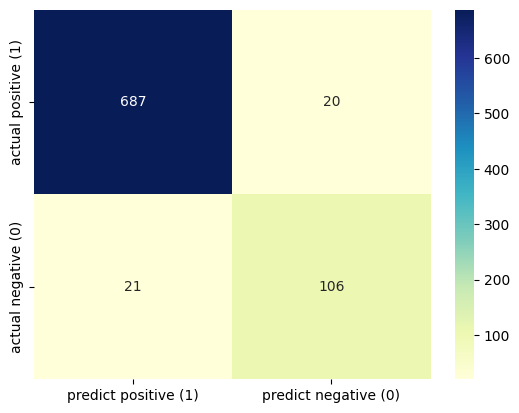

In [ ]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Experiment Scalling

StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_over_ss = sc.fit_transform(X_train_over)
X_test_ss = sc.transform(X_test)

In [ ]:
model_etc.fit(X_train_over_ss , y_train_over)

print(f'Trainig set score : {model_etc.score(X_train_over_ss , y_train_over)}')
print(f'Test set score : {model_etc.score(X_test_ss , y_test)}')

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3217
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Trainig set score : 0.9946336910872609
Test set score : 0.9508393285371702


In [ ]:
y_pred_ss = model_etc.predict(X_test_ss)

print(classification_report(y_pred_ss , y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       708
           1       0.83      0.84      0.84       126

    accuracy                           0.95       834
   macro avg       0.90      0.91      0.90       834
weighted avg       0.95      0.95      0.95       834



<Axes: >

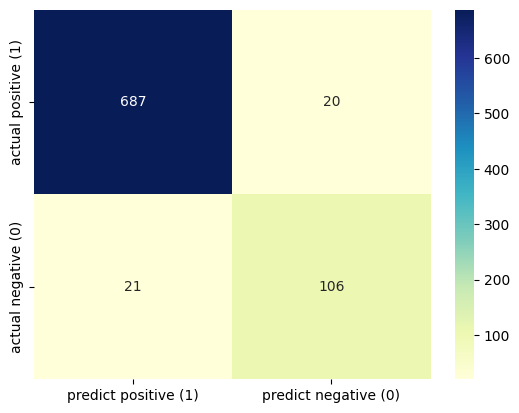

In [ ]:
cm_ss = confusion_matrix(y_test , y_pred_ss)

cm_matrix_ss = pd.DataFrame(data=cm_ss , index=["actual positive (1)" , "actual negative (0)"],
                         columns=["predict positive (1)" , "predict negative (0)"])
sns.heatmap(cm_matrix_ss, annot=True, fmt='d', cmap='YlGnBu')

MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_over_mm = mm.fit_transform(X_train_over)
X_test_mm = mm.transform(X_test)

In [ ]:
model_etc.fit(X_train_over_mm , y_train_over)

print(f'Trainig set score : {model_etc.score(X_train_over_mm , y_train_over)}')
print(f'Test set score : {model_etc.score(X_test_mm , y_test)}')

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3210
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Trainig set score : 0.9962669155389641
Test set score : 0.9496402877697842


In [ ]:
y_pred_mm = model_etc.predict(X_test_mm)

print(classification_report(y_pred_mm , y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       707
           1       0.83      0.83      0.83       127

    accuracy                           0.95       834
   macro avg       0.90      0.90      0.90       834
weighted avg       0.95      0.95      0.95       834



<Axes: >

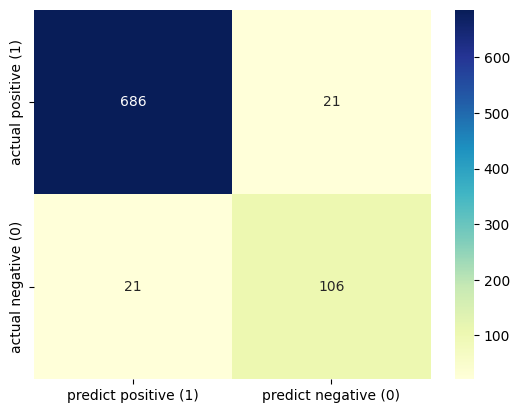

In [ ]:
cm_mm = confusion_matrix(y_test , y_pred_mm)

cm_matrix_mm = pd.DataFrame(data=cm_mm , index=["actual positive (1)" , "actual negative (0)"],
                         columns=["predict positive (1)" , "predict negative (0)"])
sns.heatmap(cm_matrix_mm, annot=True, fmt='d', cmap='YlGnBu')

RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_over_rs = rs.fit_transform(X_train_over)
X_test_rs = rs.transform(X_test)

In [ ]:
model_etc.fit(X_train_over_rs , y_train_over)

print(f'Trainig set score : {model_etc.score(X_train_over_rs , y_train_over)}')
print(f'Test set score : {model_etc.score(X_test_rs , y_test)}')

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3209
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Trainig set score : 0.9948670088660756
Test set score : 0.9484412470023981


In [ ]:
y_pred_rs = model_etc.predict(X_test_rs)

print(classification_report(y_pred_rs , y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       710
           1       0.82      0.84      0.83       124

    accuracy                           0.95       834
   macro avg       0.90      0.90      0.90       834
weighted avg       0.95      0.95      0.95       834



<Axes: >

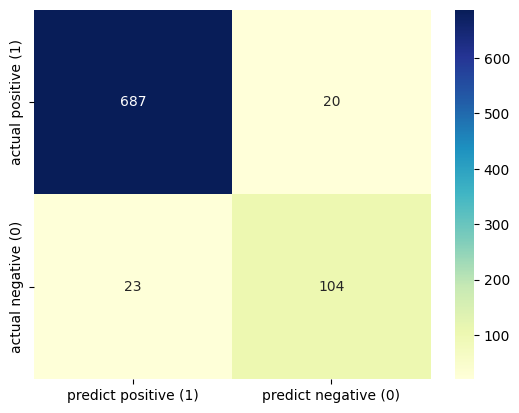

In [ ]:
cm_rs = confusion_matrix(y_test , y_pred_rs)

cm_matrix_rs = pd.DataFrame(data=cm_rs , index=["actual positive (1)" , "actual negative (0)"],
                         columns=["predict positive (1)" , "predict negative (0)"])
sns.heatmap(cm_matrix_rs, annot=True, fmt='d', cmap='YlGnBu')

SQRTTransform

In [ ]:
sqrt = SQRTTransform()
X_train_over_sqrt = sqrt.transform(X_train_over)
X_test_sqrt = sqrt.transform(X_test)

In [ ]:
model_etc.fit(X_train_over_sqrt , y_train_over)

print(f'Trainig set score : {model_etc.score(X_train_over_sqrt , y_train_over)}')
print(f'Test set score : {model_etc.score(X_test_sqrt , y_test)}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3212
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Trainig set score : 0.9946336910872609
Test set score : 0.9508393285371702


In [ ]:
y_pred_sqrt = model_etc.predict(X_test_sqrt)

print(classification_report(y_pred_sqrt , y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       708
           1       0.83      0.84      0.84       126

    accuracy                           0.95       834
   macro avg       0.90      0.91      0.90       834
weighted avg       0.95      0.95      0.95       834



<Axes: >

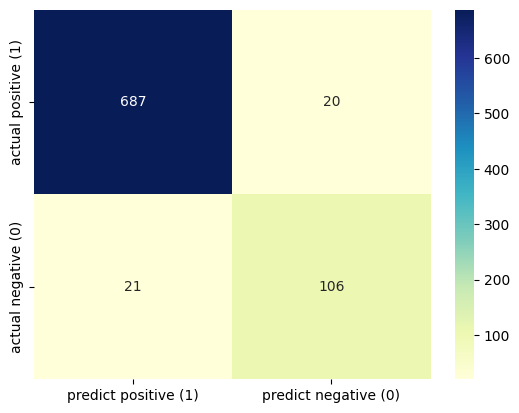

In [ ]:
cm_sqrt = confusion_matrix(y_test , y_pred_sqrt)

cm_matrix_sqrt = pd.DataFrame(data=cm_sqrt , index=["actual positive (1)" , "actual negative (0)"],
                         columns=["predict positive (1)" , "predict negative (0)"])
sns.heatmap(cm_matrix_sqrt, annot=True, fmt='d', cmap='YlGnBu')

LogTransform

In [ ]:
log = LogTransform()
X_train_over_log = log.transform(X_train_over)
X_test_log = log.transform(X_test)

In [ ]:
model_etc.fit(X_train_over_log , y_train_over)

print(f'Trainig set score : {model_etc.score(X_train_over_log , y_train_over)}')
print(f'Test set score : {model_etc.score(X_test_log , y_test)}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3212
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Trainig set score : 0.9946336910872609
Test set score : 0.9508393285371702


In [ ]:
y_pred_log = model_etc.predict(X_test_log)

print(classification_report(y_pred_log , y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       708
           1       0.83      0.84      0.84       126

    accuracy                           0.95       834
   macro avg       0.90      0.91      0.90       834
weighted avg       0.95      0.95      0.95       834



<Axes: >

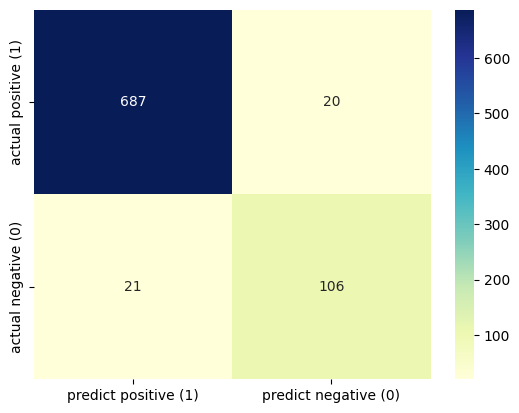

In [ ]:
cm_log = confusion_matrix(y_test , y_pred_log)

cm_matrix_log = pd.DataFrame(data=cm_log , index=["actual positive (1)" , "actual negative (0)"],
                         columns=["predict positive (1)" , "predict negative (0)"])
sns.heatmap(cm_matrix_log, annot=True, fmt='d', cmap='YlGnBu')

### kesimpulan

paling bagus dengan menggunakan RobustScaler  yang lainnya tidak ada bedanya dengan tanpa scaller

# Tekni Modelling Dengan Votting Dan Stackking

## Votting

Votting classifier dengan 3 model

In [ ]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier



In [ ]:
models_vote = [('LG',LGBMClassifier(random_state=29)),('RF',BaggingClassifier(random_state=69)),('XG',XGBClassifier(random_state=60,n_estimators=85))]
votting = VotingClassifier(estimators=models_vote,  voting='soft')
votting.fit(X_train_over, y_train_over)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3212
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


VotingClassifier(estimators=[('LG', LGBMClassifier(random_state=29)),
                             ('RF', BaggingClassifier(random_state=69)),
                             ('XG',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=85, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=60, ...))],
                 voting='soft')

In [ ]:
print('Training set score: {:.4f}'.format(votting.score(X_train_over, y_train_over)))

print('Test set score: {:.4f}'.format(votting.score(X_test, y_test)))

Training set score: 0.9998
Test set score: 0.9520


## stackcing

In [ ]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

stack0 = list()
stack0.append(('GBM', GradientBoostingClassifier()))
stack0.append(('BG', BaggingClassifier()))
stack0.append(('XG', XGBClassifier()))
stack0.append(('ETC', KNeighborsClassifier()))
stack0.append(('LOG', LogisticRegression()))


# define meta learner model
stack1 = LGBMClassifier(random_state=40)
# define the stacking ensemble
model_stack = StackingClassifier(estimators=stack0,
final_estimator=stack1, cv=5)
# fit the model on all available data
model_stack.fit(X_train_over, y_train_over)

[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


StackingClassifier(cv=5,
                   estimators=[('GBM', GradientBoostingClassifier()),
                               ('BG', BaggingClassifier()),
                               ('XG',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_pol...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('ETC', KNeighborsClassifier()),
                               ('LOG', LogisticRegression())],
                   final_estimator=LGBMClassifier(random_state=40))

In [ ]:
print('Training set score: {:.4f}'.format(model_stack.score(X_train_over, y_train_over)))

print('Test set score: {:.4f}'.format(model_stack.score(X_test, y_test)))

Training set score: 0.9993
Test set score: 0.9412


## Kesimpulan

models votting mendapatkan score yang lebih baik dari LGBMClassifier

# Hyperparameter Tuning

In [ ]:
X_train_over.head()

international plan  voice mail plan  number vmail messages  \
0                   0                0                      0   
1                   0                0                      0   
2                   0                0                      0   
3                   0                0                      0   
4                   0                0                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0             167.50               96             28.48             139.10   
1             191.60              115             32.57             205.60   
2             278.00              102             47.26             266.40   
3             214.60               78             36.48             251.70   
4             134.50               88             22.87             143.10   

   total eve calls  total eve charge  total night minutes  total night calls  \
0              104             11.82               138.40                 87   
1              108             17.48               210.20                123   
2              114             22.64               224.10                118   
3               98             21.39               240.80                 88   
4              112             12.16               223.90                 61   

   total night charge  total intl minutes  total intl calls  \
0                6.23               13.00                 1   
1                9.46                9.20                 3   
2               10.08               13.10                 4   
3               10.84               13.90                 2   
4               10.08               15.40                 1   

   total intl charge  customer service calls  mean_total day minutes  \
0               3.51                       1                  181.59   
1               2.48                       2                  177.18   
2               3.54                       4                  181.59   
3               3.75                       0                  177.18   
4               4.16                       1                  177.18   

   median_total day minutes  max_total day minutes  
0                    180.70                 350.80  
1                    176.35                 322.50  
2                    180.70                 350.80  
3                    176.35                 322.50  
4                    176.35                 322.50

In [ ]:
y_train_over.head()

0    0
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [ ]:
model = LGBMClassifier()
model.fit(X_train_over , y_train_over)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3211
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [ ]:
print('Training set score: {:.4f}'.format(model.score(X_train_over, y_train_over)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9960
Test set score: 0.9532


# GridSearch and Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV , KFold

In [ ]:
params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 500],
    'num_leaves': [20, 30, 40, 50],
    'max_depth': [5, 10, 15, -1],
    'min_child_samples': [10, 20, 30, 50],
    'subsample': [0.8, 0.9, 1.0],
    'objective': ['binary'],
    'boosting_type': ['gbdt']
}

In [ ]:
cv = KFold(n_splits=5 , random_state=69 , shuffle=True)

grid_model = GridSearchCV(estimator=model , param_grid=params ,cv=cv ,  n_jobs=-1 , scoring='balanced_accuracy' , error_score=0 )
grid_model.fit(X_train_over , y_train_over)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3211
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=KFold(n_splits=5, random_state=69, shuffle=True), error_score=0,
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [5, 10, 15, -1],
                         'min_child_samples': [10, 20, 30, 50],
                         'n_estimators': [100, 200, 300, 500],
                         'num_leaves': [20, 30, 40, 50],
                         'objective': ['binary'],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='balanced_accuracy')

In [ ]:
print(f"Best Score : {grid_model.best_score_}")
print(f"Best params : {grid_model.best_params_}")




Best Score : 0.9632702556093662
Best params : {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 10, 'n_estimators': 500, 'num_leaves': 40, 'objective': 'binary', 'subsample': 0.8}


# Final Model LGBMClassifier

In [ ]:
LGBMC_model_final = LGBMClassifier(boosting_type = 'gbdt', learning_rate = 0.1, max_depth = -1,
                             min_child_samples = 10, n_estimators = 500, num_leaves = 40, objective = 'binary',
                             subsample = 0.8)

LGBMC_model_final.fit(X_train_over , y_train_over)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2143, number of negative: 2143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3213
[LightGBM] [Info] Number of data points in the train set: 4286, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

LGBMClassifier(min_child_samples=10, n_estimators=500, num_leaves=40,
               objective='binary', subsample=0.8)

In [ ]:
print(f'Training set score : {LGBMC_model_final.score(X_train_over , y_train_over)}')
print(f'Training set score : {LGBMC_model_final.score(X_test , y_test)}')

Training set score : 1.0
Training set score : 0.9496402877697842


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_final = LGBMC_model_final.predict(X_test)

cm = confusion_matrix(y_test , y_pred_final)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FN) = ', cm[0,1])

print('\nFalse Negatives(FP) = ', cm[1,0])

Confusion matrix

 [[689  18]
 [ 24 103]]

True Positives(TP) =  689

True Negatives(TN) =  103

False Positives(FN) =  18

False Negatives(FP) =  24


<Axes: >

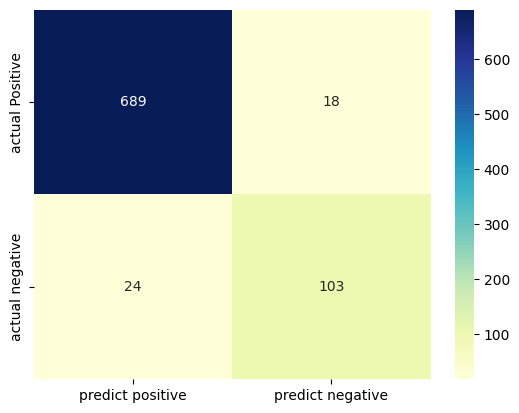

In [ ]:
cm_matrix = pd.DataFrame(index=['actual Positive' , 'actual negative'] , columns = ['predict positive' , 'predict negative'] , data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xg = XGBClassifier()
model_xg.fit(X_train_over , y_train_over)
print(f'training set score : {model_xg.score(X_train_over , y_train_over)}')
print(f'training set score : {model_xg.score(X_test , y_test)}')

training set score : 1.0
training set score : 0.9484412470023981


In [ ]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'gamma': [0, 0.1, 0.2]
}

In [ ]:
cv = KFold(n_splits=5 , random_state=69 , shuffle=True)

grid_model = GridSearchCV(estimator=model_xg , param_grid=params ,cv=cv ,  n_jobs=-1 , scoring='balanced_accuracy' , error_score=0 )
grid_model.fit(X_train_over , y_train_over)

GridSearchCV(cv=KFold(n_splits=5, random_state=69, shuffle=True), error_score=0,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 0.9],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.7, 0.9]},
             scoring='balanced_accuracy')

In [ ]:
print(f'best score : {grid_model.best_score_} , params : {grid_model.best_params_}')

best score : 0.9570796194586982 , params : {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}


# Final Model XGBOOST

In [ ]:
XG_model_final = XGBClassifier(colsample_bytree= 0.7, gamma= 0, learning_rate = 0.2, max_depth= 7, n_estimators = 200, subsample= 0.7)
XG_model_final.fit(X_train_over , y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print(f'Training set score : {LGBMC_model_final.score(X_train_over , y_train_over)}')
print(f'Training set score : {LGBMC_model_final.score(X_test , y_test)}')

Training set score : 1.0
Training set score : 0.9496402877697842


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_final = XG_model_final.predict(X_test)

cm = confusion_matrix(y_test , y_pred_final)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FN) = ', cm[0,1])

print('\nFalse Negatives(FP) = ', cm[1,0])

Confusion matrix

 [[683  24]
 [ 24 103]]

True Positives(TP) =  683

True Negatives(TN) =  103

False Positives(FN) =  24

False Negatives(FP) =  24


<Axes: >

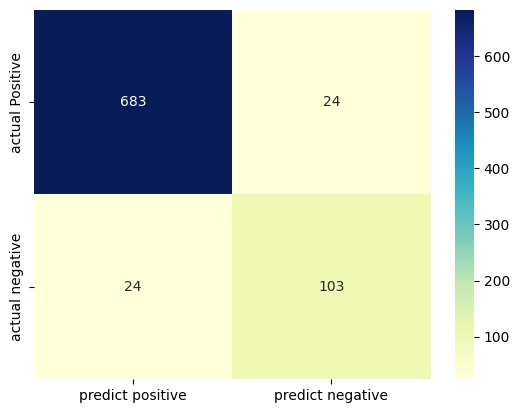

In [ ]:
cm_matrix = pd.DataFrame(index=['actual Positive' , 'actual negative'] , columns = ['predict positive' , 'predict negative'] , data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
import pickle

with open('LGBMclassifier_final.pkl', 'wb') as f:
    pickle.dump(LGBMC_model_final, f)

In [ ]:
dataset.to_csv('final_model_dataset.csv')

# Summary

1. model LGBMClassifier lebih bekerja lebih baik daripada XGBoost
2. jadi model LGBMClassifier yang akan digunakan

# Final

In [7]:
import pickle
with open('LGBMclassifier_final.pkl', 'rb') as f:
    final_model = pickle.load(f)

In [21]:
pred_not_churn = final_model.predict_proba(X_test)[:,0]
y_pred = final_model.predict(X_test)

In [22]:
all_data =data.iloc[X_test.index]
all_data["probability not churn : (0)"] = pred_not_churn
all_data["prediction"] = y_pred

In [24]:
all_data["churn"]=all_data["churn"].astype(int)

In [25]:
all_data

area code  international plan  voice mail plan  number vmail messages  \
2909        415                   0                0                      0   
2438        415                   0                0                      0   
2150        415                   0                0                      0   
2882        408                   1                0                      0   
1161        510                   1                0                      0   
...         ...                 ...              ...                    ...   
295         510                   0                0                      0   
282         415                   0                1                     37   
3073        408                   0                1                     38   
2402        415                   0                1                     33   
2460        415                   0                0                      0   

      total day minutes  total day calls  total day charge  total eve minutes  \
2909              174.1              102             29.60               99.1   
2438              197.2              113             33.52              242.3   
2150              226.0              127             38.42              304.6   
2882              124.5              134             21.17              141.2   
1161              170.7               55             29.02              179.1   
...                 ...              ...               ...                ...   
295               204.2              115             34.71              179.9   
282               211.7              115             35.99              159.9   
3073              193.0              106             32.81              153.6   
2402              143.0              101             24.31              212.2   
2460              109.2               96             18.56              153.1   

      total eve calls  total eve charge  total night minutes  \
2909              118              8.42                211.6   
2438              116             20.60                192.0   
2150               83             25.89                181.2   
2882               78             12.00                268.2   
1161              108             15.22                281.9   
...               ...               ...                  ...   
295               152             15.29                216.8   
282                84             13.59                144.1   
3073              106             13.06                260.4   
2402              102             18.04                104.9   
2460               80             13.01                240.0   

      total night calls  total night charge  total intl minutes  \
2909                126                9.52                 7.7   
2438                 76                8.64                11.0   
2150                132                8.15                12.6   
2882                113               12.07                11.4   
1161                 89               12.69                 8.2   
...                 ...                 ...                 ...   
295                 109                9.76                 9.5   
282                  80                6.48                12.2   
3073                 87               11.72                 7.4   
2402                120                4.72                15.3   
2460                102               10.80                 9.8   

      total intl calls  total intl charge  customer service calls  churn  \
2909                 2               2.08                       2      0   
2438                 5               2.97                       2      0   
2150                 4               3.40                       2      1   
2882                 2               3.08                       2      1   
1161                 9               2.21                       3      0   
...                ...                ...             

In [26]:
all_data[all_data["prediction"] == 1].describe()

area code  international plan  voice mail plan  number vmail messages  \
count  121.000000          121.000000       121.000000             121.000000   
mean   440.685950            0.314050         0.115702               3.545455   
std     44.493639            0.466066         0.321198               9.998333   
min    408.000000            0.000000         0.000000               0.000000   
25%    408.000000            0.000000         0.000000               0.000000   
50%    415.000000            0.000000         0.000000               0.000000   
75%    510.000000            1.000000         0.000000               0.000000   
max    510.000000            1.000000         1.000000              41.000000   

       total day minutes  total day calls  total day charge  \
count         121.000000       121.000000        121.000000   
mean          205.480165       102.099174         34.932562   
std            70.206040        22.316065         11.934828   
min             0.000000         0.000000          0.000000   
25%           147.100000        90.000000         25.010000   
50%           222.100000       104.000000         37.760000   
75%           261.800000       116.000000         44.510000   
max           345.300000       151.000000         58.700000   

       total eve minutes  total eve calls  total eve charge  \
count         121.000000       121.000000        121.000000   
mean          210.638843       101.421488         17.904711   
std            52.692933        18.913730          4.478876   
min            93.700000        53.000000          7.960000   
25%           175.900000        90.000000         14.950000   
50%           211.300000       102.000000         17.960000   
75%           247.600000       116.000000         21.050000   
max           363.700000       141.000000         30.910000   

       total night minutes  total night calls  total night charge  \
count           121.000000         121.000000          121.000000   
mean            201.925620          99.950413            9.087025   
std              46.972747          19.489677            2.113817   
min              94.400000          56.000000            4.250000   
25%             167.800000          86.000000            7.550000   
50%             204.300000          99.000000            9.190000   
75%             231.300000         114.000000           10.410000   
max             321.200000         158.000000           14.450000   

       total intl minutes  total intl calls  total intl charge  \
count          121.000000        121.000000          121.00000   
mean            11.025620          4.041322            2.97719   
std              2.558532          2.487960            0.69084   
min              5.000000          1.000000            1.35000   
25%              9.300000          2.000000            2.51000   
50%             10.700000          3.000000            2.89000   
75%             12.900000          5.000000            3.48000   
max             17.000000         12.000000            4.59000   

       customer service calls       churn  probability not churn : (0)  \
count              121.000000  121.000000                 1.210000e+02   
mean                 2.479339    0.851240                 4.311368e-02   
std                  2.017008    0.357332                 1.031888e-01   
min                  0.000000    0.000000                 2.716705e-10   
25%                  1.000000    1.000000                 6.719356e-06   
50%                  2.000000    1.000000                 3.894124e-04   
75%                  4.000000    1.000000                 1.756133e-02   
max                  8.000000    1.000000                 4.561300e-01   

       prediction  
count       121.0  
mean          1.0  
std           0.0  
min           1.0  
25%           1.0  
50%           1.0  
75%           1.0  
max           1.0

In [27]:
all_data[all_data["prediction"] == 0].describe()

area code  international plan  voice mail plan  number vmail messages  \
count  713.000000          713.000000        713.00000             713.000000   
mean   436.584853            0.056101          0.30014               8.539972   
std     42.159394            0.230278          0.45864              13.684605   
min    408.000000            0.000000          0.00000               0.000000   
25%    408.000000            0.000000          0.00000               0.000000   
50%    415.000000            0.000000          0.00000               0.000000   
75%    415.000000            0.000000          1.00000              21.000000   
max    510.000000            1.000000          1.00000              50.000000   

       total day minutes  total day calls  total day charge  \
count         713.000000       713.000000        713.000000   
mean          175.993689        99.932679         29.919411   
std            48.801939        20.320147          8.296266   
min             0.000000         0.000000          0.000000   
25%           143.700000        87.000000         24.430000   
50%           177.700000       101.000000         30.210000   
75%           211.600000       113.000000         35.970000   
max           315.600000       152.000000         53.650000   

       total eve minutes  total eve calls  total eve charge  \
count         713.000000       713.000000        713.000000   
mean          198.961992       100.210379         16.912272   
std            50.222695        19.686534          4.268954   
min             0.000000         0.000000          0.000000   
25%           163.100000        87.000000         13.860000   
50%           200.900000       101.000000         17.080000   
75%           237.000000       113.000000         20.150000   
max           361.800000       170.000000         30.750000   

       total night minutes  total night calls  total night charge  \
count           713.000000         713.000000          713.000000   
mean            202.710940          99.607293            9.122160   
std              51.123728          19.055804            2.300688   
min              54.000000          33.000000            2.430000   
25%             169.700000          87.000000            7.640000   
50%             206.100000         101.000000            9.270000   
75%             237.900000         113.000000           10.710000   
max             364.300000         154.000000           16.390000   

       total intl minutes  total intl calls  total intl charge  \
count          713.000000        713.000000         713.000000   
mean             9.961711          4.582048           2.690168   
std              2.778096          2.452770           0.750055   
min              0.000000          0.000000           0.000000   
25%              8.100000          3.000000           2.190000   
50%             10.000000          4.000000           2.700000   
75%             11.900000          6.000000           3.210000   
max             18.200000         17.000000           4.910000   

       customer service calls       churn  probability not churn : (0)  \
count              713.000000  713.000000                   713.000000   
mean                 1.465638    0.033661                     0.992641   
std                  1.135119    0.180481                     0.038127   
min                  0.000000    0.000000                     0.548301   
25%                  1.000000    0.000000                     0.999721   
50%                  1.000000    0.000000                     0.999989   
75%                  2.000000    0.000000                     0.999999   
max                  6.000000    1.000000                     1.000000   

       prediction  
count       713.0  
mean          0.0  
std           0.0  
min           0.0  
25%           0.0  
50%           0.0  
75%           0.0  
max           0.0